This notebook focuses on running robustness checks on the machine learning models: Ridge Regression, Lasso Regression, Random Forest, and XGBoost. The link to the dataset on which robustness checks have been done can be found here: https://drive.google.com/file/d/18m307zKphd6I6sPfMixsVHRouhPDgO7c/view?usp=sharing

In [ ]:
# Importing all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from sklearn.preprocessing import StandardScaler

# Loading the preprocessed df1 dataset into the data frame d1
df1=pd.read_csv('/content/regional_ml_nowcast_features_lag1to6.csv')

In [ ]:
#Displaying the first five rows
display(df1.head())

,Date,RegionName,HPI_TRANS,AveragePrice_TRANS_lag1,AveragePrice_TRANS_lag2,AveragePrice_TRANS_lag3,AveragePrice_TRANS_lag4,AveragePrice_TRANS_lag5,AveragePrice_TRANS_lag6,SalesVolume_TRANS_lag1,...,GDELT_average_news_tone_normalized_TRANS_lag3,GDELT_average_news_tone_normalized_TRANS_lag4,GDELT_average_news_tone_normalized_TRANS_lag5,GDELT_average_news_tone_normalized_TRANS_lag6,HPI_TRANS_lag1,HPI_TRANS_lag2,HPI_TRANS_lag3,HPI_TRANS_lag4,HPI_TRANS_lag5,HPI_TRANS_lag6
0,8/1/2006,Aberdeenshire,0.018238,0.002524,0.018084,0.060853,0.067165,0.018117,-0.016325,-0.183923,...,0.581194,0.520766,0.510918,0.423864,0.003072,0.018634,0.059743,0.067093,0.017954,-0.016173
1,9/1/2006,Aberdeenshire,0.042748,0.019497,0.002524,0.018084,0.060853,0.067165,0.018117,0.121196,...,0.660133,0.581194,0.520766,0.510918,0.018238,0.003072,0.018634,0.059743,0.067093,0.017954
2,10/1/2006,Aberdeenshire,0.020001,0.042729,0.019497,0.002524,0.018084,0.060853,0.067165,-0.031144,...,0.238278,0.660133,0.581194,0.520766,0.042748,0.018238,0.003072,0.018634,0.059743,0.067093
3,11/1/2006,Aberdeenshire,-0.002833,0.019418,0.042729,0.019497,0.002524,0.018084,0.060853,0.005259,...,0.036533,0.238278,0.660133,0.581194,0.020001,0.042748,0.018238,0.003072,0.018634,0.059743
4,12/1/2006,Aberdeenshire,-0.005690,-0.003049,0.019418,0.042729,0.019497,0.002524,0.018084,-0.037404,...,0.470893,0.036533,0.238278,0.660133,-0.002833,0.020001,0.042748,0.018238,0.003072,0.018634


In [ ]:
# Inspecting structure
print("Shape:", df1.shape)
print("\nColumns:\n", df1.columns.tolist())
print("\nData types:\n", df1.dtypes)


Shape: (91935, 105)

Columns:
 ['Date', 'RegionName', 'HPI_TRANS', 'AveragePrice_TRANS_lag1', 'AveragePrice_TRANS_lag2', 'AveragePrice_TRANS_lag3', 'AveragePrice_TRANS_lag4', 'AveragePrice_TRANS_lag5', 'AveragePrice_TRANS_lag6', 'SalesVolume_TRANS_lag1', 'SalesVolume_TRANS_lag2', 'SalesVolume_TRANS_lag3', 'SalesVolume_TRANS_lag4', 'SalesVolume_TRANS_lag5', 'SalesVolume_TRANS_lag6', 'AW_Regular_Earnings_TRANS_lag1', 'AW_Regular_Earnings_TRANS_lag2', 'AW_Regular_Earnings_TRANS_lag3', 'AW_Regular_Earnings_TRANS_lag4', 'AW_Regular_Earnings_TRANS_lag5', 'AW_Regular_Earnings_TRANS_lag6', 'UnemploymentRate_TRANS_lag1', 'UnemploymentRate_TRANS_lag2', 'UnemploymentRate_TRANS_lag3', 'UnemploymentRate_TRANS_lag4', 'UnemploymentRate_TRANS_lag5', 'UnemploymentRate_TRANS_lag6', 'CPI_TRANS_lag1', 'CPI_TRANS_lag2', 'CPI_TRANS_lag3', 'CPI_TRANS_lag4', 'CPI_TRANS_lag5', 'CPI_TRANS_lag6', 'MortgageApprovals_TRANS_lag1', 'MortgageApprovals_TRANS_lag2', 'MortgageApprovals_TRANS_lag3', 'MortgageApprovals_TR

In [ ]:
#Finding the number of missing values
print("\nMissing values per column:\n", df1.isnull().sum())


Missing values per column:
 Date                       0
RegionName                 0
HPI_TRANS                  0
AveragePrice_TRANS_lag1    0
AveragePrice_TRANS_lag2    0
                          ..
HPI_TRANS_lag2             0
HPI_TRANS_lag3             0
HPI_TRANS_lag4             0
HPI_TRANS_lag5             0
HPI_TRANS_lag6             0
Length: 105, dtype: int64


In [ ]:
# Traditional predictors
traditional_vars = [
    'AW_Regular_Earnings_TRANS', 'UnemploymentRate_TRANS',
    'CPI_TRANS', 'MortgageApprovals_TRANS', 'MortgageRate_TRANS',
    'BankRate_TRANS', 'ConsumerConfidence_TRANS', 'ConstructionCost_Index_TRANS'
]

# High-frequency predictors
hf_vars = [
    'GT_demand_TRANS', 'GT_economicpolicy_TRANS', 'GT_marketawareness_TRANS',
    'GT_mortgage_financing_TRANS', 'GT_renting_affordability_TRANS',
    'GDELT_average_news_tone_normalized_TRANS'
]

# Combined predictors
combined_vars = traditional_vars + hf_vars

# Include lags (1–6)
def make_lagged_features(vars_list):
    return [f"{v}_lag{i}" for v in vars_list for i in range(1, 7)]

FEATURE_SETS = {
    "traditional": make_lagged_features(traditional_vars),
    "highfreq": make_lagged_features(hf_vars),
    "combined": make_lagged_features(combined_vars)
}

Hyperparameter tuning

Random Forest

In [ ]:
# Basic imports and configuration
import json
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, mean_squared_error

TARGET       = "HPI_TRANS"
PRE_END      = pd.Timestamp("2017-12-31")
N_SPLITS     = 5
N_ITER       = 40
RANDOM_SEED  = 42

In [ ]:
#Loading the data
df = df1.copy()
df["Date"] = pd.to_datetime(df["Date"])
df = df.sort_values(["Date", "RegionName"]).reset_index(drop=True)

print("Using 6-lag dataset for RF tuning")
print("Range:", df["Date"].min().date(), "to", df["Date"].max().date())

FEATURE_SETS = {
    "traditional": make_lagged_features(traditional_vars),
    "highfreq":    make_lagged_features(hf_vars),
    "combined":    make_lagged_features(combined_vars)
}
# Rolling window framework
def make_expanding_cv_indices(pre_df, date_col="Date", n_splits=5):
    months = sorted(pre_df[date_col].unique())
    chunks = np.array_split(months, n_splits)

    folds = []
    for i in range(1, len(chunks)):
        train_months = np.concatenate(chunks[:i])
        val_months   = np.array(chunks[i])

        tr_idx = pre_df.index[pre_df[date_col].isin(train_months)]
        va_idx = pre_df.index[pre_df[date_col].isin(val_months)]

        if len(tr_idx) and len(va_idx):
            folds.append((tr_idx.to_numpy(), va_idx.to_numpy()))
    return folds

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

rmse_scorer = make_scorer(rmse, greater_is_better=False)

Using 6-lag dataset for RF tuning
Range: 2006-08-01 to 2025-06-01


In [ ]:
# RF Search grid

param_dist = {
    "n_estimators":     [300, 500, 700, 900],
    "max_depth":        [None, 8, 10, 12],
    "min_samples_leaf": [1, 2, 3],
    "min_samples_split":[2, 4, 6],
    "max_features":     ["sqrt", 0.5, 0.8]
}

# Hyperparameter tuning loop
best_by_spec = {}

for spec_name, FEATURES in FEATURE_SETS.items():

    # Slice pre-2018 tuning data
    cols = ["Date", "RegionName", TARGET] + FEATURES
    pre_df = df.loc[df["Date"] <= PRE_END, cols].dropna().reset_index(drop=True)

    n_months = pre_df["Date"].nunique()
    if n_months < N_SPLITS:
        raise ValueError(f"Not enough months pre-2018 for {spec_name} tuning.")

    cv_splits = make_expanding_cv_indices(pre_df, "Date", n_splits=N_SPLITS)

    X_pre = pre_df[FEATURES]
    y_pre = pre_df[TARGET]

    print(f"\n=== RF Tuning (6-lags) — {spec_name.upper()} ===")
    print(f"Rows: {len(pre_df)}, Months: {n_months}, Features: {len(FEATURES)}")

    rf = RandomForestRegressor(random_state=RANDOM_SEED, n_jobs=-1)

    search = RandomizedSearchCV(
        estimator=rf,
        param_distributions=param_dist,
        n_iter=N_ITER,
        scoring=rmse_scorer,
        cv=cv_splits,
        refit=True,
        n_jobs=-1,
        verbose=1,
        random_state=RANDOM_SEED
    )

    search.fit(X_pre, y_pre)

    best_params = search.best_params_
    best_rmse   = -search.best_score_

    print("Best params:", best_params)
    print(f"Best CV RMSE: {best_rmse:.5f}")

    best_by_spec[spec_name] = {
        "best_params": best_params,
        "cv_rmse": float(best_rmse)
    }

    # Save JSON
    with open(f"RF_TunedParams_{spec_name}_lag1to6.json", "w") as f:
        json.dump(best_by_spec[spec_name], f, indent=2)
# Summary
        print("\n=== Summary of RF tuned parameters (6-lag dataset) ===")
for spec, info in best_by_spec.items():
    print(spec, "→", info)


=== RF Tuning (6-lags) — TRADITIONAL ===
Rows: 55485, Months: 137, Features: 48
Fitting 4 folds for each of 40 candidates, totalling 160 fits
Best params: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 12}
Best CV RMSE: 0.01626

=== Summary of RF tuned parameters (6-lag dataset) ===

=== RF Tuning (6-lags) — HIGHFREQ ===
Rows: 55485, Months: 137, Features: 36
Fitting 4 folds for each of 40 candidates, totalling 160 fits
Best params: {'n_estimators': 300, 'min_samples_split': 6, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_depth': 8}
Best CV RMSE: 0.01644

=== Summary of RF tuned parameters (6-lag dataset) ===

=== RF Tuning (6-lags) — COMBINED ===
Rows: 55485, Months: 137, Features: 84
Fitting 4 folds for each of 40 candidates, totalling 160 fits
Best params: {'n_estimators': 500, 'min_samples_split': 6, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 10}
Best CV RMSE: 0.01610

=== Summary of RF tuned parame

In [ ]:
# Running Random Forest using the tuned hyperparameters
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Basic Configuration-

TARGET        = "HPI_TRANS"
WINDOW_MONTHS = 60
START_TEST    = pd.Timestamp("2018-01-01")

spec_labels = {
    "traditional": "Traditional",
    "highfreq":    "High-Frequency",
    "combined":    "Combined"
}

# Loading the dataset

df = df1.copy()
df["Date"] = pd.to_datetime(df["Date"])
df = df.sort_values(["Date", "RegionName"]).reset_index(drop=True)

print("Using 6-lag feature dataset")
print("Sample covers:", df["Date"].min().date(), "→", df["Date"].max().date())
print("Out-of-sample period begins:", START_TEST.date())
print("Rolling window length:", WINDOW_MONTHS, "months")

# Loading the tuned hyperparameters for each specification

rf_params_by_spec = {}

for spec_name in FEATURE_SETS.keys():
    fname = f"RF_TunedParams_{spec_name}_lag1to6.json"
    with open(fname, "r") as f:
        tuned = json.load(f)

    params = tuned["best_params"]
    params["random_state"] = 42
    params["n_jobs"] = -1
    rf_params_by_spec[spec_name] = params

print("\nLoaded tuned RF hyperparameters:")
for k, v in rf_params_by_spec.items():
    print(f"  {k}: {v}")


# Defining evaluation metrics
def eval_metrics(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae  = mean_absolute_error(y_true, y_pred)
    return rmse, mae

# Defining rolling framework
def rolling_splits(all_dates, start_test, window_months):
    """
    For each test month >= start_test, train on the previous `window_months`.
    """
    test_dates = [d for d in all_dates if d >= start_test]

    for test_date in test_dates:
        train_end = test_date - pd.offsets.MonthBegin(1)
        train_start = max(
            all_dates[0],
            train_end - pd.DateOffset(months=window_months) + pd.offsets.MonthBegin(1)
        )
        yield (train_start, train_end), test_date

# Running the rolling models

results = []
dates = sorted(df["Date"].unique())

for spec_name, FEATURES in FEATURE_SETS.items():
    label = spec_labels[spec_name]

    # keep only features that are actually in the dataframe (just in case)
    FEATURES = [c for c in FEATURES if c in df.columns]
    if not FEATURES:
        raise ValueError(f"No matching feature columns found in df for spec '{label}'.")

    print("\n")
    print(f"Random Forest (tuned, 6 lags) — {label}")
    print(f"Using {len(FEATURES)} predictors")

    rf = RandomForestRegressor(**rf_params_by_spec[spec_name])

    uk_true, uk_pred = [], []
    step = 0

    for (train_start, train_end), test_date in rolling_splits(
        dates, START_TEST, window_months=WINDOW_MONTHS
    ):
        tr = (df["Date"] >= train_start) & (df["Date"] <= train_end)
        te = (df["Date"] == test_date)

        train_df = df.loc[tr]
        test_df  = df.loc[te]

        # require at least 24 distinct months for training
        if train_df["Date"].nunique() < 24 or test_df.empty:
            continue

        X_tr, y_tr = train_df[FEATURES], train_df[TARGET]
        X_te, y_te = test_df[FEATURES], test_df[TARGET]

        rf.fit(X_tr, y_tr)
        preds = rf.predict(X_te)

        # aggregate region-level predictions to give UK mean
        uk_pred.append(float(np.mean(preds)))
        uk_true.append(float(np.mean(y_te.values)))

        step += 1
        if step % 6 == 0:
            print(f"{label} | evaluated through {test_date.date()} (steps={step})")

    rmse, mae = eval_metrics(uk_true, uk_pred)
    print(f"\n{label} results:")
    print(f"  RMSE = {rmse:.5f}")
    print(f"  MAE  = {mae:.5f}")


    # Save nowcast series
    out = pd.DataFrame({
        "Date": sorted(set(df.loc[df["Date"] >= START_TEST, "Date"]))[:len(uk_true)],
        "UK_HPI_true_mean_of_regions": uk_true,
        f"UK_HPI_pred_RF_{spec_name}_TUNED_lag1to6": uk_pred
    }).set_index("Date")

    fname = f"UK_nowcast_RF_{spec_name}_TUNED_lag1to6_rolling{WINDOW_MONTHS}m.csv"
    out.to_csv(fname)
    print(f"Saved nowcast file → {fname}")

    results.append({
        "Model": "RF (tuned, 6 lags)",
        "Spec": label,
        "Window": f"{WINDOW_MONTHS}m",
        "RMSE": rmse,
        "MAE": mae,
        "n_features": len(FEATURES)
    })

# Summary table

summary_df = pd.DataFrame(results).sort_values("RMSE").reset_index(drop=True)
print("\nSummary:")
print(summary_df)

summary_name = f"RF_TUNED_Summary_Lag1to6_rolling{WINDOW_MONTHS}m.csv"
summary_df.to_csv(summary_name, index=False)
print(f"\nSaved summary file: {summary_name}")

Using 6-lag feature dataset
Sample covers: 2006-08-01 → 2025-06-01
Out-of-sample period begins: 2018-01-01
Rolling window length: 60 months

Loaded tuned RF hyperparameters:
  traditional: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 12, 'random_state': 42, 'n_jobs': -1}
  highfreq: {'n_estimators': 300, 'min_samples_split': 6, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_depth': 8, 'random_state': 42, 'n_jobs': -1}
  combined: {'n_estimators': 500, 'min_samples_split': 6, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 10, 'random_state': 42, 'n_jobs': -1}


Random Forest (tuned, 6 lags) — Traditional
Using 48 predictors
Traditional | evaluated through 2018-06-01 (steps=6)
Traditional | evaluated through 2018-12-01 (steps=12)
Traditional | evaluated through 2019-06-01 (steps=18)
Traditional | evaluated through 2019-12-01 (steps=24)
Traditional | evaluated through 2020-06-01 (steps=30)
Traditional | evaluat

Hyperparameter Tuning- XGBoost

In [ ]:
import numpy as np
import pandas as pd
import json

from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, make_scorer

# Basic Configuration

TARGET       = "HPI_TRANS"
PRE_END      = pd.Timestamp("2017-12-31")
N_SPLITS     = 5
N_ITER       = 36
RANDOM_SEED  = 42


# Loading data

df = df1.copy()
df["Date"] = pd.to_datetime(df["Date"])
df = df.sort_values(["Date", "RegionName"]).reset_index(drop=True)

print("Tuning XGBoost on 6-lag dataset")
print("Sample:", df["Date"].min().date(), "→", df["Date"].max().date())
print("Pre-2018 cutoff:", PRE_END.date())


def make_expanding_cv_indices(pre_df, date_col="Date", n_splits=5):
    """
    Expanding-window CV over months:
      Fold 1: train on chunk 1, validate on chunk 2
      Fold 2: train on chunks 1–2, validate on chunk 3, etc.
    """
    months = sorted(pre_df[date_col].unique())
    chunks = np.array_split(months, n_splits)

    folds = []
    for i in range(1, len(chunks)):
        train_months = np.concatenate(chunks[:i])
        val_months   = np.array(chunks[i])

        tr_idx = pre_df.index[pre_df[date_col].isin(train_months)]
        va_idx = pre_df.index[pre_df[date_col].isin(val_months)]

        if len(tr_idx) and len(va_idx):
            folds.append((tr_idx.to_numpy(), va_idx.to_numpy()))

    return folds

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

rmse_scorer = make_scorer(rmse, greater_is_better=False)

# XGBoost Search grid

xgb_param_dist = {
    "n_estimators":      [400, 600, 800, 1000],
    "learning_rate":     [0.01, 0.03, 0.05, 0.1],
    "max_depth":         [3, 4, 5, 6],
    "subsample":         [0.7, 0.85, 0.9],
    "colsample_bytree":  [0.7, 0.85, 0.9],
    "reg_lambda":        [0.8, 1.0, 1.2, 1.6],
    "reg_alpha":         [0.0, 0.2, 0.4, 0.6],
    "min_child_weight":  [1, 2, 3, 5]
}

# Hyperparameter Tuning loop

best_xgb_by_spec = {}

for spec_name, FEATURES in FEATURE_SETS.items():
    # keep only features that actually exist in df
    FEATURES = [c for c in FEATURES if c in df.columns]
    if not FEATURES:
        raise ValueError(f"No matching feature columns in df for spec '{spec_name}'.")

    # Pre-2018 sample for tuning
    cols   = ["Date", "RegionName", TARGET] + FEATURES
    pre_df = df.loc[df["Date"] <= PRE_END, cols].dropna().reset_index(drop=True)

    n_months = pre_df["Date"].nunique()
    if n_months < max(3, N_SPLITS):
        raise ValueError(
            f"Not enough months pre-2018 to make {N_SPLITS} folds for '{spec_name}' "
            f"(have {n_months})."
        )

    cv_splits = make_expanding_cv_indices(pre_df, "Date", n_splits=N_SPLITS)

    X_pre = pre_df[FEATURES]
    y_pre = pre_df[TARGET]

    print(f"\n=== XGBoost hyperparameter tuning (lag 1–6) — {spec_name.upper()} ===")
    print(f"Rows: {len(pre_df)}, Months: {n_months}, Features: {len(FEATURES)}")

    xgb = XGBRegressor(
        objective="reg:squarederror",
        random_state=RANDOM_SEED,
        n_jobs=-1,
        tree_method="hist",
        eval_metric="rmse"
    )

    search = RandomizedSearchCV(
        estimator=xgb,
        param_distributions=xgb_param_dist,
        n_iter=N_ITER,
        scoring=rmse_scorer,
        cv=cv_splits,
        refit=True,
        n_jobs=-1,
        verbose=1,
        random_state=RANDOM_SEED
    )

    search.fit(X_pre, y_pre)

    best_params = search.best_params_
    best_rmse   = -search.best_score_

    print("Best params:", best_params)
    print(f"Best CV RMSE: {best_rmse:.5f}")

    best_xgb_by_spec[spec_name] = {
        "best_params": best_params,
        "cv_rmse": float(best_rmse)
    }

    out_path = f"XGB_TunedParams_{spec_name}_lag1to6.json"
    with open(out_path, "w") as f:
        json.dump(best_xgb_by_spec[spec_name], f, indent=2)
    print(f"Saved tuned XGBoost parameters for {spec_name}: {out_path}")

# Summary

print("\nSummary of tuned XGBoost parameters (lag 1–6 dataset):")
for spec_name, info in best_xgb_by_spec.items():
    print(spec_name, ":", info)

Tuning XGBoost on 6-lag dataset
Sample: 2006-08-01 → 2025-06-01
Pre-2018 cutoff: 2017-12-31

=== XGBoost hyperparameter tuning (lag 1–6) — TRADITIONAL ===
Rows: 55485, Months: 137, Features: 48
Fitting 4 folds for each of 36 candidates, totalling 144 fits
Best params: {'subsample': 0.7, 'reg_lambda': 0.8, 'reg_alpha': 0.2, 'n_estimators': 600, 'min_child_weight': 2, 'max_depth': 3, 'learning_rate': 0.05, 'colsample_bytree': 0.7}
Best CV RMSE: 0.01644
Saved tuned XGBoost parameters for traditional: XGB_TunedParams_traditional_lag1to6.json

=== XGBoost hyperparameter tuning (lag 1–6) — HIGHFREQ ===
Rows: 55485, Months: 137, Features: 36
Fitting 4 folds for each of 36 candidates, totalling 144 fits
Best params: {'subsample': 0.7, 'reg_lambda': 1.6, 'reg_alpha': 0.6, 'n_estimators': 1000, 'min_child_weight': 1, 'max_depth': 3, 'learning_rate': 0.01, 'colsample_bytree': 0.7}
Best CV RMSE: 0.01688
Saved tuned XGBoost parameters for highfreq: XGB_TunedParams_highfreq_lag1to6.json

=== XGBoost

In [ ]:
# Running the XGBoost model using the tuned hyperparameters

TARGET        = "HPI_TRANS"
WINDOW_MONTHS = 60
START_TEST    = pd.Timestamp("2018-01-01")


spec_labels = {
    "traditional": "Traditional",
    "highfreq": "High-Frequency",
    "combined": "Combined"
}

# Loading the data

df = df1.copy()
df["Date"] = pd.to_datetime(df["Date"])
df = df.sort_values(["Date", "RegionName"]).reset_index(drop=True)

print("Using 6-lag dataset for tuned XGBoost.")
print("Sample:", df["Date"].min().date(), "to", df["Date"].max().date())
print("Rolling window:", WINDOW_MONTHS, "months | OOS start:", START_TEST.date())

# Expanding window framework
def rolling_expanding_panel_splits(all_dates, start_test, window_months=60):
    """
    For each test month >= start_test, train on the preceding `window_months`.
    """
    test_dates = [d for d in all_dates if d >= start_test]
    for test_date in test_dates:
        train_end = test_date - pd.offsets.MonthBegin(1)
        train_start = max(
            all_dates[0],
            train_end - pd.DateOffset(months=window_months) + pd.offsets.MonthBegin(1)
        )
        yield (train_start, train_end), test_date

# Defining evaluation metrics (updated to include MAPE)
def eval_metrics(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae  = mean_absolute_error(y_true, y_pred)
    return rmse, mae

# Running XGBoost

dates = sorted(df["Date"].unique())
results = []

for spec_name, feature_list in FEATURE_SETS.items():
    label = spec_labels.get(spec_name, spec_name)

    FEATURES = [c for c in feature_list if c in df.columns]
    if not FEATURES:
        raise ValueError(f"No matching feature columns found in df for spec '{spec_name}'.")

    print("\n")
    print(f"XGBoost (tuned, 6 lags) — {label}")
    print(f"Using {len(FEATURES)} predictors.")

    # Loading tuned parameters
    params_file = f"XGB_TunedParams_{spec_name}_lag1to6.json"
    with open(params_file, "r") as f:
        tuned = json.load(f)["best_params"]

    xgb = XGBRegressor(
        objective="reg:squarederror",
        n_jobs=-1,
        random_state=42,
        tree_method="hist",
        **tuned
    )

    uk_true, uk_pred = [], []
    step = 0

    for (train_start, train_end), test_date in rolling_expanding_panel_splits(
        dates, START_TEST, window_months=WINDOW_MONTHS
    ):
        tr = (df["Date"] >= train_start) & (df["Date"] <= train_end)
        te = (df["Date"] == test_date)

        train_df = df.loc[tr]
        test_df  = df.loc[te]

        # Require at least 24 distinct months of training data
        if train_df["Date"].nunique() < 24 or test_df.empty:
            continue

        X_tr, y_tr = train_df[FEATURES], train_df[TARGET]
        X_te, y_te = test_df[FEATURES], test_df[TARGET]

        xgb.fit(X_tr, y_tr)
        preds = xgb.predict(X_te)

        # Aggregate region-level predictions to UK mean
        uk_pred.append(float(np.mean(preds)))
        uk_true.append(float(np.mean(y_te.values)))

        step += 1
        if step % 6 == 0:
            print(f"{label}: evaluated up to {test_date.date()} (steps={step})")

    rmse, mae = eval_metrics(uk_true, uk_pred)
    print(f"\n{label} — XGBoost (tuned)")
    print(f"RMSE = {rmse:.5f}")
    print(f"MAE  = {mae:.5f}")

    # Save nowcast series
    out = pd.DataFrame({
        "Date": sorted(set(df.loc[df["Date"] >= START_TEST, "Date"]))[:len(uk_true)],
        "UK_HPI_true_mean_of_regions": uk_true,
        f"UK_HPI_pred_XGB_{spec_name}_TUNED_lag1to6": uk_pred
    }).set_index("Date")

    fname = f"UK_nowcast_XGB_{spec_name}_TUNED_lag1to6_rolling{WINDOW_MONTHS}m.csv"
    out.to_csv(fname)
    print(f"Saved nowcast file: {fname}")

    results.append({
        "Model": "XGBoost (tuned, 6 lags)",
        "Spec": label,
        "Mode": f"Rolling-{WINDOW_MONTHS}m",
        "RMSE": rmse,
        "MAE": mae,
        "n_features": len(FEATURES)
    })

# Summary

summary_xgb = (
    pd.DataFrame(results)
    .sort_values("RMSE")
    .reset_index(drop=True)
)

print("\nSummary (XGBoost — tuned, 6-lag features):")
print(summary_xgb)

summary_name = f"XGB_TUNED_Summary_Lag1to6_Rolling{WINDOW_MONTHS}m.csv"
summary_xgb.to_csv(summary_name, index=False)
print(f"Saved summary file: {summary_name}")

Using 6-lag dataset for tuned XGBoost.
Sample: 2006-08-01 to 2025-06-01
Rolling window: 60 months | OOS start: 2018-01-01


XGBoost (tuned, 6 lags) — Traditional
Using 48 predictors.
Traditional: evaluated up to 2018-06-01 (steps=6)
Traditional: evaluated up to 2018-12-01 (steps=12)
Traditional: evaluated up to 2019-06-01 (steps=18)
Traditional: evaluated up to 2019-12-01 (steps=24)
Traditional: evaluated up to 2020-06-01 (steps=30)
Traditional: evaluated up to 2020-12-01 (steps=36)
Traditional: evaluated up to 2021-06-01 (steps=42)
Traditional: evaluated up to 2021-12-01 (steps=48)
Traditional: evaluated up to 2022-06-01 (steps=54)
Traditional: evaluated up to 2022-12-01 (steps=60)
Traditional: evaluated up to 2023-06-01 (steps=66)
Traditional: evaluated up to 2023-12-01 (steps=72)
Traditional: evaluated up to 2024-06-01 (steps=78)
Traditional: evaluated up to 2024-12-01 (steps=84)
Traditional: evaluated up to 2025-06-01 (steps=90)

Traditional — XGBoost (tuned)
RMSE = 0.00525
MAE  = 

Hyperparameter tuning-Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Configuration

TARGET       = "HPI_TRANS"
PRE_END      = pd.Timestamp("2017-12-31")
N_SPLITS     = 5
N_ITER       = 40
RANDOM_SEED  = 42

# Loading the dataset

df = df1.copy()
df["Date"] = pd.to_datetime(df["Date"])
df = df.sort_values(["Date", "RegionName"]).reset_index(drop=True)

print("Tuning Ridge/Lasso on 6-lag dataset")
print("Sample:", df["Date"].min().date(), "to", df["Date"].max().date())
print("Pre-2018 cutoff:", PRE_END.date())

def make_expanding_cv_indices(pre_df, date_col="Date", n_splits=5):
    months = sorted(pre_df[date_col].unique())
    chunks = np.array_split(months, n_splits)

    folds = []
    for i in range(1, len(chunks)):
        train_months = np.concatenate(chunks[:i])
        val_months   = np.array(chunks[i])

        tr_idx = pre_df.index[pre_df[date_col].isin(train_months)]
        va_idx = pre_df.index[pre_df[date_col].isin(val_months)]

        if len(tr_idx) and len(va_idx):
            folds.append((tr_idx.to_numpy(), va_idx.to_numpy()))

    return folds

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

rmse_scorer = make_scorer(rmse, greater_is_better=False)

Tuning Ridge/Lasso on 6-lag dataset
Sample: 2006-08-01 to 2025-06-01
Pre-2018 cutoff: 2017-12-31


In [ ]:
from scipy.stats import loguniform

ridge_best_by_spec = {}

# Search over alpha on a log scale
ridge_param_dist = {
    "ridge__alpha": loguniform(1e-4, 1e3)
}

for spec_name, feature_list in FEATURE_SETS.items():
    # Ensuring features exist in df
    FEATURES = [c for c in feature_list if c in df.columns]
    if not FEATURES:
        raise ValueError(f"No matching feature columns in df for spec '{spec_name}'.")

    # Pre-2018 sample
    cols   = ["Date", "RegionName", TARGET] + FEATURES
    pre_df = df.loc[df["Date"] <= PRE_END, cols].dropna().reset_index(drop=True)

    n_months = pre_df["Date"].nunique()
    if n_months < max(3, N_SPLITS):
        raise ValueError(
            f"Not enough months pre-2018 to make {N_SPLITS} folds for '{spec_name}' "
            f"(have {n_months})."
        )

    cv_splits = make_expanding_cv_indices(pre_df, "Date", n_splits=N_SPLITS)

    X_pre = pre_df[FEATURES]
    y_pre = pre_df[TARGET]

    print(f"\n=== Ridge tuning (lag 1–6) — {spec_name} ===")
    print(f"Rows: {len(pre_df)}, Months: {n_months}, Features: {len(FEATURES)}")

    ridge_pipe = Pipeline([
        ("scaler", StandardScaler()),
        ("ridge", Ridge(random_state=RANDOM_SEED))
    ])

    search = RandomizedSearchCV(
        estimator=ridge_pipe,
        param_distributions=ridge_param_dist,
        n_iter=N_ITER,
        scoring=rmse_scorer,
        cv=cv_splits,
        n_jobs=-1,
        verbose=1,
        random_state=RANDOM_SEED,
        refit=True
    )

    search.fit(X_pre, y_pre)

    best_params = search.best_params_
    best_rmse   = -search.best_score_

    print("Best Ridge params:", best_params)
    print(f"Best CV RMSE: {best_rmse:.5f}")

    ridge_best_by_spec[spec_name] = {
        "best_params": best_params,
        "cv_rmse": float(best_rmse)
    }

    out_path = f"Ridge_TunedParams_{spec_name}_lag1to6.json"
    with open(out_path, "w") as f:
        json.dump(ridge_best_by_spec[spec_name], f, indent=2)
    print(f"Saved tuned Ridge parameters for {spec_name}: {out_path}")

print("\nSummary of tuned Ridge parameters (lag 1–6 dataset):")
for spec_name, info in ridge_best_by_spec.items():
    print(spec_name, ":", info)


=== Ridge tuning (lag 1–6) — traditional ===
Rows: 55485, Months: 137, Features: 48
Fitting 4 folds for each of 40 candidates, totalling 160 fits
Best Ridge params: {'ridge__alpha': np.float64(615.6997328235198)}
Best CV RMSE: 0.02004
Saved tuned Ridge parameters for traditional: Ridge_TunedParams_traditional_lag1to6.json

=== Ridge tuning (lag 1–6) — highfreq ===
Rows: 55485, Months: 137, Features: 36
Fitting 4 folds for each of 40 candidates, totalling 160 fits
Best Ridge params: {'ridge__alpha': np.float64(615.6997328235198)}
Best CV RMSE: 0.02146
Saved tuned Ridge parameters for highfreq: Ridge_TunedParams_highfreq_lag1to6.json

=== Ridge tuning (lag 1–6) — combined ===
Rows: 55485, Months: 137, Features: 84
Fitting 4 folds for each of 40 candidates, totalling 160 fits
Best Ridge params: {'ridge__alpha': np.float64(615.6997328235198)}
Best CV RMSE: 0.01951
Saved tuned Ridge parameters for combined: Ridge_TunedParams_combined_lag1to6.json

Summary of tuned Ridge parameters (lag 1–6

In [ ]:
# Running the Ridge Regression using the tuned hyperparamters

TARGET        = "HPI_TRANS"
WINDOW_MONTHS = 60
START_TEST    = pd.Timestamp("2018-01-01")
RANDOM_SEED   = 42


spec_labels = {
    "traditional": "Traditional",
    "highfreq":    "High-Frequency",
    "combined":    "Combined"
}

# Loading the data

df = df1.copy()
df["Date"] = pd.to_datetime(df["Date"])
df = df.sort_values(["Date", "RegionName"]).reset_index(drop=True)

print("Using 6-lag dataset for tuned Ridge regression.")
print("Sample:", df["Date"].min().date(), "to", df["Date"].max().date())
print("Rolling window:", WINDOW_MONTHS, "months | OOS start:", START_TEST.date())

# Rolling window framework
def rolling_expanding_panel_splits(all_dates, start_test, window_months=60):
    """
    For each test month >= start_test, train on the preceding `window_months`.
    """
    test_dates = [d for d in all_dates if d >= start_test]
    for test_date in test_dates:
        train_end = test_date - pd.offsets.MonthBegin(1)
        train_start = max(
            all_dates[0],
            train_end - pd.DateOffset(months=window_months) + pd.offsets.MonthBegin(1)
        )
        yield (train_start, train_end), test_date

# Tuned Ridge Regression

dates = sorted(df["Date"].unique())
results = []

for spec_name, feature_list in FEATURE_SETS.items():
    label = spec_labels.get(spec_name, spec_name)

    # Use only features that exist in the dataframe
    FEATURES = [c for c in feature_list if c in df.columns]
    if not FEATURES:
        raise ValueError(f"No matching feature columns found in df for spec '{spec_name}'.")

    print("\n")
    print(f"Ridge regression (tuned, 6 lags) — {label}")
    print(f"Using {len(FEATURES)} predictors.")

    # Loading tuned parameters
    params_file = f"Ridge_TunedParams_{spec_name}_lag1to6.json"
    with open(params_file, "r") as f:
        tuned_info = json.load(f)
    best_params = tuned_info["best_params"]

    # Build pipeline and apply tuned hyperparameters
    ridge_pipe = Pipeline([
        ("scaler", StandardScaler()),
        ("ridge", Ridge(random_state=RANDOM_SEED))
    ])
    ridge_pipe.set_params(**best_params)

    uk_true, uk_pred = [], []
    step = 0

    for (train_start, train_end), test_date in rolling_expanding_panel_splits(
        dates, START_TEST, window_months=WINDOW_MONTHS
    ):
        tr = (df["Date"] >= train_start) & (df["Date"] <= train_end)
        te = (df["Date"] == test_date)

        train_df = df.loc[tr]
        test_df  = df.loc[te]

        # Require at least 24 distinct months in the training sample
        if train_df["Date"].nunique() < 24 or test_df.empty:
            continue

        X_tr, y_tr = train_df[FEATURES], train_df[TARGET]
        X_te, y_te = test_df[FEATURES], test_df[TARGET]

        ridge_pipe.fit(X_tr, y_tr)
        preds = ridge_pipe.predict(X_te)

        # Aggregate region-level predictions to a UK mean
        uk_pred.append(float(np.mean(preds)))
        uk_true.append(float(np.mean(y_te.values)))

        step += 1
        if step % 6 == 0:
            print(f"{label}: evaluated up to {test_date.date()} (steps={step})")

    rmse, mae = eval_metrics(uk_true, uk_pred)
    print(f"\n{label} — Ridge (tuned)")
    print(f"RMSE = {rmse:.5f}")
    print(f"MAE  = {mae:.5f}")

    # Save nowcast series
    out = pd.DataFrame({
        "Date": sorted(set(df.loc[df["Date"] >= START_TEST, "Date"]))[:len(uk_true)],
        "UK_HPI_true_mean_of_regions": uk_true,
        f"UK_HPI_pred_Ridge_{spec_name}_TUNED_lag1to6": uk_pred
    }).set_index("Date")

    fname = f"UK_nowcast_Ridge_{spec_name}_TUNED_lag1to6_rolling{WINDOW_MONTHS}m.csv"
    out.to_csv(fname)
    print(f"Saved nowcast file: {fname}")

    results.append({
        "Model": "Ridge (tuned, 6 lags)",
        "Spec": label,
        "Mode": f"Rolling-{WINDOW_MONTHS}m",
        "RMSE": rmse,
        "MAE": mae,
        "n_features": len(FEATURES)
    })

# Summary

summary_ridge = (
    pd.DataFrame(results)
    .sort_values("RMSE")
    .reset_index(drop=True)
)

print("\nSummary (Ridge — tuned, 6-lag features):")
print(summary_ridge)

summary_name = f"Ridge_TUNED_Summary_Lag1to6_Rolling{WINDOW_MONTHS}m.csv"
summary_ridge.to_csv(summary_name, index=False)
print(f"Saved summary file: {summary_name}")

Using 6-lag dataset for tuned Ridge regression.
Sample: 2006-08-01 to 2025-06-01
Rolling window: 60 months | OOS start: 2018-01-01


Ridge regression (tuned, 6 lags) — Traditional
Using 48 predictors.
Traditional: evaluated up to 2018-06-01 (steps=6)
Traditional: evaluated up to 2018-12-01 (steps=12)
Traditional: evaluated up to 2019-06-01 (steps=18)
Traditional: evaluated up to 2019-12-01 (steps=24)
Traditional: evaluated up to 2020-06-01 (steps=30)
Traditional: evaluated up to 2020-12-01 (steps=36)
Traditional: evaluated up to 2021-06-01 (steps=42)
Traditional: evaluated up to 2021-12-01 (steps=48)
Traditional: evaluated up to 2022-06-01 (steps=54)
Traditional: evaluated up to 2022-12-01 (steps=60)
Traditional: evaluated up to 2023-06-01 (steps=66)
Traditional: evaluated up to 2023-12-01 (steps=72)
Traditional: evaluated up to 2024-06-01 (steps=78)
Traditional: evaluated up to 2024-12-01 (steps=84)
Traditional: evaluated up to 2025-06-01 (steps=90)

Traditional — Ridge (tuned)
RMSE =

Hyperparameter tuning- Lasso Regression

In [ ]:
# Hyperparameter tuning

lasso_best_by_spec = {}

# Search over alpha on a log scale
lasso_param_dist = {
    "lasso__alpha": loguniform(1e-4, 1e2)
}

for spec_name, feature_list in FEATURE_SETS.items():
    FEATURES = [c for c in feature_list if c in df.columns]
    if not FEATURES:
        raise ValueError(f"No matching feature columns in df for spec '{spec_name}'.")

    cols   = ["Date", "RegionName", TARGET] + FEATURES
    pre_df = df.loc[df["Date"] <= PRE_END, cols].dropna().reset_index(drop=True)

    n_months = pre_df["Date"].nunique()
    if n_months < max(3, N_SPLITS):
        raise ValueError(
            f"Not enough months pre-2018 to make {N_SPLITS} folds for '{spec_name}' "
            f"(have {n_months})."
        )

    cv_splits = make_expanding_cv_indices(pre_df, "Date", n_splits=N_SPLITS)

    X_pre = pre_df[FEATURES]
    y_pre = pre_df[TARGET]

    print(f"\n=== Lasso tuning (lag 1–6) — {spec_name} ===")
    print(f"Rows: {len(pre_df)}, Months: {n_months}, Features: {len(FEATURES)}")

    lasso_pipe = Pipeline([
        ("scaler", StandardScaler()),
        ("lasso", Lasso(random_state=RANDOM_SEED, max_iter=10000))
    ])

    search = RandomizedSearchCV(
        estimator=lasso_pipe,
        param_distributions=lasso_param_dist,
        n_iter=N_ITER,
        scoring=rmse_scorer,
        cv=cv_splits,
        n_jobs=-1,
        verbose=1,
        random_state=RANDOM_SEED,
        refit=True
    )

    search.fit(X_pre, y_pre)

    best_params = search.best_params_
    best_rmse   = -search.best_score_

    print("Best Lasso params:", best_params)
    print(f"Best CV RMSE: {best_rmse:.5f}")

    lasso_best_by_spec[spec_name] = {
        "best_params": best_params,
        "cv_rmse": float(best_rmse)
    }

    out_path = f"Lasso_TunedParams_{spec_name}_lag1to6.json"
    with open(out_path, "w") as f:
        json.dump(lasso_best_by_spec[spec_name], f, indent=2)
    print(f"Saved tuned Lasso parameters for {spec_name}: {out_path}")

print("\nSummary of tuned Lasso parameters (lag 1–6 dataset):")
for spec_name, info in lasso_best_by_spec.items():
    print(spec_name, ":", info)


=== Lasso tuning (lag 1–6) — traditional ===
Rows: 55485, Months: 137, Features: 48
Fitting 4 folds for each of 40 candidates, totalling 160 fits
Best Lasso params: {'lasso__alpha': np.float64(0.005589524205217926)}
Best CV RMSE: 0.01644
Saved tuned Lasso parameters for traditional: Lasso_TunedParams_traditional_lag1to6.json

=== Lasso tuning (lag 1–6) — highfreq ===
Rows: 55485, Months: 137, Features: 36
Fitting 4 folds for each of 40 candidates, totalling 160 fits
Best Lasso params: {'lasso__alpha': np.float64(0.017670169402947963)}
Best CV RMSE: 0.01651
Saved tuned Lasso parameters for highfreq: Lasso_TunedParams_highfreq_lag1to6.json

=== Lasso tuning (lag 1–6) — combined ===
Rows: 55485, Months: 137, Features: 84
Fitting 4 folds for each of 40 candidates, totalling 160 fits
Best Lasso params: {'lasso__alpha': np.float64(0.005589524205217926)}
Best CV RMSE: 0.01644
Saved tuned Lasso parameters for combined: Lasso_TunedParams_combined_lag1to6.json

Summary of tuned Lasso parameters

In [ ]:
# Running Lasso Regression using the tuned hyperparameters
TARGET        = "HPI_TRANS"
WINDOW_MONTHS = 60
START_TEST    = pd.Timestamp("2018-01-01")
RANDOM_SEED   = 42

spec_labels = {
    "traditional": "Traditional",
    "highfreq":    "High-Frequency",
    "combined":    "Combined"
}

# Loading the data

df = df1.copy()
df["Date"] = pd.to_datetime(df["Date"])
df = df.sort_values(["Date", "RegionName"]).reset_index(drop=True)

print("Using 6-lag dataset for tuned Lasso regression.")
print("Sample:", df["Date"].min().date(), "to", df["Date"].max().date())
print("Rolling window:", WINDOW_MONTHS, "months | OOS start:", START_TEST.date())

# Rolling window framework
def rolling_expanding_panel_splits(all_dates, start_test, window_months=60):
    """
    For each test month >= start_test, train on the preceding `window_months`.
    """
    test_dates = [d for d in all_dates if d >= start_test]
    for test_date in test_dates:
        train_end = test_date - pd.offsets.MonthBegin(1)
        train_start = max(
            all_dates[0],
            train_end - pd.DateOffset(months=window_months) + pd.offsets.MonthBegin(1)
        )
        yield (train_start, train_end), test_date

# Tuned Lasso Regression

dates = sorted(df["Date"].unique())
results = []

for spec_name, feature_list in FEATURE_SETS.items():
    label = spec_labels.get(spec_name, spec_name)

    # Use only features that actually exist in the dataframe
    FEATURES = [c for c in feature_list if c in df.columns]
    if not FEATURES:
        raise ValueError(f"No matching feature columns found in df for spec '{spec_name}'.")

    print("\n")
    print(f"Lasso regression (tuned, 6 lags) — {label}")
    print(f"Using {len(FEATURES)} predictors.")

    # Load tuned parameters
    params_file = f"Lasso_TunedParams_{spec_name}_lag1to6.json"
    with open(params_file, "r") as f:
        tuned_info = json.load(f)
    best_params = tuned_info["best_params"]

    # Building pipeline and applying tuned hyperparameters
    lasso_pipe = Pipeline([
        ("scaler", StandardScaler()),
        ("lasso", Lasso(random_state=RANDOM_SEED, max_iter=10000))
    ])
    lasso_pipe.set_params(**best_params)

    uk_true, uk_pred = [], []
    step = 0

    for (train_start, train_end), test_date in rolling_expanding_panel_splits(
        dates, START_TEST, window_months=WINDOW_MONTHS
    ):
        tr = (df["Date"] >= train_start) & (df["Date"] <= train_end)
        te = (df["Date"] == test_date)

        train_df = df.loc[tr]
        test_df  = df.loc[te]

        # Require at least 24 distinct months in the training sample
        if train_df["Date"].nunique() < 24 or test_df.empty:
            continue

        X_tr, y_tr = train_df[FEATURES], train_df[TARGET]
        X_te, y_te = test_df[FEATURES], test_df[TARGET]

        lasso_pipe.fit(X_tr, y_tr)
        preds = lasso_pipe.predict(X_te)

        # Aggregate region-level predictions to a UK mean
        uk_pred.append(float(np.mean(preds)))
        uk_true.append(float(np.mean(y_te.values)))

        step += 1
        if step % 6 == 0:
            print(f"{label}: evaluated up to {test_date.date()} (steps={step})")

    rmse, mae = eval_metrics(uk_true, uk_pred)
    print(f"\n{label} — Lasso (tuned)")
    print(f"RMSE = {rmse:.5f}")
    print(f"MAE  = {mae:.5f}")

    # Save nowcast series
    out = pd.DataFrame({
        "Date": sorted(set(df.loc[df["Date"] >= START_TEST, "Date"]))[:len(uk_true)],
        "UK_HPI_true_mean_of_regions": uk_true,
        f"UK_HPI_pred_Lasso_{spec_name}_TUNED_lag1to6": uk_pred
    }).set_index("Date")

    fname = f"UK_nowcast_Lasso_{spec_name}_TUNED_lag1to6_rolling{WINDOW_MONTHS}m.csv"
    out.to_csv(fname)
    print(f"Saved nowcast file: {fname}")

    results.append({
        "Model": "Lasso (tuned, 6 lags)",
        "Spec": label,
        "Mode": f"Rolling-{WINDOW_MONTHS}m",
        "RMSE": rmse,
        "MAE": mae,
        "n_features": len(FEATURES)
    })

# Summary

summary_lasso = (
    pd.DataFrame(results)
    .sort_values("RMSE")
    .reset_index(drop=True)
)

print("\nSummary (Lasso — tuned, 6-lag features):")
print(summary_lasso)

summary_name = f"Lasso_TUNED_Summary_Lag1to6_Rolling{WINDOW_MONTHS}m.csv"
summary_lasso.to_csv(summary_name, index=False)
print(f"Saved summary file: {summary_name}")







Using 6-lag dataset for tuned Lasso regression.
Sample: 2006-08-01 to 2025-06-01
Rolling window: 60 months | OOS start: 2018-01-01


Lasso regression (tuned, 6 lags) — Traditional
Using 48 predictors.
Traditional: evaluated up to 2018-06-01 (steps=6)
Traditional: evaluated up to 2018-12-01 (steps=12)
Traditional: evaluated up to 2019-06-01 (steps=18)
Traditional: evaluated up to 2019-12-01 (steps=24)
Traditional: evaluated up to 2020-06-01 (steps=30)
Traditional: evaluated up to 2020-12-01 (steps=36)
Traditional: evaluated up to 2021-06-01 (steps=42)
Traditional: evaluated up to 2021-12-01 (steps=48)
Traditional: evaluated up to 2022-06-01 (steps=54)
Traditional: evaluated up to 2022-12-01 (steps=60)
Traditional: evaluated up to 2023-06-01 (steps=66)
Traditional: evaluated up to 2023-12-01 (steps=72)
Traditional: evaluated up to 2024-06-01 (steps=78)
Traditional: evaluated up to 2024-12-01 (steps=84)
Traditional: evaluated up to 2025-06-01 (steps=90)

Traditional — Lasso (tuned)
RMSE =

Testing the lenght of rolling window

In the actual modelling framework, I used a 60-month rolling window for training. Now for robustness checks, I will vary the window length to the following: 24, 36

Random Forest - 24 month rolling window

In [ ]:
# Random Forest using 24-month rolling window

import time
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Loading the final_ml dataset
df = df1.copy()
df["Date"] = pd.to_datetime(df["Date"])
df = df.sort_values(["Date", "RegionName"]).reset_index(drop=True)

TARGET = "HPI_TRANS"
all_dates = sorted(df["Date"].unique())

START_TEST    = pd.Timestamp("2018-01-01")
WINDOW_MONTHS = 24

rf_results   = []
rf_nowcasts  = {}
spec_labels  = {"traditional": "Traditional",
                "highfreq": "High-Frequency",
                "combined": "Combined"}

# Defining evaluation metrics
def eval_metrics(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae  = mean_absolute_error(y_true, y_pred)
    return rmse, mae

# Rolling split generator
def rolling_expanding_panel_splits(all_dates, start_test, window_months=60):
    test_dates = [d for d in all_dates if d >= start_test]
    for test_date in test_dates:
        train_end = test_date - pd.offsets.MonthBegin(1)
        train_start = max(all_dates[0], train_end - pd.DateOffset(months=window_months) + pd.offsets.MonthBegin(1))
        yield (train_start, train_end), test_date

for spec_key, feature_cols in FEATURE_SETS.items():
    print(f"\n=== Random Forest — {spec_labels.get(spec_key, spec_key)} specification ===")

    # checking that all columns present
    missing = [c for c in feature_cols if c not in df.columns]
    if missing:
        raise ValueError(f"Missing features for '{spec_key}': {missing[:5]}...")

    rf = RandomForestRegressor(
        n_estimators=600,
        max_depth=None,
        min_samples_leaf=3,
        max_features="sqrt",
        random_state=42,
        n_jobs=-1
    )

    uk_true, uk_pred, dates_used = [], [], []
    train_times, pred_times = [], []

    t0 = time.time()

    for (train_start, train_end), test_date in rolling_expanding_panel_splits(
        all_dates, start_test=START_TEST, window_months=WINDOW_MONTHS
    ):
        tr_mask = (df["Date"] >= train_start) & (df["Date"] <= train_end)
        te_mask = (df["Date"] == test_date)

        train_df = df.loc[tr_mask]
        test_df  = df.loc[te_mask]

        # Need at least 24 distinct months in training and a non-empty test month
        if train_df["Date"].nunique() < 24 or test_df.empty:
            continue

        X_tr, y_tr = train_df[feature_cols], train_df[TARGET]
        X_te, y_te = test_df[feature_cols], test_df[TARGET]

        # Timed training
        t_train_start = time.time()
        rf.fit(X_tr, y_tr)
        t_train_end = time.time()
        train_times.append(t_train_end - t_train_start)

        # Timed prediction
        t_pred_start = time.time()
        preds_region = rf.predict(X_te)
        t_pred_end = time.time()
        pred_times.append(t_pred_end - t_pred_start)

        # Aggregate from regions to UK
        uk_pred.append(float(np.mean(preds_region)))
        uk_true.append(float(np.mean(y_te.values)))
        dates_used.append(test_date)

    total_time = time.time() - t0
    n_forecasts = len(uk_true)

    # Evaluation metrics for Forecast Accuracy
    rmse, mae = eval_metrics(uk_true, uk_pred)
    print(f"Random Forest [{spec_labels.get(spec_key, spec_key)}] — RMSE={rmse:.5f}, MAE={mae:.5f}")

    # Computational efficiency
    if n_forecasts > 0:
        avg_train = float(np.mean(train_times))
        avg_pred  = float(np.mean(pred_times))
        avg_total = float(total_time / n_forecasts)
    else:
        avg_train = avg_pred = avg_total = np.nan

    print("Computational efficiency:")
    print(f"  Total rolling-window time:       {total_time:.2f} sec")
    print(f"  Avg training time per forecast:  {avg_train:.6f} sec")
    print(f"  Avg prediction time per forecast:{avg_pred:.6f} sec")
    print(f"  Avg total time per forecast:     {avg_total:.6f} sec")

    # Save UK-level nowcast
    nowcast_df = pd.DataFrame({
        "HPI_TRANS_actual_UK_mean": uk_true,
        "HPI_TRANS_pred_RF": uk_pred
    }, index=pd.to_datetime(dates_used))
    nowcast_df.index.name = "Date"

    fname = f"UK_nowcast_RF_{spec_labels.get(spec_key, spec_key)}_rolling{WINDOW_MONTHS}m.csv"
    nowcast_df.to_csv(fname)
    print(f"Saved: {fname}")

    rf_nowcasts[spec_key] = nowcast_df

    rf_results.append({
        "Model": "Random Forest",
        "Specification": spec_labels.get(spec_key, spec_key),
        "Window": f"Rolling-{WINDOW_MONTHS}m",
        "RMSE": rmse,
        "MAE": mae,
        "TotalTime_sec": total_time,
        "AvgTrain_sec": avg_train,
        "AvgPred_sec": avg_pred,
        "AvgTotal_sec": avg_total,
        "n_forecasts": n_forecasts
    })

# Summary table
rf_summary = pd.DataFrame(rf_results).sort_values("RMSE").reset_index(drop=True)
print("\n=== Summary (Random Forest, Optimal-Lag) ===")
print(rf_summary)

rf_summary.to_csv(f"RF_Evaluation_Summary_Rolling{WINDOW_MONTHS}m.csv", index=False)
print(f"Saved: RF_Evaluation_Summary_Rolling{WINDOW_MONTHS}m.csv")


=== Random Forest — Traditional specification ===
Random Forest [Traditional] — RMSE=0.00504, MAE=0.00402
Computational efficiency:
  Total rolling-window time:       135.00 sec
  Avg training time per forecast:  1.310325 sec
  Avg prediction time per forecast:0.181777 sec
  Avg total time per forecast:     1.499987 sec
Saved: UK_nowcast_RF_Traditional_rolling24m.csv

=== Random Forest — High-Frequency specification ===
Random Forest [High-Frequency] — RMSE=0.00501, MAE=0.00401
Computational efficiency:
  Total rolling-window time:       136.25 sec
  Avg training time per forecast:  1.323391 sec
  Avg prediction time per forecast:0.182902 sec
  Avg total time per forecast:     1.513834 sec
Saved: UK_nowcast_RF_High-Frequency_rolling24m.csv

=== Random Forest — Combined specification ===
Random Forest [Combined] — RMSE=0.00491, MAE=0.00387
Computational efficiency:
  Total rolling-window time:       141.89 sec
  Avg training time per forecast:  1.383720 sec
  Avg prediction time per fo

In [ ]:
# Random Forest using 36-month rolling window

import time
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Loading the final_ml dataset
df = df1.copy()
df["Date"] = pd.to_datetime(df["Date"])
df = df.sort_values(["Date", "RegionName"]).reset_index(drop=True)

TARGET = "HPI_TRANS"
all_dates = sorted(df["Date"].unique())

START_TEST    = pd.Timestamp("2018-01-01")
WINDOW_MONTHS = 36

rf_results   = []
rf_nowcasts  = {}
spec_labels  = {"traditional": "Traditional",
                "highfreq": "High-Frequency",
                "combined": "Combined"}

# Defining evaluation metrics
def eval_metrics(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae  = mean_absolute_error(y_true, y_pred)
    return rmse, mae

# Rolling split generator
def rolling_expanding_panel_splits(all_dates, start_test, window_months=60):
    test_dates = [d for d in all_dates if d >= start_test]
    for test_date in test_dates:
        train_end = test_date - pd.offsets.MonthBegin(1)
        train_start = max(all_dates[0], train_end - pd.DateOffset(months=window_months) + pd.offsets.MonthBegin(1))
        yield (train_start, train_end), test_date

for spec_key, feature_cols in FEATURE_SETS.items():
    print(f"\n=== Random Forest — {spec_labels.get(spec_key, spec_key)} specification ===")

    # checking that all columns present
    missing = [c for c in feature_cols if c not in df.columns]
    if missing:
        raise ValueError(f"Missing features for '{spec_key}': {missing[:5]}...")

    rf = RandomForestRegressor(
        n_estimators=600,
        max_depth=None,
        min_samples_leaf=3,
        max_features="sqrt",
        random_state=42,
        n_jobs=-1
    )

    uk_true, uk_pred, dates_used = [], [], []
    train_times, pred_times = [], []

    t0 = time.time()

    for (train_start, train_end), test_date in rolling_expanding_panel_splits(
        all_dates, start_test=START_TEST, window_months=WINDOW_MONTHS
    ):
        tr_mask = (df["Date"] >= train_start) & (df["Date"] <= train_end)
        te_mask = (df["Date"] == test_date)

        train_df = df.loc[tr_mask]
        test_df  = df.loc[te_mask]

        # Need at least 24 distinct months in training and a non-empty test month
        if train_df["Date"].nunique() < 24 or test_df.empty:
            continue

        X_tr, y_tr = train_df[feature_cols], train_df[TARGET]
        X_te, y_te = test_df[feature_cols], test_df[TARGET]

        # Timed training
        t_train_start = time.time()
        rf.fit(X_tr, y_tr)
        t_train_end = time.time()
        train_times.append(t_train_end - t_train_start)

        # Timed prediction
        t_pred_start = time.time()
        preds_region = rf.predict(X_te)
        t_pred_end = time.time()
        pred_times.append(t_pred_end - t_pred_start)

        # Aggregate from regions to UK
        uk_pred.append(float(np.mean(preds_region)))
        uk_true.append(float(np.mean(y_te.values)))
        dates_used.append(test_date)

    total_time = time.time() - t0
    n_forecasts = len(uk_true)

    # Evaluation metrics for Forecast Accuracy
    rmse, mae = eval_metrics(uk_true, uk_pred)
    print(f"Random Forest [{spec_labels.get(spec_key, spec_key)}] — RMSE={rmse:.5f}, MAE={mae:.5f}")

    # Computational efficiency
    if n_forecasts > 0:
        avg_train = float(np.mean(train_times))
        avg_pred  = float(np.mean(pred_times))
        avg_total = float(total_time / n_forecasts)
    else:
        avg_train = avg_pred = avg_total = np.nan

    print("Computational efficiency:")
    print(f"  Total rolling-window time:       {total_time:.2f} sec")
    print(f"  Avg training time per forecast:  {avg_train:.6f} sec")
    print(f"  Avg prediction time per forecast:{avg_pred:.6f} sec")
    print(f"  Avg total time per forecast:     {avg_total:.6f} sec")

    # Save UK-level nowcast
    nowcast_df = pd.DataFrame({
        "HPI_TRANS_actual_UK_mean": uk_true,
        "HPI_TRANS_pred_RF": uk_pred
    }, index=pd.to_datetime(dates_used))
    nowcast_df.index.name = "Date"

    fname = f"UK_nowcast_RF_{spec_labels.get(spec_key, spec_key)}_rolling{WINDOW_MONTHS}m.csv"
    nowcast_df.to_csv(fname)
    print(f"Saved: {fname}")

    rf_nowcasts[spec_key] = nowcast_df

    rf_results.append({
        "Model": "Random Forest",
        "Specification": spec_labels.get(spec_key, spec_key),
        "Window": f"Rolling-{WINDOW_MONTHS}m",
        "RMSE": rmse,
        "MAE": mae,
        "TotalTime_sec": total_time,
        "AvgTrain_sec": avg_train,
        "AvgPred_sec": avg_pred,
        "AvgTotal_sec": avg_total,
        "n_forecasts": n_forecasts
    })

# Summary table
rf_summary = pd.DataFrame(rf_results).sort_values("RMSE").reset_index(drop=True)
print("\n=== Summary (Random Forest, Optimal-Lag) ===")
print(rf_summary)

rf_summary.to_csv(f"RF_Evaluation_Summary_Rolling{WINDOW_MONTHS}m.csv", index=False)
print(f"Saved: RF_Evaluation_Summary_Rolling{WINDOW_MONTHS}m.csv")


=== Random Forest — Traditional specification ===
Random Forest [Traditional] — RMSE=0.00521, MAE=0.00426
Computational efficiency:
  Total rolling-window time:       153.59 sec
  Avg training time per forecast:  1.505919 sec
  Avg prediction time per forecast:0.191227 sec
  Avg total time per forecast:     1.706570 sec
Saved: UK_nowcast_RF_Traditional_rolling36m.csv

=== Random Forest — High-Frequency specification ===
Random Forest [High-Frequency] — RMSE=0.00531, MAE=0.00439
Computational efficiency:
  Total rolling-window time:       149.84 sec
  Avg training time per forecast:  1.475135 sec
  Avg prediction time per forecast:0.180936 sec
  Avg total time per forecast:     1.664907 sec
Saved: UK_nowcast_RF_High-Frequency_rolling36m.csv

=== Random Forest — Combined specification ===
Random Forest [Combined] — RMSE=0.00509, MAE=0.00408
Computational efficiency:
  Total rolling-window time:       177.65 sec
  Avg training time per forecast:  1.776841 sec
  Avg prediction time per fo

XGBoost- 24 month window

In [ ]:
# XGBoost using 24-month window
import time
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Loading the final_ml dataset
df = df1.copy()
df["Date"] = pd.to_datetime(df["Date"])
df = df.sort_values(["Date", "RegionName"]).reset_index(drop=True)

TARGET = "HPI_TRANS"

spec_label = {
    "traditional": "Traditional",
    "highfreq": "High-Frequency",
    "combined": "Combined",
}

all_dates     = sorted(df["Date"].unique())
START_TEST    = pd.Timestamp("2018-01-01")
WINDOW_MONTHS = 24

xgb_results  = []
xgb_nowcasts = {}

# Defining evaluation metrics
def eval_metrics(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae  = mean_absolute_error(y_true, y_pred)
    return rmse, mae

# Rolling split generator
def rolling_expanding_panel_splits(all_dates, start_test, window_months=24):
    test_dates = [d for d in all_dates if d >= start_test]
    for test_date in test_dates:
        train_end = test_date - pd.offsets.MonthBegin(1)
        train_start = max(all_dates[0], train_end - pd.DateOffset(months=window_months) + pd.offsets.MonthBegin(1))
        yield (train_start, train_end), test_date

# Loop over each XGBoost specification
for spec_key, feature_cols in FEATURE_SETS.items():
    print(f"\n=== XGBoost — {spec_label.get(spec_key, spec_key)} specification ===")

    # Checking that all required features exist
    missing = [c for c in feature_cols if c not in df.columns]
    if missing:
        raise ValueError(f"Missing lagged features for spec '{spec_key}': {missing[:5]} ...")

    # XGBoost configuration for the three specifications
    xgb_model = XGBRegressor(
        n_estimators=500,
        learning_rate=0.05,
        max_depth=5,
        subsample=0.8,
        colsample_bytree=0.8,
        objective="reg:squarederror",
        random_state=42,
        n_jobs=-1,
    )

    uk_true, uk_pred, dates_used = [], [], []
    train_times, pred_times      = [], []

    t_total_start = time.time()

    # Rolling 24-month window framework
    for (train_start, train_end), test_date in rolling_expanding_panel_splits(
        all_dates, start_test=START_TEST, window_months=WINDOW_MONTHS
    ):
        tr_mask = (df["Date"] >= train_start) & (df["Date"] <= train_end)
        te_mask = (df["Date"] == test_date)

        train_df = df.loc[tr_mask]
        test_df  = df.loc[te_mask]

        # Require enough history and a non-empty test month
        if train_df["Date"].nunique() < 24 or test_df.empty:
            continue

        X_tr, y_tr = train_df[feature_cols], train_df[TARGET]
        X_te, y_te = test_df[feature_cols], test_df[TARGET]

        # Measure training time
        t_fit_start = time.time()
        xgb_model.fit(X_tr, y_tr)
        t_fit_end   = time.time()
        train_times.append(t_fit_end - t_fit_start)

        # Measure prediction time
        t_pred_start = time.time()
        preds_region = xgb_model.predict(X_te)
        t_pred_end   = time.time()
        pred_times.append(t_pred_end - t_pred_start)

        # Aggregate regional predictions to UK level
        uk_pred.append(float(np.mean(preds_region)))
        uk_true.append(float(np.mean(y_te.values)))
        dates_used.append(test_date)

    t_total_end = time.time()
    total_time  = t_total_end - t_total_start
    n_forecasts = len(uk_true)

    # Evaluation metrics for Forecast accuracy
    rmse, mae = eval_metrics(uk_true, uk_pred)
    print(f"XGBoost [{spec_label.get(spec_key, spec_key)}] — RMSE={rmse:.5f}, MAE={mae:.5f}")

    # Computational efficiency
    if n_forecasts > 0:
        avg_train = float(np.mean(train_times))
        avg_pred  = float(np.mean(pred_times))
        avg_total = float(total_time / n_forecasts)
    else:
        avg_train = avg_pred = avg_total = np.nan

    print(f"XGBoost computational efficiency [{spec_label.get(spec_key, spec_key)}]:")
    print(f"  Total rolling-window time:       {total_time:.2f} seconds")
    print(f"  Avg training time per forecast:  {avg_train:.6f} seconds")
    print(f"  Avg prediction time per forecast:{avg_pred:.6f} seconds")
    print(f"  Avg total time per forecast:     {avg_total:.6f} seconds")

    xgb_results.append({
        "Model": "XGBoost",
        "Specification": spec_label.get(spec_key, spec_key),
        "Window": f"Rolling-{WINDOW_MONTHS}m",
        "RMSE": rmse,
        "MAE": mae,
        "TotalTime_sec": total_time,
        "AvgTrain_sec": avg_train,
        "AvgPred_sec": avg_pred,
        "AvgTotal_sec": avg_total,
        "n_forecasts": n_forecasts,
    })

    # Saving UK-level nowcast series
    nowcast_df = pd.DataFrame({
        "HPI_TRANS_actual_UK_mean": uk_true,
        "HPI_TRANS_pred_XGB": uk_pred,
    }, index=pd.to_datetime(dates_used))
    nowcast_df.index.name = "Date"

    fname = f"UK_nowcast_XGB_{spec_key}_rolling{WINDOW_MONTHS}m.csv"
    nowcast_df.to_csv(fname)
    print(f"Saved: {fname}")

    xgb_nowcasts[spec_key] = nowcast_df

# Summary table for the three specifications
xgb_summary = (
    pd.DataFrame(xgb_results)
    .sort_values("RMSE")
    .reset_index(drop=True)
)

display(xgb_summary)

summary_name = f"XGBoost_Evaluation_Summary_Rolling{WINDOW_MONTHS}m.csv"
xgb_summary.to_csv(summary_name, index=False)
print(f"Saved evaluation summary: {summary_name}")


=== XGBoost — Traditional specification ===
XGBoost [Traditional] — RMSE=0.00524, MAE=0.00401
XGBoost computational efficiency [Traditional]:
  Total rolling-window time:       50.43 seconds
  Avg training time per forecast:  0.544382 seconds
  Avg prediction time per forecast:0.007590 seconds
  Avg total time per forecast:     0.560380 seconds
Saved: UK_nowcast_XGB_traditional_rolling24m.csv

=== XGBoost — High-Frequency specification ===
XGBoost [High-Frequency] — RMSE=0.00578, MAE=0.00466
XGBoost computational efficiency [High-Frequency]:
  Total rolling-window time:       44.41 seconds
  Avg training time per forecast:  0.478904 seconds
  Avg prediction time per forecast:0.006511 seconds
  Avg total time per forecast:     0.493478 seconds
Saved: UK_nowcast_XGB_highfreq_rolling24m.csv

=== XGBoost — Combined specification ===
XGBoost [Combined] — RMSE=0.00555, MAE=0.00434
XGBoost computational efficiency [Combined]:
  Total rolling-window time:       72.78 seconds
  Avg training ti

,Model,Specification,Window,RMSE,MAE,TotalTime_sec,AvgTrain_sec,AvgPred_sec,AvgTotal_sec,n_forecasts
0,XGBoost,Traditional,Rolling-24m,0.005244,0.004010,50.434214,0.544382,0.007590,0.560380,90
1,XGBoost,Combined,Rolling-24m,0.005555,0.004344,72.777875,0.788263,0.011006,0.808643,90
2,XGBoost,High-Frequency,Rolling-24m,0.005779,0.004656,44.412985,0.478904,0.006511,0.493478,90


Saved evaluation summary: XGBoost_Evaluation_Summary_Rolling24m.csv


XGBoost-36 month window

In [ ]:
# XGBoost using 36-month window
import time
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Loading the final_ml dataset
df = df1.copy()
df["Date"] = pd.to_datetime(df["Date"])
df = df.sort_values(["Date", "RegionName"]).reset_index(drop=True)

TARGET = "HPI_TRANS"

spec_label = {
    "traditional": "Traditional",
    "highfreq": "High-Frequency",
    "combined": "Combined",
}

all_dates     = sorted(df["Date"].unique())
START_TEST    = pd.Timestamp("2018-01-01")
WINDOW_MONTHS = 36

xgb_results  = []
xgb_nowcasts = {}

# Defining evaluation metrics
def eval_metrics(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae  = mean_absolute_error(y_true, y_pred)
    return rmse, mae

# Rolling split generator
def rolling_expanding_panel_splits(all_dates, start_test, window_months=36):
    test_dates = [d for d in all_dates if d >= start_test]
    for test_date in test_dates:
        train_end = test_date - pd.offsets.MonthBegin(1)
        train_start = max(all_dates[0], train_end - pd.DateOffset(months=window_months) + pd.offsets.MonthBegin(1))
        yield (train_start, train_end), test_date

# Loop over each XGBoost specification
for spec_key, feature_cols in FEATURE_SETS.items():
    print(f"\n=== XGBoost — {spec_label.get(spec_key, spec_key)} specification ===")

    # Checking that all required features exist
    missing = [c for c in feature_cols if c not in df.columns]
    if missing:
        raise ValueError(f"Missing lagged features for spec '{spec_key}': {missing[:5]} ...")

    # XGBoost configuration for the three specifications
    xgb_model = XGBRegressor(
        n_estimators=500,
        learning_rate=0.05,
        max_depth=5,
        subsample=0.8,
        colsample_bytree=0.8,
        objective="reg:squarederror",
        random_state=42,
        n_jobs=-1,
    )

    uk_true, uk_pred, dates_used = [], [], []
    train_times, pred_times      = [], []

    t_total_start = time.time()

    # Rolling 36-month window framework
    for (train_start, train_end), test_date in rolling_expanding_panel_splits(
        all_dates, start_test=START_TEST, window_months=WINDOW_MONTHS
    ):
        tr_mask = (df["Date"] >= train_start) & (df["Date"] <= train_end)
        te_mask = (df["Date"] == test_date)

        train_df = df.loc[tr_mask]
        test_df  = df.loc[te_mask]

        # Require enough history and a non-empty test month
        if train_df["Date"].nunique() < 24 or test_df.empty:
            continue

        X_tr, y_tr = train_df[feature_cols], train_df[TARGET]
        X_te, y_te = test_df[feature_cols], test_df[TARGET]

        # Measure training time
        t_fit_start = time.time()
        xgb_model.fit(X_tr, y_tr)
        t_fit_end   = time.time()
        train_times.append(t_fit_end - t_fit_start)

        # Measure prediction time
        t_pred_start = time.time()
        preds_region = xgb_model.predict(X_te)
        t_pred_end   = time.time()
        pred_times.append(t_pred_end - t_pred_start)

        # Aggregate regional predictions to UK level
        uk_pred.append(float(np.mean(preds_region)))
        uk_true.append(float(np.mean(y_te.values)))
        dates_used.append(test_date)

    t_total_end = time.time()
    total_time  = t_total_end - t_total_start
    n_forecasts = len(uk_true)

    # Evaluation metrics for Forecast accuracy
    rmse, mae = eval_metrics(uk_true, uk_pred)
    print(f"XGBoost [{spec_label.get(spec_key, spec_key)}] — RMSE={rmse:.5f}, MAE={mae:.5f}")

    # Computational efficiency
    if n_forecasts > 0:
        avg_train = float(np.mean(train_times))
        avg_pred  = float(np.mean(pred_times))
        avg_total = float(total_time / n_forecasts)
    else:
        avg_train = avg_pred = avg_total = np.nan

    print(f"XGBoost computational efficiency [{spec_label.get(spec_key, spec_key)}]:")
    print(f"  Total rolling-window time:       {total_time:.2f} seconds")
    print(f"  Avg training time per forecast:  {avg_train:.6f} seconds")
    print(f"  Avg prediction time per forecast:{avg_pred:.6f} seconds")
    print(f"  Avg total time per forecast:     {avg_total:.6f} seconds")

    xgb_results.append({
        "Model": "XGBoost",
        "Specification": spec_label.get(spec_key, spec_key),
        "Window": f"Rolling-{WINDOW_MONTHS}m",
        "RMSE": rmse,
        "MAE": mae,
        "TotalTime_sec": total_time,
        "AvgTrain_sec": avg_train,
        "AvgPred_sec": avg_pred,
        "AvgTotal_sec": avg_total,
        "n_forecasts": n_forecasts,
    })

    # Saving UK-level nowcast series
    nowcast_df = pd.DataFrame({
        "HPI_TRANS_actual_UK_mean": uk_true,
        "HPI_TRANS_pred_XGB": uk_pred,
    }, index=pd.to_datetime(dates_used))
    nowcast_df.index.name = "Date"

    fname = f"UK_nowcast_XGB_{spec_key}_rolling{WINDOW_MONTHS}m.csv"
    nowcast_df.to_csv(fname)
    print(f"Saved: {fname}")

    xgb_nowcasts[spec_key] = nowcast_df

# Summary table for the three specifications
xgb_summary = (
    pd.DataFrame(xgb_results)
    .sort_values("RMSE")
    .reset_index(drop=True)
)

display(xgb_summary)

summary_name = f"XGBoost_Evaluation_Summary_Rolling{WINDOW_MONTHS}m.csv"
xgb_summary.to_csv(summary_name, index=False)
print(f"Saved evaluation summary: {summary_name}")


=== XGBoost — Traditional specification ===
XGBoost [Traditional] — RMSE=0.00592, MAE=0.00470
XGBoost computational efficiency [Traditional]:
  Total rolling-window time:       61.51 seconds
  Avg training time per forecast:  0.665423 seconds
  Avg prediction time per forecast:0.007809 seconds
  Avg total time per forecast:     0.683421 seconds
Saved: UK_nowcast_XGB_traditional_rolling36m.csv

=== XGBoost — High-Frequency specification ===
XGBoost [High-Frequency] — RMSE=0.00569, MAE=0.00483
XGBoost computational efficiency [High-Frequency]:
  Total rolling-window time:       54.59 seconds
  Avg training time per forecast:  0.590187 seconds
  Avg prediction time per forecast:0.006704 seconds
  Avg total time per forecast:     0.606516 seconds
Saved: UK_nowcast_XGB_highfreq_rolling36m.csv

=== XGBoost — Combined specification ===
XGBoost [Combined] — RMSE=0.00533, MAE=0.00431
XGBoost computational efficiency [Combined]:
  Total rolling-window time:       95.11 seconds
  Avg training ti

,Model,Specification,Window,RMSE,MAE,TotalTime_sec,AvgTrain_sec,AvgPred_sec,AvgTotal_sec,n_forecasts
0,XGBoost,Combined,Rolling-36m,0.005335,0.004308,95.114580,1.034990,0.010690,1.056829,90
1,XGBoost,High-Frequency,Rolling-36m,0.005688,0.004829,54.586473,0.590187,0.006704,0.606516,90
2,XGBoost,Traditional,Rolling-36m,0.005924,0.004695,61.507854,0.665423,0.007809,0.683421,90


Saved evaluation summary: XGBoost_Evaluation_Summary_Rolling36m.csv


Ridge Regression-24 months

In [ ]:
# Ridge Regression using 24-month window
import time
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Loading the final_ml dataset
df = df1.copy()
df["Date"] = pd.to_datetime(df["Date"])
df = df.sort_values(["Date", "RegionName"]).reset_index(drop=True)

TARGET = "HPI_TRANS"
START_TEST = pd.Timestamp("2018-01-01")
WINDOW_MONTHS = 24
all_dates = sorted(df["Date"].unique())

spec_label = {
    "traditional": "Traditional",
    "highfreq": "High-Frequency",
    "combined": "Combined"
}

# Defining evaluation metrics
def eval_metrics(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae  = mean_absolute_error(y_true, y_pred)
    return rmse, mae

# Rolling split generator
def rolling_expanding_panel_splits(all_dates, start_test, window_months=24):
    test_dates = [d for d in all_dates if d >= start_test]
    for test_date in test_dates:
        train_end = test_date - pd.offsets.MonthBegin(1)
        train_start = max(all_dates[0], train_end - pd.DateOffset(months=window_months) + pd.offsets.MonthBegin(1))
        yield (train_start, train_end), test_date

# Ridge model with scaling
ridge_model = Pipeline([
    ("scaler", StandardScaler()),
    ("ridge", Ridge(alpha=1.0, random_state=42))
])

ridge_results = []
ridge_nowcasts = {}

print("\nRunning Ridge regression nowcasts (rolling 24-month window)...")

for spec_key, feature_cols in FEATURE_SETS.items():
    print(f"\n--- Ridge: {spec_label.get(spec_key, spec_key)} specification ---")

    # Checking if all features are present
    missing = [c for c in feature_cols if c not in df.columns]
    if missing:
        raise ValueError(f"Missing lagged columns for '{spec_key}': {missing[:5]}")

    uk_true, uk_pred, dates_used = [], [], []
    train_times, pred_times = [], []

    t0 = time.time()

    # Expanding Rolling window framework
    for (train_start, train_end), test_date in rolling_expanding_panel_splits(
        all_dates, START_TEST, window_months=WINDOW_MONTHS
    ):
        tr_idx = (df["Date"] >= train_start) & (df["Date"] <= train_end)
        te_idx = (df["Date"] == test_date)

        train_df = df.loc[tr_idx]
        test_df  = df.loc[te_idx]

        # Require a minimum of 24 distinct months and at least one test row
        if train_df["Date"].nunique() < 24 or test_df.empty:
            continue

        X_tr, y_tr = train_df[feature_cols], train_df[TARGET]
        X_te, y_te = test_df[feature_cols], test_df[TARGET]

        # Time training
        t_train_start = time.time()
        ridge_model.fit(X_tr, y_tr)
        t_train_end = time.time()
        train_times.append(t_train_end - t_train_start)

        # Time prediction
        t_pred_start = time.time()
        preds_region = ridge_model.predict(X_te)
        t_pred_end = time.time()
        pred_times.append(t_pred_end - t_pred_start)

        # Aggregate to UK level (mean across regions)
        uk_pred.append(float(np.mean(preds_region)))
        uk_true.append(float(np.mean(y_te)))
        dates_used.append(test_date)

    total_time = time.time() - t0
    n_forecasts = len(uk_true)

    rmse, mae = eval_metrics(uk_true, uk_pred)
    print(f"Ridge [{spec_label.get(spec_key, spec_key)}] — RMSE={rmse:.5f}, MAE={mae:.5f}")

    if n_forecasts > 0:
        avg_train = float(np.mean(train_times))
        avg_pred  = float(np.mean(pred_times))
        avg_total = total_time / n_forecasts
    else:
        avg_train = avg_pred = avg_total = np.nan

    print("Computational efficiency:")
    print(f"  Total rolling-window time: {total_time:.2f} seconds")
    print(f"  Avg training time per forecast:   {avg_train:.6f} seconds")
    print(f"  Avg prediction time per forecast: {avg_pred:.6f} seconds")
    print(f"  Avg total time per forecast:      {avg_total:.6f} seconds")

    # Save UK-level nowcast
    nowcast_df = pd.DataFrame({
        "HPI_TRANS_actual_UK_mean": uk_true,
        "HPI_TRANS_pred_Ridge": uk_pred
    }, index=pd.to_datetime(dates_used))
    nowcast_df.index.name = "Date"

    fname = f"UK_nowcast_Ridge_{spec_key}_rolling{WINDOW_MONTHS}m.csv"
    nowcast_df.to_csv(fname)
    print(f"Saved: {fname}")

    ridge_nowcasts[spec_key] = nowcast_df

    ridge_results.append({
        "Model": "Ridge",
        "Specification": spec_label.get(spec_key, spec_key),
        "Window": f"Rolling {WINDOW_MONTHS} months",
        "RMSE": rmse,
        "MAE": mae,
        "TotalTime_sec": total_time,
        "AvgTrain_sec": avg_train,
        "AvgPred_sec": avg_pred,
        "AvgTotal_sec": avg_total,
        "n_forecasts": n_forecasts
    })

ridge_summary = pd.DataFrame(ridge_results).sort_values("RMSE").reset_index(drop=True)
display(ridge_summary)

ridge_summary.to_csv(f"Ridge_Evaluation_Summary_Rolling{WINDOW_MONTHS}m.csv", index=False)
print("\nSaved summary → Ridge_Evaluation_Summary_Rolling24m.csv")


Running Ridge regression nowcasts (rolling 24-month window)...

--- Ridge: Traditional specification ---
Ridge [Traditional] — RMSE=0.01109, MAE=0.00688
Computational efficiency:
  Total rolling-window time: 2.94 seconds
  Avg training time per forecast:   0.019001 seconds
  Avg prediction time per forecast: 0.003008 seconds
  Avg total time per forecast:      0.032654 seconds
Saved: UK_nowcast_Ridge_traditional_rolling24m.csv

--- Ridge: High-Frequency specification ---
Ridge [High-Frequency] — RMSE=0.01067, MAE=0.00840
Computational efficiency:
  Total rolling-window time: 1.73 seconds
  Avg training time per forecast:   0.010198 seconds
  Avg prediction time per forecast: 0.001975 seconds
  Avg total time per forecast:      0.019257 seconds
Saved: UK_nowcast_Ridge_highfreq_rolling24m.csv

--- Ridge: Combined specification ---
Ridge [Combined] — RMSE=0.00752, MAE=0.00570
Computational efficiency:
  Total rolling-window time: 3.26 seconds
  Avg training time per forecast:   0.022867 

,Model,Specification,Window,RMSE,MAE,TotalTime_sec,AvgTrain_sec,AvgPred_sec,AvgTotal_sec,n_forecasts
0,Ridge,Combined,Rolling 24 months,0.007516,0.005701,3.256913,0.022867,0.003107,0.036188,90
1,Ridge,High-Frequency,Rolling 24 months,0.010670,0.008402,1.733125,0.010198,0.001975,0.019257,90
2,Ridge,Traditional,Rolling 24 months,0.011089,0.006883,2.938854,0.019001,0.003008,0.032654,90



Saved summary → Ridge_Evaluation_Summary_Rolling24m.csv


Ridge Regression- 36 months

In [ ]:
# Ridge Regression using 36-month window
import time
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Loading the final_ml dataset
df = df1.copy()
df["Date"] = pd.to_datetime(df["Date"])
df = df.sort_values(["Date", "RegionName"]).reset_index(drop=True)

TARGET = "HPI_TRANS"
START_TEST = pd.Timestamp("2018-01-01")
WINDOW_MONTHS = 36
all_dates = sorted(df["Date"].unique())

spec_label = {
    "traditional": "Traditional",
    "highfreq": "High-Frequency",
    "combined": "Combined"
}

# Defining evaluation metrics
def eval_metrics(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae  = mean_absolute_error(y_true, y_pred)
    return rmse, mae

# Rolling split generator
def rolling_expanding_panel_splits(all_dates, start_test, window_months=36):
    test_dates = [d for d in all_dates if d >= start_test]
    for test_date in test_dates:
        train_end = test_date - pd.offsets.MonthBegin(1)
        train_start = max(all_dates[0], train_end - pd.DateOffset(months=window_months) + pd.offsets.MonthBegin(1))
        yield (train_start, train_end), test_date

# Ridge model with scaling
ridge_model = Pipeline([
    ("scaler", StandardScaler()),
    ("ridge", Ridge(alpha=1.0, random_state=42))
])

ridge_results = []
ridge_nowcasts = {}

print("\nRunning Ridge regression nowcasts (rolling 36-month window)...")

for spec_key, feature_cols in FEATURE_SETS.items():
    print(f"\n--- Ridge: {spec_label.get(spec_key, spec_key)} specification ---")

    # Checking if all features are present
    missing = [c for c in feature_cols if c not in df.columns]
    if missing:
        raise ValueError(f"Missing lagged columns for '{spec_key}': {missing[:5]}")

    uk_true, uk_pred, dates_used = [], [], []
    train_times, pred_times = [], []

    t0 = time.time()

    # Expanding Rolling window framework
    for (train_start, train_end), test_date in rolling_expanding_panel_splits(
        all_dates, START_TEST, window_months=WINDOW_MONTHS
    ):
        tr_idx = (df["Date"] >= train_start) & (df["Date"] <= train_end)
        te_idx = (df["Date"] == test_date)

        train_df = df.loc[tr_idx]
        test_df  = df.loc[te_idx]

        # Require a minimum of 24 distinct months and at least one test row
        if train_df["Date"].nunique() < 24 or test_df.empty:
            continue

        X_tr, y_tr = train_df[feature_cols], train_df[TARGET]
        X_te, y_te = test_df[feature_cols], test_df[TARGET]

        # Time training
        t_train_start = time.time()
        ridge_model.fit(X_tr, y_tr)
        t_train_end = time.time()
        train_times.append(t_train_end - t_train_start)

        # Time prediction
        t_pred_start = time.time()
        preds_region = ridge_model.predict(X_te)
        t_pred_end = time.time()
        pred_times.append(t_pred_end - t_pred_start)

        # Aggregate to UK level (mean across regions)
        uk_pred.append(float(np.mean(preds_region)))
        uk_true.append(float(np.mean(y_te)))
        dates_used.append(test_date)

    total_time = time.time() - t0
    n_forecasts = len(uk_true)

    rmse, mae = eval_metrics(uk_true, uk_pred)
    print(f"Ridge [{spec_label.get(spec_key, spec_key)}] — RMSE={rmse:.5f}, MAE={mae:.5f}")

    if n_forecasts > 0:
        avg_train = float(np.mean(train_times))
        avg_pred  = float(np.mean(pred_times))
        avg_total = total_time / n_forecasts
    else:
        avg_train = avg_pred = avg_total = np.nan

    print("Computational efficiency:")
    print(f"  Total rolling-window time: {total_time:.2f} seconds")
    print(f"  Avg training time per forecast:   {avg_train:.6f} seconds")
    print(f"  Avg prediction time per forecast: {avg_pred:.6f} seconds")
    print(f"  Avg total time per forecast:      {avg_total:.6f} seconds")

    # Save UK-level nowcast
    nowcast_df = pd.DataFrame({
        "HPI_TRANS_actual_UK_mean": uk_true,
        "HPI_TRANS_pred_Ridge": uk_pred
    }, index=pd.to_datetime(dates_used))
    nowcast_df.index.name = "Date"

    fname = f"UK_nowcast_Ridge_{spec_key}_rolling{WINDOW_MONTHS}m.csv"
    nowcast_df.to_csv(fname)
    print(f"Saved: {fname}")

    ridge_nowcasts[spec_key] = nowcast_df

    ridge_results.append({
        "Model": "Ridge",
        "Specification": spec_label.get(spec_key, spec_key),
        "Window": f"Rolling {WINDOW_MONTHS} months",
        "RMSE": rmse,
        "MAE": mae,
        "TotalTime_sec": total_time,
        "AvgTrain_sec": avg_train,
        "AvgPred_sec": avg_pred,
        "AvgTotal_sec": avg_total,
        "n_forecasts": n_forecasts
    })

ridge_summary = pd.DataFrame(ridge_results).sort_values("RMSE").reset_index(drop=True)
display(ridge_summary)

ridge_summary.to_csv(f"Ridge_Evaluation_Summary_Rolling{WINDOW_MONTHS}m.csv", index=False)
print("\nSaved summary → Ridge_Evaluation_Summary_Rolling36m.csv")


Running Ridge regression nowcasts (rolling 36-month window)...

--- Ridge: Traditional specification ---
Ridge [Traditional] — RMSE=0.01486, MAE=0.01056
Computational efficiency:
  Total rolling-window time: 3.39 seconds
  Avg training time per forecast:   0.022984 seconds
  Avg prediction time per forecast: 0.002854 seconds
  Avg total time per forecast:      0.037707 seconds
Saved: UK_nowcast_Ridge_traditional_rolling36m.csv

--- Ridge: High-Frequency specification ---
Ridge [High-Frequency] — RMSE=0.02391, MAE=0.01604
Computational efficiency:
  Total rolling-window time: 3.29 seconds
  Avg training time per forecast:   0.020757 seconds
  Avg prediction time per forecast: 0.002971 seconds
  Avg total time per forecast:      0.036555 seconds
Saved: UK_nowcast_Ridge_highfreq_rolling36m.csv

--- Ridge: Combined specification ---
Ridge [Combined] — RMSE=0.00739, MAE=0.00565
Computational efficiency:
  Total rolling-window time: 4.40 seconds
  Avg training time per forecast:   0.032820 

,Model,Specification,Window,RMSE,MAE,TotalTime_sec,AvgTrain_sec,AvgPred_sec,AvgTotal_sec,n_forecasts
0,Ridge,Combined,Rolling 36 months,0.007387,0.005645,4.398697,0.032820,0.003208,0.048874,90
1,Ridge,Traditional,Rolling 36 months,0.014860,0.010560,3.393654,0.022984,0.002854,0.037707,90
2,Ridge,High-Frequency,Rolling 36 months,0.023913,0.016045,3.289924,0.020757,0.002971,0.036555,90



Saved summary → Ridge_Evaluation_Summary_Rolling36m.csv


Lasso Regression -24 months

In [ ]:
# Lasso Regression with 24-month window
import time
import pandas as pd
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error

TARGET        = "HPI_TRANS"
WINDOW_MONTHS = 24
START_TEST    = pd.Timestamp("2018-01-01")
RANDOM_SEED   = 42

spec_labels = {
    "traditional": "Traditional",
    "highfreq":    "High-Frequency",
    "combined":    "Combined"
}

# Loading the data

df = df1.copy()
df["Date"] = pd.to_datetime(df["Date"])
df = df.sort_values(["Date", "RegionName"]).reset_index(drop=True)

print("Using 6-lag dataset for tuned Lasso regression.")
print("Sample:", df["Date"].min().date(), "to", df["Date"].max().date())
print("Rolling window:", WINDOW_MONTHS, "months | OOS start:", START_TEST.date())

# Defining evaluation metrics
def eval_metrics(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae  = mean_absolute_error(y_true, y_pred)
    return rmse, mae

# Rolling window framework
def rolling_expanding_panel_splits(all_dates, start_test, window_months=24):
    """
    For each test month >= start_test, train on the preceding `window_months`.
    """
    test_dates = [d for d in all_dates if d >= start_test]
    for test_date in test_dates:
        train_end = test_date - pd.offsets.MonthBegin(1)
        train_start = max(
            all_dates[0],
            train_end - pd.DateOffset(months=window_months) + pd.offsets.MonthBegin(1)
        )
        yield (train_start, train_end), test_date

lasso_model = Pipeline([
    ("scaler", StandardScaler()),
    ("lasso", Lasso(alpha=0.0005, random_state=42, max_iter=10000))
])

lasso_results = []
lasso_nowcasts = {}

print(f"\nRunning Lasso regression nowcasts (rolling {WINDOW_MONTHS}-month window)...")

for spec_key, feature_cols in FEATURE_SETS.items():
    print(f"\n--- Lasso: {spec_labels.get(spec_key, spec_key)} specification ---")

    missing = [c for c in feature_cols if c not in df.columns]
    if missing:
        raise ValueError(f"Missing lagged columns for '{spec_key}': {missing[:5]}")

    uk_true, uk_pred, dates_used = [], [], []
    train_times, pred_times = [], []

    t0 = time.time()

 # Expanding Rolling window framework
    for (train_start, train_end), test_date in rolling_expanding_panel_splits(
        all_dates, START_TEST, window_months=WINDOW_MONTHS
    ):
        tr_idx = (df["Date"] >= train_start) & (df["Date"] <= train_end)
        te_idx = (df["Date"] == test_date)

        train_df = df.loc[tr_idx]
        test_df  = df.loc[te_idx]

        if train_df["Date"].nunique() < 24 or test_df.empty:
            continue

        X_tr, y_tr = train_df[feature_cols], train_df[TARGET]
        X_te, y_te = test_df[feature_cols], test_df[TARGET]

        # Time training
        t_train_start = time.time()
        lasso_model.fit(X_tr, y_tr)
        t_train_end = time.time()
        train_times.append(t_train_end - t_train_start)

        # Time prediction
        t_pred_start = time.time()
        preds_region = lasso_model.predict(X_te)
        t_pred_end = time.time()
        pred_times.append(t_pred_end - t_pred_start)

        uk_pred.append(float(np.mean(preds_region)))
        uk_true.append(float(np.mean(y_te)))
        dates_used.append(test_date)

    total_time = time.time() - t0
    n_forecasts = len(uk_true)

    rmse, mae = eval_metrics(uk_true, uk_pred)
    print(f"Lasso [{spec_labels.get(spec_key, spec_key)}] — RMSE={rmse:.5f}, MAE={mae:.5f}")

    if n_forecasts > 0:
        avg_train = float(np.mean(train_times))
        avg_pred  = float(np.mean(pred_times))
        avg_total = total_time / n_forecasts
    else:
        avg_train = avg_pred = avg_total = np.nan

    print("Computational efficiency:")
    print(f"  Total rolling-window time: {total_time:.2f} seconds")
    print(f"  Avg training time per forecast:   {avg_train:.6f} seconds")
    print(f"  Avg prediction time per forecast: {avg_pred:.6f} seconds")
    print(f"  Avg total time per forecast:      {avg_total:.6f} seconds")

    # Save UK-level nowcast
    nowcast_df = pd.DataFrame({
        "HPI_TRANS_actual_UK_mean": uk_true,
        "HPI_TRANS_pred_Lasso": uk_pred
    }, index=pd.to_datetime(dates_used))
    nowcast_df.index.name = "Date"

    fname = f"UK_nowcast_Lasso_{spec_key}_rolling{WINDOW_MONTHS}m.csv"
    nowcast_df.to_csv(fname)
    print(f"Saved: {fname}")

    lasso_nowcasts[spec_key] = nowcast_df

    lasso_results.append({
        "Model": "Lasso",
        "Specification": spec_labels.get(spec_key, spec_key),
        "Window": f"Rolling {WINDOW_MONTHS} months",
        "RMSE": rmse,
        "MAE": mae,
        "TotalTime_sec": total_time,
        "AvgTrain_sec": avg_train,
        "AvgPred_sec": avg_pred,
        "AvgTotal_sec": avg_total,
        "n_forecasts": n_forecasts
    })

lasso_summary = pd.DataFrame(lasso_results).sort_values("RMSE").reset_index(drop=True)
display(lasso_summary)

lasso_summary.to_csv(f"Lasso_Evaluation_Summary_Rolling{WINDOW_MONTHS}m.csv", index=False)
print(f"\nSaved summary → Lasso_Evaluation_Summary_Rolling{WINDOW_MONTHS}m.csv")

Using 6-lag dataset for tuned Lasso regression.
Sample: 2006-08-01 to 2025-06-01
Rolling window: 24 months | OOS start: 2018-01-01

Running Lasso regression nowcasts (rolling 24-month window)...

--- Lasso: Traditional specification ---
Lasso [Traditional] — RMSE=0.00585, MAE=0.00474
Computational efficiency:
  Total rolling-window time: 4.53 seconds
  Avg training time per forecast:   0.034631 seconds
  Avg prediction time per forecast: 0.003490 seconds
  Avg total time per forecast:      0.050316 seconds
Saved: UK_nowcast_Lasso_traditional_rolling24m.csv

--- Lasso: High-Frequency specification ---
Lasso [High-Frequency] — RMSE=0.00601, MAE=0.00468
Computational efficiency:
  Total rolling-window time: 2.60 seconds
  Avg training time per forecast:   0.019229 seconds
  Avg prediction time per forecast: 0.002201 seconds
  Avg total time per forecast:      0.028938 seconds
Saved: UK_nowcast_Lasso_highfreq_rolling24m.csv

--- Lasso: Combined specification ---
Lasso [Combined] — RMSE=0.0

,Model,Specification,Window,RMSE,MAE,TotalTime_sec,AvgTrain_sec,AvgPred_sec,AvgTotal_sec,n_forecasts
0,Lasso,Combined,Rolling 24 months,0.005786,0.004627,6.005157,0.051779,0.003584,0.066724,90
1,Lasso,Traditional,Rolling 24 months,0.005852,0.004744,4.528412,0.034631,0.003490,0.050316,90
2,Lasso,High-Frequency,Rolling 24 months,0.006006,0.004679,2.604452,0.019229,0.002201,0.028938,90



Saved summary → Lasso_Evaluation_Summary_Rolling24m.csv


Lasso Regression - 36 months

In [ ]:
# Lasso Regression with 36-month window
import time
import pandas as pd
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error

TARGET        = "HPI_TRANS"
WINDOW_MONTHS = 36
START_TEST    = pd.Timestamp("2018-01-01")
RANDOM_SEED   = 42

spec_labels = {
    "traditional": "Traditional",
    "highfreq":    "High-Frequency",
    "combined":    "Combined"
}

# Loading the data

df = df1.copy()
df["Date"] = pd.to_datetime(df["Date"])
df = df.sort_values(["Date", "RegionName"]).reset_index(drop=True)

print("Using 6-lag dataset for tuned Lasso regression.")
print("Sample:", df["Date"].min().date(), "to", df["Date"].max().date())
print("Rolling window:", WINDOW_MONTHS, "months | OOS start:", START_TEST.date())

# Defining evaluation metrics
def eval_metrics(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae  = mean_absolute_error(y_true, y_pred)
    return rmse, mae

# Rolling window framework
def rolling_expanding_panel_splits(all_dates, start_test, window_months=36):
    """
    For each test month >= start_test, train on the preceding `window_months`.
    """
    test_dates = [d for d in all_dates if d >= start_test]
    for test_date in test_dates:
        train_end = test_date - pd.offsets.MonthBegin(1)
        train_start = max(
            all_dates[0],
            train_end - pd.DateOffset(months=window_months) + pd.offsets.MonthBegin(1)
        )
        yield (train_start, train_end), test_date

lasso_model = Pipeline([
    ("scaler", StandardScaler()),
    ("lasso", Lasso(alpha=0.0005, random_state=42, max_iter=10000))
])

lasso_results = []
lasso_nowcasts = {}

print(f"\nRunning Lasso regression nowcasts (rolling {WINDOW_MONTHS}-month window)...")

for spec_key, feature_cols in FEATURE_SETS.items():
    print(f"\n--- Lasso: {spec_labels.get(spec_key, spec_key)} specification ---")

    missing = [c for c in feature_cols if c not in df.columns]
    if missing:
        raise ValueError(f"Missing lagged columns for '{spec_key}': {missing[:5]}")

    uk_true, uk_pred, dates_used = [], [], []
    train_times, pred_times = [], []

    t0 = time.time()

 # Expanding Rolling window framework
    for (train_start, train_end), test_date in rolling_expanding_panel_splits(
        all_dates, START_TEST, window_months=WINDOW_MONTHS
    ):
        tr_idx = (df["Date"] >= train_start) & (df["Date"] <= train_end)
        te_idx = (df["Date"] == test_date)

        train_df = df.loc[tr_idx]
        test_df  = df.loc[te_idx]

        if train_df["Date"].nunique() < 24 or test_df.empty:
            continue

        X_tr, y_tr = train_df[feature_cols], train_df[TARGET]
        X_te, y_te = test_df[feature_cols], test_df[TARGET]

        # Time training
        t_train_start = time.time()
        lasso_model.fit(X_tr, y_tr)
        t_train_end = time.time()
        train_times.append(t_train_end - t_train_start)

        # Time prediction
        t_pred_start = time.time()
        preds_region = lasso_model.predict(X_te)
        t_pred_end = time.time()
        pred_times.append(t_pred_end - t_pred_start)

        uk_pred.append(float(np.mean(preds_region)))
        uk_true.append(float(np.mean(y_te)))
        dates_used.append(test_date)

    total_time = time.time() - t0
    n_forecasts = len(uk_true)

    rmse, mae = eval_metrics(uk_true, uk_pred)
    print(f"Lasso [{spec_labels.get(spec_key, spec_key)}] — RMSE={rmse:.5f}, MAE={mae:.5f}")

    if n_forecasts > 0:
        avg_train = float(np.mean(train_times))
        avg_pred  = float(np.mean(pred_times))
        avg_total = total_time / n_forecasts
    else:
        avg_train = avg_pred = avg_total = np.nan

    print("Computational efficiency:")
    print(f"  Total rolling-window time: {total_time:.2f} seconds")
    print(f"  Avg training time per forecast:   {avg_train:.6f} seconds")
    print(f"  Avg prediction time per forecast: {avg_pred:.6f} seconds")
    print(f"  Avg total time per forecast:      {avg_total:.6f} seconds")

    # Save UK-level nowcast
    nowcast_df = pd.DataFrame({
        "HPI_TRANS_actual_UK_mean": uk_true,
        "HPI_TRANS_pred_Lasso": uk_pred
    }, index=pd.to_datetime(dates_used))
    nowcast_df.index.name = "Date"

    fname = f"UK_nowcast_Lasso_{spec_key}_rolling{WINDOW_MONTHS}m.csv"
    nowcast_df.to_csv(fname)
    print(f"Saved: {fname}")

    lasso_nowcasts[spec_key] = nowcast_df

    lasso_results.append({
        "Model": "Lasso",
        "Specification": spec_labels.get(spec_key, spec_key),
        "Window": f"Rolling {WINDOW_MONTHS} months",
        "RMSE": rmse,
        "MAE": mae,
        "TotalTime_sec": total_time,
        "AvgTrain_sec": avg_train,
        "AvgPred_sec": avg_pred,
        "AvgTotal_sec": avg_total,
        "n_forecasts": n_forecasts
    })

lasso_summary = pd.DataFrame(lasso_results).sort_values("RMSE").reset_index(drop=True)
display(lasso_summary)

lasso_summary.to_csv(f"Lasso_Evaluation_Summary_Rolling{WINDOW_MONTHS}m.csv", index=False)
print(f"\nSaved summary → Lasso_Evaluation_Summary_Rolling{WINDOW_MONTHS}m.csv")

Using 6-lag dataset for tuned Lasso regression.
Sample: 2006-08-01 to 2025-06-01
Rolling window: 36 months | OOS start: 2018-01-01

Running Lasso regression nowcasts (rolling 36-month window)...

--- Lasso: Traditional specification ---
Lasso [Traditional] — RMSE=0.00573, MAE=0.00476
Computational efficiency:
  Total rolling-window time: 5.77 seconds
  Avg training time per forecast:   0.048485 seconds
  Avg prediction time per forecast: 0.003084 seconds
  Avg total time per forecast:      0.064115 seconds
Saved: UK_nowcast_Lasso_traditional_rolling36m.csv

--- Lasso: High-Frequency specification ---
Lasso [High-Frequency] — RMSE=0.00597, MAE=0.00473
Computational efficiency:
  Total rolling-window time: 3.32 seconds
  Avg training time per forecast:   0.022525 seconds
  Avg prediction time per forecast: 0.002767 seconds
  Avg total time per forecast:      0.036904 seconds
Saved: UK_nowcast_Lasso_highfreq_rolling36m.csv

--- Lasso: Combined specification ---
Lasso [Combined] — RMSE=0.0

,Model,Specification,Window,RMSE,MAE,TotalTime_sec,AvgTrain_sec,AvgPred_sec,AvgTotal_sec,n_forecasts
0,Lasso,Combined,Rolling 36 months,0.005688,0.004502,5.770956,0.047776,0.003333,0.064122,90
1,Lasso,Traditional,Rolling 36 months,0.005726,0.004758,5.770353,0.048485,0.003084,0.064115,90
2,Lasso,High-Frequency,Rolling 36 months,0.005971,0.004732,3.321388,0.022525,0.002767,0.036904,90



Saved summary → Lasso_Evaluation_Summary_Rolling36m.csv


GT vs GDELT  

Random Forest

In [ ]:
# Random Forest – High-frequency specification: GT indices only vs GDELT only using a rolling 60-month window

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Loading data
df = df1.copy()
df["Date"] = pd.to_datetime(df["Date"])
df = df.sort_values(["Date", "RegionName"]).reset_index(drop=True)

TARGET = "HPI_TRANS"
dates  = sorted(df["Date"].unique())

# High-frequency predictor sets

# HF: GT indices only (no GDELT)
hf_gt_indices_vars = [
    "GT_demand_TRANS",
    "GT_economicpolicy_TRANS",
    "GT_marketawareness_TRANS",
    "GT_mortgage_financing_TRANS",
    "GT_renting_affordability_TRANS"
]

# GDELT only
hf_gdelt_vars = [
    "GDELT_average_news_tone_normalized_TRANS"
]

specs = {
    "HF_GTindices_only": hf_gt_indices_vars,
    "HF_GDELT_only":     hf_gdelt_vars
}

# Building lagged feature names

def make_lagged_features(df, base_vars, max_lag=6):
    features = []
    for v in base_vars:
        for lag in range(1, max_lag + 1):
            col = f"{v}_lag{lag}"
            if col in df.columns:
                features.append(col)
    return features

# Evaluation metrics

def eval_metrics(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae  = mean_absolute_error(y_true, y_pred)
    return rmse, mae

# Rolling 60-month framework
def rolling_expanding_panel_splits(all_dates, start_test, window_months=60):
    test_dates = [d for d in all_dates if d >= start_test]
    for test_date in test_dates:
        train_end = test_date - pd.offsets.MonthBegin(1)
        train_start = max(
            all_dates[0],
            train_end - pd.DateOffset(months=window_months) + pd.offsets.MonthBegin(1)
        )
        yield (train_start, train_end), test_date

START_TEST    = pd.Timestamp("2018-01-01")
WINDOW_MONTHS = 60

print("Running Random Forest robustness checks:")
print("  GT indices only vs GDELT only")
print("  Rolling window length:", WINDOW_MONTHS, "months")

# Running Random Forest for each High Frequency specification

results_summary = []

for spec_name, base_vars in specs.items():
    FEATURES = make_lagged_features(df, base_vars, max_lag=6)
    if not FEATURES:
        raise ValueError(
            f"No lag features found for spec '{spec_name}'. "
            f"Check that columns like '{base_vars[0]}_lag1' exist."
        )

    print("\n")
    print(f"Random Forest – {spec_name}")
    print("Number of predictors:", len(FEATURES))

    rf = RandomForestRegressor(
        n_estimators=600,
        max_depth=None,
        min_samples_leaf=3,
        max_features="sqrt",
        random_state=42,
        n_jobs=-1
    )

    uk_true, uk_pred = [], []
    step = 0

    for (train_start, train_end), test_date in rolling_expanding_panel_splits(
        dates, start_test=START_TEST, window_months=WINDOW_MONTHS
    ):
        tr_mask = (df["Date"] >= train_start) & (df["Date"] <= train_end)
        te_mask = (df["Date"] == test_date)

        train_df = df.loc[tr_mask]
        test_df  = df.loc[te_mask]

        # Need at least 24 distinct months in training and a non-empty test month
        if train_df["Date"].nunique() < 24 or test_df.empty:
            continue

        X_tr, y_tr = train_df[FEATURES], train_df[TARGET]
        X_te, y_te = test_df[FEATURES], test_df[TARGET]

        rf.fit(X_tr, y_tr)
        preds_region = rf.predict(X_te)

        # Aggregate regional predictions to UK mean
        uk_pred.append(float(np.mean(preds_region)))
        uk_true.append(float(np.mean(y_te.values)))

        step += 1
        if step % 6 == 0:
            print(f"Evaluated up to {test_date.date()} (steps={step})")

    # Metrics
    rmse, mae = eval_metrics(uk_true, uk_pred)
    print(f"Results [{spec_name}] – RMSE={rmse:.5f}, MAE={mae:.5f}")

    results_summary.append({
        "Model": "RandomForest",
        "Spec": spec_name,
        "Window": f"Rolling-{WINDOW_MONTHS}m",
        "RMSE": rmse,
        "MAE": mae,
        "n_features": len(FEATURES)
    })

    # Save UK-level nowcast series
    uk_nowcast_df = pd.DataFrame({
        "Date": sorted(set(df.loc[df["Date"] >= START_TEST, "Date"]))[:len(uk_true)],
        f"UK_HPI_pred_RF_{spec_name}": uk_pred,
        "UK_HPI_true_mean_of_regions": uk_true
    }).set_index("Date")

    fname = f"UK_nowcast_RF_{spec_name}_rolling{WINDOW_MONTHS}m.csv"
    uk_nowcast_df.to_csv(fname)
    print(f"Saved nowcast file: {fname}")

# Summary table
summary_df = (
    pd.DataFrame(results_summary)
    .sort_values(by="RMSE")
    .reset_index(drop=True)
)

display(summary_df)

outname = f"RF_Evaluation_HF_GTindices_vs_GDELT_rolling{WINDOW_MONTHS}m.csv"
summary_df.to_csv(outname, index=False)
print(f"Saved evaluation summary: {outname}")

Running Random Forest robustness checks:
  GT indices only vs GDELT only
  Rolling window length: 60 months


Random Forest – HF_GTindices_only
Number of predictors: 30
Evaluated up to 2018-06-01 (steps=6)
Evaluated up to 2018-12-01 (steps=12)
Evaluated up to 2019-06-01 (steps=18)
Evaluated up to 2019-12-01 (steps=24)
Evaluated up to 2020-06-01 (steps=30)
Evaluated up to 2020-12-01 (steps=36)
Evaluated up to 2021-06-01 (steps=42)
Evaluated up to 2021-12-01 (steps=48)
Evaluated up to 2022-06-01 (steps=54)
Evaluated up to 2022-12-01 (steps=60)
Evaluated up to 2023-06-01 (steps=66)
Evaluated up to 2023-12-01 (steps=72)
Evaluated up to 2024-06-01 (steps=78)
Evaluated up to 2024-12-01 (steps=84)
Evaluated up to 2025-06-01 (steps=90)
Results [HF_GTindices_only] – RMSE=0.00504, MAE=0.00429
Saved nowcast file: UK_nowcast_RF_HF_GTindices_only_rolling60m.csv


Random Forest – HF_GDELT_only
Number of predictors: 6
Evaluated up to 2018-06-01 (steps=6)
Evaluated up to 2018-12-01 (steps=12)
Evaluate

,Model,Spec,Window,RMSE,MAE,n_features
0,RandomForest,HF_GTindices_only,Rolling-60m,0.005040,0.004286,30
1,RandomForest,HF_GDELT_only,Rolling-60m,0.005204,0.004176,6


Saved evaluation summary: RF_Evaluation_HF_GTindices_vs_GDELT_rolling60m.csv


XGBoost- GT vs GDELT

In [ ]:
# XGBoost – High-frequency specification: GT indices only vs GDELT only using a rolling 60-month window

import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Loading data
df = df1.copy()
df["Date"] = pd.to_datetime(df["Date"])
df = df.sort_values(["Date", "RegionName"]).reset_index(drop=True)

TARGET = "HPI_TRANS"
dates  = sorted(df["Date"].unique())

# High-frequency predictor sets

# GT indices only (no GDELT)
hf_gt_indices_vars = [
    "GT_demand_TRANS",
    "GT_economicpolicy_TRANS",
    "GT_marketawareness_TRANS",
    "GT_mortgage_financing_TRANS",
    "GT_renting_affordability_TRANS"
]

# GDELT only
hf_gdelt_vars = [
    "GDELT_average_news_tone_normalized_TRANS"
]

specs = {
    "HF_GTindices_only": hf_gt_indices_vars,
    "HF_GDELT_only":     hf_gdelt_vars
}

# Building lagged feature names
def make_lagged_features(df, base_vars, max_lag=6):
    features = []
    for v in base_vars:
        for lag in range(1, max_lag + 1):
            col = f"{v}_lag{lag}"
            if col in df.columns:
                features.append(col)
    return features

# Evaluation metrics
def eval_metrics(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae  = mean_absolute_error(y_true, y_pred)
    return rmse, mae

# Rolling 60-month framework
def rolling_expanding_panel_splits(all_dates, start_test, window_months=60):
    test_dates = [d for d in all_dates if d >= start_test]
    for test_date in test_dates:
        train_end = test_date - pd.offsets.MonthBegin(1)
        train_start = max(
            all_dates[0],
            train_end - pd.DateOffset(months=window_months) + pd.offsets.MonthBegin(1)
        )
        yield (train_start, train_end), test_date

START_TEST    = pd.Timestamp("2018-01-01")
WINDOW_MONTHS = 60

print("Running XGBoost robustness checks:")
print("  GT indices only vs GDELT only")
print("  Rolling window length:", WINDOW_MONTHS, "months")

xgb_results  = []
xgb_nowcasts = {}

# Run XGBoost for each HF specification
for spec_name, base_vars in specs.items():
    FEATURES = make_lagged_features(df, base_vars, max_lag=6)
    if not FEATURES:
        raise ValueError(
            f"No lag features found for spec '{spec_name}'. "
            f"Check that columns like '{base_vars[0]}_lag1' exist."
        )

    print("\n")
    print(f"XGBoost – {spec_name}")
    print("Number of predictors:", len(FEATURES))

    # Baseline XGBoost setup (not tuned)
    xgb_model = XGBRegressor(
        n_estimators=500,
        learning_rate=0.05,
        max_depth=5,
        subsample=0.8,
        colsample_bytree=0.8,
        objective="reg:squarederror",
        random_state=42,
        n_jobs=-1
    )

    uk_true, uk_pred = [], []
    step = 0

    for (train_start, train_end), test_date in rolling_expanding_panel_splits(
        dates, start_test=START_TEST, window_months=WINDOW_MONTHS
    ):
        tr_mask = (df["Date"] >= train_start) & (df["Date"] <= train_end)
        te_mask = (df["Date"] == test_date)

        train_df = df.loc[tr_mask]
        test_df  = df.loc[te_mask]

        # Need at least 24 distinct months in training and a non-empty test month
        if train_df["Date"].nunique() < 24 or test_df.empty:
            continue

        X_tr, y_tr = train_df[FEATURES], train_df[TARGET]
        X_te, y_te = test_df[FEATURES], test_df[TARGET]

        xgb_model.fit(X_tr, y_tr)
        preds_region = xgb_model.predict(X_te)

        # Aggregate from regions to UK mean
        uk_pred.append(float(np.mean(preds_region)))
        uk_true.append(float(np.mean(y_te.values)))
        step += 1

        if step % 6 == 0:
            print(f"Evaluated up to {test_date.date()} (steps={step})")

    # Metrics
    rmse, mae = eval_metrics(uk_true, uk_pred)
    print(f"Results [{spec_name}] – RMSE={rmse:.5f}, MAE={mae:.5f}")

    xgb_results.append({
        "Model": "XGBoost",
        "Spec": spec_name,
        "Window": f"Rolling-{WINDOW_MONTHS}m",
        "RMSE": rmse,
        "MAE": mae,
        "n_features": len(FEATURES)
    })

    # Save UK-level nowcast series
    uk_nowcast_df = pd.DataFrame({
        "Date": sorted(set(df.loc[df["Date"] >= START_TEST, "Date"]))[:len(uk_true)],
        f"UK_HPI_pred_XGB_{spec_name}": uk_pred,
        "UK_HPI_true_mean_of_regions": uk_true
    }).set_index("Date")

    fname = f"UK_nowcast_XGB_{spec_name}_rolling{WINDOW_MONTHS}m.csv"
    uk_nowcast_df.to_csv(fname)
    print(f"Saved nowcast file: {fname}")

    xgb_nowcasts[spec_name] = uk_nowcast_df

# Summary table
xgb_summary = (
    pd.DataFrame(xgb_results)
    .sort_values(by="RMSE")
    .reset_index(drop=True)
)

display(xgb_summary)

outname = f"XGB_Evaluation_HF_GTindices_vs_GDELT_rolling{WINDOW_MONTHS}m.csv"
xgb_summary.to_csv(outname, index=False)
print(f"Saved evaluation summary: {outname}")

Running XGBoost robustness checks:
  GT indices only vs GDELT only
  Rolling window length: 60 months


XGBoost – HF_GTindices_only
Number of predictors: 30
Evaluated up to 2018-06-01 (steps=6)
Evaluated up to 2018-12-01 (steps=12)
Evaluated up to 2019-06-01 (steps=18)
Evaluated up to 2019-12-01 (steps=24)
Evaluated up to 2020-06-01 (steps=30)
Evaluated up to 2020-12-01 (steps=36)
Evaluated up to 2021-06-01 (steps=42)
Evaluated up to 2021-12-01 (steps=48)
Evaluated up to 2022-06-01 (steps=54)
Evaluated up to 2022-12-01 (steps=60)
Evaluated up to 2023-06-01 (steps=66)
Evaluated up to 2023-12-01 (steps=72)
Evaluated up to 2024-06-01 (steps=78)
Evaluated up to 2024-12-01 (steps=84)
Evaluated up to 2025-06-01 (steps=90)
Results [HF_GTindices_only] – RMSE=0.00532, MAE=0.00453
Saved nowcast file: UK_nowcast_XGB_HF_GTindices_only_rolling60m.csv


XGBoost – HF_GDELT_only
Number of predictors: 6
Evaluated up to 2018-06-01 (steps=6)
Evaluated up to 2018-12-01 (steps=12)
Evaluated up to 2019-06-0

,Model,Spec,Window,RMSE,MAE,n_features
0,XGBoost,HF_GTindices_only,Rolling-60m,0.005319,0.004534,30
1,XGBoost,HF_GDELT_only,Rolling-60m,0.005494,0.004432,6


Saved evaluation summary: XGB_Evaluation_HF_GTindices_vs_GDELT_rolling60m.csv


Ridge Regression: GT vs GDELT

In [ ]:
# Ridge regression – High-frequency specification: GT indices only vs GDELT only using a rolling 60-month window

import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load data
df = df1.copy()
df["Date"] = pd.to_datetime(df["Date"])
df = df.sort_values(["Date", "RegionName"]).reset_index(drop=True)

TARGET = "HPI_TRANS"
dates  = sorted(df["Date"].unique())

# High-frequency predictor sets

# GT indices only (no GDELT)
hf_gt_indices_vars = [
    "GT_demand_TRANS",
    "GT_economicpolicy_TRANS",
    "GT_marketawareness_TRANS",
    "GT_mortgage_financing_TRANS",
    "GT_renting_affordability_TRANS"
]

# GDELT only
hf_gdelt_vars = [
    "GDELT_average_news_tone_normalized_TRANS"
]

specs = {
    "HF_GTindices_only": hf_gt_indices_vars,
    "HF_GDELT_only":     hf_gdelt_vars
}

# Building lagged feature names
def make_lagged_features(df, base_vars, max_lag=6):
    features = []
    for v in base_vars:
        for lag in range(1, max_lag + 1):
            col = f"{v}_lag{lag}"
            if col in df.columns:
                features.append(col)
    return features

# Evaluation metrics
def eval_metrics(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae  = mean_absolute_error(y_true, y_pred)
    return rmse, mae

# Rolling 60-month framework
def rolling_expanding_panel_splits(all_dates, start_test, window_months=60):
    test_dates = [d for d in all_dates if d >= start_test]
    for test_date in test_dates:
        train_end = test_date - pd.offsets.MonthBegin(1)
        train_start = max(
            all_dates[0],
            train_end - pd.DateOffset(months=window_months) + pd.offsets.MonthBegin(1)
        )
        yield (train_start, train_end), test_date

START_TEST    = pd.Timestamp("2018-01-01")
WINDOW_MONTHS = 60

print("Running Ridge robustness checks:")
print("  GT indices only vs GDELT only")
print("  Rolling window length:", WINDOW_MONTHS, "months")

ridge_results  = {}
results_summary = []

# Run Ridge for each HF specification
for spec_name, base_vars in specs.items():
    FEATURES = make_lagged_features(df, base_vars, max_lag=6)
    if not FEATURES:
        raise ValueError(
            f"No lag features found for spec '{spec_name}'. "
            f"Check that columns like '{base_vars[0]}_lag1' exist."
        )

    print("\n")
    print(f"Ridge – {spec_name}")
    print("Number of predictors:", len(FEATURES))

    # Baseline Ridge setup (without any tuning)
    ridge_model = Pipeline([
        ("scaler", StandardScaler()),
        ("ridge", Ridge(alpha=1.0, random_state=42))
    ])

    uk_true, uk_pred = [], []
    step = 0

    for (train_start, train_end), test_date in rolling_expanding_panel_splits(
        dates, start_test=START_TEST, window_months=WINDOW_MONTHS
    ):
        tr_mask = (df["Date"] >= train_start) & (df["Date"] <= train_end)
        te_mask = (df["Date"] == test_date)

        train_df = df.loc[tr_mask]
        test_df  = df.loc[te_mask]

        # Need at least 24 distinct months in training and a non-empty test month
        if train_df["Date"].nunique() < 24 or test_df.empty:
            continue

        X_tr, y_tr = train_df[FEATURES], train_df[TARGET]
        X_te, y_te = test_df[FEATURES], test_df[TARGET]

        ridge_model.fit(X_tr, y_tr)
        preds_region = ridge_model.predict(X_te)

        # Aggregate from regions to UK mean
        uk_pred.append(float(np.mean(preds_region)))
        uk_true.append(float(np.mean(y_te.values)))
        step += 1

        if step % 6 == 0:
            print(f"Evaluated up to {test_date.date()} (steps={step})")

    # Metrics
    rmse, mae = eval_metrics(uk_true, uk_pred)
    print(f"Results [{spec_name}] – RMSE={rmse:.5f}, MAE={mae:.5f}")

    results_summary.append({
        "Model": "Ridge",
        "Spec": spec_name,
        "Window": f"Rolling-{WINDOW_MONTHS}m",
        "RMSE": rmse,
        "MAE": mae,
        "n_features": len(FEATURES)
    })

    # Save UK-level nowcast series
    uk_nowcast_df = pd.DataFrame({
        "Date": sorted(set(df.loc[df["Date"] >= START_TEST, "Date"]))[:len(uk_true)],
        f"UK_HPI_pred_Ridge_{spec_name}": uk_pred,
        "UK_HPI_true_mean_of_regions": uk_true
    }).set_index("Date")

    fname = f"UK_nowcast_Ridge_{spec_name}_rolling{WINDOW_MONTHS}m.csv"
    uk_nowcast_df.to_csv(fname)
    print(f"Saved nowcast file: {fname}")

    ridge_results[spec_name] = uk_nowcast_df

# Summary table
ridge_summary = (
    pd.DataFrame(results_summary)
    .sort_values(by="RMSE")
    .reset_index(drop=True)
)

display(ridge_summary)

outname = f"Ridge_Evaluation_HF_GTindices_vs_GDELT_rolling{WINDOW_MONTHS}m.csv"
ridge_summary.to_csv(outname, index=False)
print(f"Saved evaluation summary: {outname}")

Running Ridge robustness checks:
  GT indices only vs GDELT only
  Rolling window length: 60 months


Ridge – HF_GTindices_only
Number of predictors: 30
Evaluated up to 2018-06-01 (steps=6)
Evaluated up to 2018-12-01 (steps=12)
Evaluated up to 2019-06-01 (steps=18)
Evaluated up to 2019-12-01 (steps=24)
Evaluated up to 2020-06-01 (steps=30)
Evaluated up to 2020-12-01 (steps=36)
Evaluated up to 2021-06-01 (steps=42)
Evaluated up to 2021-12-01 (steps=48)
Evaluated up to 2022-06-01 (steps=54)
Evaluated up to 2022-12-01 (steps=60)
Evaluated up to 2023-06-01 (steps=66)
Evaluated up to 2023-12-01 (steps=72)
Evaluated up to 2024-06-01 (steps=78)
Evaluated up to 2024-12-01 (steps=84)
Evaluated up to 2025-06-01 (steps=90)
Results [HF_GTindices_only] – RMSE=0.00717, MAE=0.00559
Saved nowcast file: UK_nowcast_Ridge_HF_GTindices_only_rolling60m.csv


Ridge – HF_GDELT_only
Number of predictors: 6
Evaluated up to 2018-06-01 (steps=6)
Evaluated up to 2018-12-01 (steps=12)
Evaluated up to 2019-06-01 (s

,Model,Spec,Window,RMSE,MAE,n_features
0,Ridge,HF_GDELT_only,Rolling-60m,0.005418,0.004475,6
1,Ridge,HF_GTindices_only,Rolling-60m,0.007172,0.005590,30


Saved evaluation summary: Ridge_Evaluation_HF_GTindices_vs_GDELT_rolling60m.csv


Lasso Regression: GT vs GDELT

In [ ]:
# Lasso regression – High-frequency specification: GT indices only vs GDELT only using a rolling 60-month window

import pandas as pd
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Loading data
df = df1.copy()
df["Date"] = pd.to_datetime(df["Date"])
df = df.sort_values(["Date", "RegionName"]).reset_index(drop=True)

TARGET = "HPI_TRANS"
dates  = sorted(df["Date"].unique())

# High-frequency predictor sets

# GT indices only (no GDELT)
hf_gt_indices_vars = [
    "GT_demand_TRANS",
    "GT_economicpolicy_TRANS",
    "GT_marketawareness_TRANS",
    "GT_mortgage_financing_TRANS",
    "GT_renting_affordability_TRANS"
]

# GDELT only
hf_gdelt_vars = [
    "GDELT_average_news_tone_normalized_TRANS"
]

specs = {
    "HF_GTindices_only": hf_gt_indices_vars,
    "HF_GDELT_only":     hf_gdelt_vars
}

# Building lagged feature names
def make_lagged_features(df, base_vars, max_lag=6):
    features = []
    for v in base_vars:
        for lag in range(1, max_lag + 1):
            col = f"{v}_lag{lag}"
            if col in df.columns:
                features.append(col)
    return features

# Evaluation metrics
def eval_metrics(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae  = mean_absolute_error(y_true, y_pred)
    return rmse, mae

# Rolling 60-month framework
def rolling_expanding_panel_splits(all_dates, start_test, window_months=60):
    test_dates = [d for d in all_dates if d >= start_test]
    for test_date in test_dates:
        train_end = test_date - pd.offsets.MonthBegin(1)
        train_start = max(
            all_dates[0],
            train_end - pd.DateOffset(months=window_months) + pd.offsets.MonthBegin(1)
        )
        yield (train_start, train_end), test_date

START_TEST    = pd.Timestamp("2018-01-01")
WINDOW_MONTHS = 60

print("Running Lasso robustness checks:")
print("  GT indices only vs GDELT only")
print("  Rolling window length:", WINDOW_MONTHS, "months")

lasso_results  = {}
results_summary = []

# Run Lasso for each HF specification
for spec_name, base_vars in specs.items():
    FEATURES = make_lagged_features(df, base_vars, max_lag=6)
    if not FEATURES:
        raise ValueError(
            f"No lag features found for spec '{spec_name}'. "
            f"Check that columns like '{base_vars[0]}_lag1' exist."
        )

    print("\n")
    print(f"Lasso – {spec_name}")
    print("Number of predictors:", len(FEATURES))

    # Baseline Lasso setup (no tuning)
    lasso_model = Pipeline([
        ("scaler", StandardScaler()),
        ("lasso", Lasso(alpha=0.01, random_state=42, max_iter=10000))
    ])

    uk_true, uk_pred = [], []
    step = 0

    for (train_start, train_end), test_date in rolling_expanding_panel_splits(
        dates, start_test=START_TEST, window_months=WINDOW_MONTHS
    ):
        tr_mask = (df["Date"] >= train_start) & (df["Date"] <= train_end)
        te_mask = (df["Date"] == test_date)

        train_df = df.loc[tr_mask]
        test_df  = df.loc[te_mask]

        # Need at least 24 distinct months in training and a non-empty test month
        if train_df["Date"].nunique() < 24 or test_df.empty:
            continue

        X_tr, y_tr = train_df[FEATURES], train_df[TARGET]
        X_te, y_te = test_df[FEATURES], test_df[TARGET]

        lasso_model.fit(X_tr, y_tr)
        preds_region = lasso_model.predict(X_te)

        # Aggregate from regions to UK mean
        uk_pred.append(float(np.mean(preds_region)))
        uk_true.append(float(np.mean(y_te.values)))
        step += 1

        if step % 6 == 0:
            print(f"Evaluated up to {test_date.date()} (steps={step})")

    # Metrics
    rmse, mae = eval_metrics(uk_true, uk_pred)
    print(f"Results [{spec_name}] – RMSE={rmse:.5f}, MAE={mae:.5f}")

    results_summary.append({
        "Model": "Lasso",
        "Spec": spec_name,
        "Window": f"Rolling-{WINDOW_MONTHS}m",
        "RMSE": rmse,
        "MAE": mae,
        "n_features": len(FEATURES)
    })

    # Save UK-level nowcast series
    uk_nowcast_df = pd.DataFrame({
        "Date": sorted(set(df.loc[df["Date"] >= START_TEST, "Date"]))[:len(uk_true)],
        f"UK_HPI_pred_Lasso_{spec_name}": uk_pred,
        "UK_HPI_true_mean_of_regions": uk_true
    }).set_index("Date")

    fname = f"UK_nowcast_Lasso_{spec_name}_rolling{WINDOW_MONTHS}m.csv"
    uk_nowcast_df.to_csv(fname)
    print(f"Saved nowcast file: {fname}")

    lasso_results[spec_name] = uk_nowcast_df

# Summary table
lasso_summary = (
    pd.DataFrame(results_summary)
    .sort_values(by="RMSE")
    .reset_index(drop=True)
)

display(lasso_summary)

outname = f"Lasso_Evaluation_HF_GTindices_vs_GDELT_rolling{WINDOW_MONTHS}m.csv"
lasso_summary.to_csv(outname, index=False)
print(f"Saved evaluation summary: {outname}")

Running Lasso robustness checks:
  GT indices only vs GDELT only
  Rolling window length: 60 months


Lasso – HF_GTindices_only
Number of predictors: 30
Evaluated up to 2018-06-01 (steps=6)
Evaluated up to 2018-12-01 (steps=12)
Evaluated up to 2019-06-01 (steps=18)
Evaluated up to 2019-12-01 (steps=24)
Evaluated up to 2020-06-01 (steps=30)
Evaluated up to 2020-12-01 (steps=36)
Evaluated up to 2021-06-01 (steps=42)
Evaluated up to 2021-12-01 (steps=48)
Evaluated up to 2022-06-01 (steps=54)
Evaluated up to 2022-12-01 (steps=60)
Evaluated up to 2023-06-01 (steps=66)
Evaluated up to 2023-12-01 (steps=72)
Evaluated up to 2024-06-01 (steps=78)
Evaluated up to 2024-12-01 (steps=84)
Evaluated up to 2025-06-01 (steps=90)
Results [HF_GTindices_only] – RMSE=0.00549, MAE=0.00457
Saved nowcast file: UK_nowcast_Lasso_HF_GTindices_only_rolling60m.csv


Lasso – HF_GDELT_only
Number of predictors: 6
Evaluated up to 2018-06-01 (steps=6)
Evaluated up to 2018-12-01 (steps=12)
Evaluated up to 2019-06-01 (s

,Model,Spec,Window,RMSE,MAE,n_features
0,Lasso,HF_GTindices_only,Rolling-60m,0.00549,0.00457,30
1,Lasso,HF_GDELT_only,Rolling-60m,0.00549,0.00457,6


Saved evaluation summary: Lasso_Evaluation_HF_GTindices_vs_GDELT_rolling60m.csv


Ensemble Model (Tuned RF + Tuned XG)

In [ ]:
# Ensemble (Tuned RF + Tuned XGB) using a rolling 60-month window

import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

SPECS   = ["traditional", "highfreq", "combined"]
WINDOW  = 60
WEIGHTS = [0.3, 0.4, 0.5, 0.6, 0.7]

spec_labels = {
    "traditional": "Traditional",
    "highfreq": "High-Frequency",
    "combined": "Combined"
}

def eval_metrics(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae  = mean_absolute_error(y_true, y_pred)
    return rmse, mae

rows = []

for spec in SPECS:
    label = spec_labels.get(spec, spec)

    # File names: note the `_lag1to6_` part
    rf_path  = f"UK_nowcast_RF_{spec}_TUNED_lag1to6_rolling{WINDOW}m.csv"
    xgb_path = f"UK_nowcast_XGB_{spec}_TUNED_lag1to6_rolling{WINDOW}m.csv"

    df_rf  = pd.read_csv(rf_path, parse_dates=["Date"])
    df_xgb = pd.read_csv(xgb_path, parse_dates=["Date"])

    merged = pd.merge(df_rf, df_xgb, on="Date", suffixes=("_RF", "_XGB"))

    merged = merged.rename(columns={
        "UK_HPI_true_mean_of_regions_RF":  "Actual_RF",
        "UK_HPI_true_mean_of_regions_XGB": "Actual_XGB",
        f"UK_HPI_pred_RF_{spec}_TUNED_lag1to6":  "Pred_RF",
        f"UK_HPI_pred_XGB_{spec}_TUNED_lag1to6": "Pred_XGB"
    })

    # Actual series should be identical
    merged["Actual"] = merged["Actual_RF"]
    if not np.allclose(merged["Actual_RF"], merged["Actual_XGB"], equal_nan=True):
        print(f"Warning: Actual series mismatch for {label}. Using RF's Actual column.")

    # Trying each RF weight
    for w in WEIGHTS:
        merged["Pred_ENSEMBLE"] = w * merged["Pred_RF"] + (1 - w) * merged["Pred_XGB"]
        rmse, mae = eval_metrics(merged["Actual"], merged["Pred_ENSEMBLE"])
        rows.append({
            "Model": "RF+XGB Ensemble",
            "Spec": label,
            "Spec_key": spec,
            "Mode": f"Rolling-{WINDOW}m",
            "Weight_RF": w,
            "Weight_XGB": 1 - w,
            "RMSE": rmse,
            "MAE": mae
        })

    # Find and save the best ensemble for this spec
    df_spec = pd.DataFrame([r for r in rows if r["Spec_key"] == spec])
    best_row = df_spec.sort_values("RMSE").iloc[0].to_dict()

    print(
        f"{label} – best ensemble weights: "
        f"RF={best_row['Weight_RF']:.2f}, XGB={best_row['Weight_XGB']:.2f}, "
        f"RMSE={best_row['RMSE']:.5f}"
    )

    w_best = best_row["Weight_RF"]
    merged["Pred_ENSEMBLE"] = w_best * merged["Pred_RF"] + (1 - w_best) * merged["Pred_XGB"]

    out_path = f"UK_nowcast_ENSEMBLE_{spec}_TUNED_lag1to6_rolling{WINDOW}m.csv"
    merged[["Date", "Actual", "Pred_ENSEMBLE"]].to_csv(out_path, index=False)
    print(f"Saved ensemble series: {out_path}")

# Overall summary: best row per spec
summary_ensemble = (
    pd.DataFrame(rows)
    .sort_values(["Spec_key", "RMSE"])
    .groupby("Spec_key")
    .first()
    .reset_index(drop=True)
)

print("\nSummary (RF + XGB Ensemble, tuned, lag 1–6):")
print(summary_ensemble)

summary_name = f"ENSEMBLE_RF_XGB_TUNED_Summary_Lag1to6_Rolling{WINDOW}m.csv"
summary_ensemble.to_csv(summary_name, index=False)
print(f"Saved summary file: {summary_name}")

Traditional – best ensemble weights: RF=0.70, XGB=0.30, RMSE=0.00510
Saved ensemble series: UK_nowcast_ENSEMBLE_traditional_TUNED_lag1to6_rolling60m.csv
High-Frequency – best ensemble weights: RF=0.40, XGB=0.60, RMSE=0.00486
Saved ensemble series: UK_nowcast_ENSEMBLE_highfreq_TUNED_lag1to6_rolling60m.csv
Combined – best ensemble weights: RF=0.30, XGB=0.70, RMSE=0.00479
Saved ensemble series: UK_nowcast_ENSEMBLE_combined_TUNED_lag1to6_rolling60m.csv

Summary (RF + XGB Ensemble, tuned, lag 1–6):
             Model            Spec         Mode  Weight_RF  Weight_XGB  \
0  RF+XGB Ensemble        Combined  Rolling-60m        0.3         0.7   
1  RF+XGB Ensemble  High-Frequency  Rolling-60m        0.4         0.6   
2  RF+XGB Ensemble     Traditional  Rolling-60m        0.7         0.3   

       RMSE       MAE  
0  0.004791  0.003953  
1  0.004861  0.004039  
2  0.005100  0.004190  
Saved summary file: ENSEMBLE_RF_XGB_TUNED_Summary_Lag1to6_Rolling60m.csv


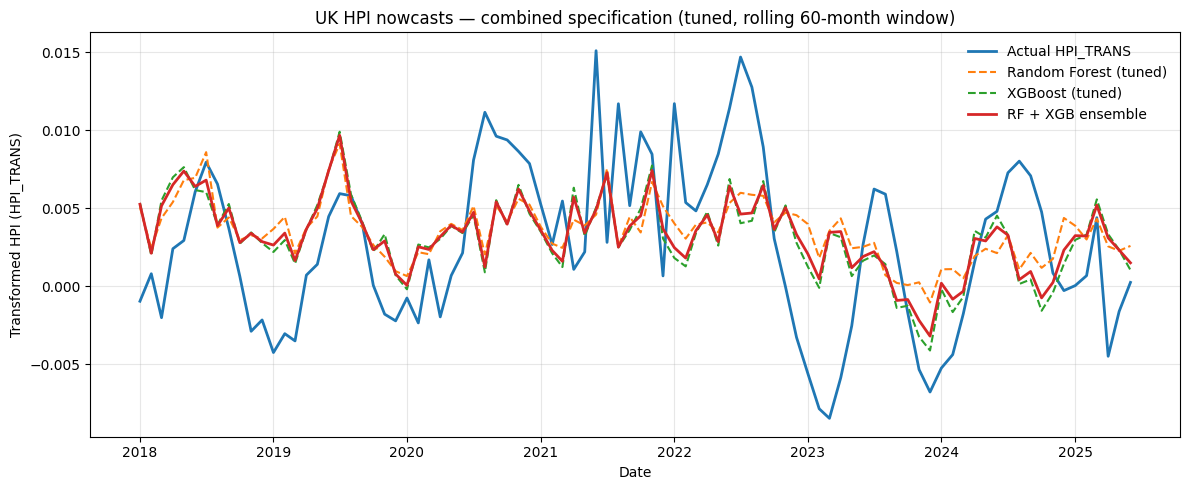

In [ ]:
# Plot of Actual vs Rf vs XG vs Ensemble
import pandas as pd
import matplotlib.pyplot as plt

# File names for the combined spec
rf_path  = "UK_nowcast_RF_combined_TUNED_lag1to6_rolling60m.csv"
xgb_path = "UK_nowcast_XGB_combined_TUNED_lag1to6_rolling60m.csv"
ens_path = "UK_nowcast_ENSEMBLE_combined_TUNED_lag1to6_rolling60m.csv"

# Load the three series
df_rf  = pd.read_csv(rf_path, parse_dates=["Date"])
df_xgb = pd.read_csv(xgb_path, parse_dates=["Date"])
df_ens = pd.read_csv(ens_path, parse_dates=["Date"])

# Merge on Date
df = pd.merge(df_rf, df_xgb, on="Date", suffixes=("_RF", "_XGB"))
df = pd.merge(df, df_ens, on="Date")   # ensemble file already has 'Actual' and 'Pred_ENSEMBLE'

# Align column names
df = df.rename(columns={
    "UK_HPI_true_mean_of_regions_RF": "Actual_RF",
    "UK_HPI_true_mean_of_regions_XGB": "Actual_XGB",
    "Actual": "Actual_ENS",
    "UK_HPI_pred_RF_combined_TUNED_lag1to6":  "Pred_RF",
    "UK_HPI_pred_XGB_combined_TUNED_lag1to6": "Pred_XGB",
    "Pred_ENSEMBLE": "Pred_ENSEMBLE"
})

# Use one common Actual series
df["Actual"] = df["Actual_RF"]

# Plot
plt.figure(figsize=(12, 5))
plt.plot(df["Date"], df["Actual"], label="Actual HPI_TRANS", linewidth=2)
plt.plot(df["Date"], df["Pred_RF"], linestyle="--", label="Random Forest (tuned)")
plt.plot(df["Date"], df["Pred_XGB"], linestyle="--", label="XGBoost (tuned)")
plt.plot(df["Date"], df["Pred_ENSEMBLE"], label="RF + XGB ensemble", linewidth=2)

plt.title("UK HPI nowcasts — combined specification (tuned, rolling 60-month window)")
plt.xlabel("Date")
plt.ylabel("Transformed HPI (HPI_TRANS)")
plt.legend(frameon=False)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

Running ML models with best features per specification

Random Forest

In [ ]:
# Random Forest with best features

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error


TARGET        = "HPI_TRANS"
START_TEST    = pd.Timestamp("2018-01-01")
PRE_END       = pd.Timestamp("2017-12-31")
WINDOW_MONTHS = 60


TOP_K_PER_SPEC    = None
TOP_FRAC_PER_SPEC = 0.5

# Loading data
df = df1.copy()
df["Date"] = pd.to_datetime(df["Date"])
df = df.sort_values(["Date", "RegionName"]).reset_index(drop=True)

start_date = df["Date"].min().date()
end_date   = df["Date"].max().date()
print(f"Random Forest with best features only (lag 1–6)")
print(f"Data covers the period from {start_date} to {end_date}.")
print(f"Rolling window length: {WINDOW_MONTHS} months. Out-of-sample start: {START_TEST.date()}.")


spec_labels = {
    "traditional": "Traditional",
    "highfreq":    "High-Frequency",
    "combined":    "Combined"
}


def eval_metrics(y_true, y_pred):
    """Compute RMSE, MAE"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae  = mean_absolute_error(y_true, y_pred)
    return rmse, mae

def rolling_expanding_panel_splits(all_dates, start_test, window_months=60):
    """
    For each test month >= start_test, train on the previous `window_months`.
    Returns (train_start, train_end), test_date.
    """
    test_dates = [d for d in all_dates if d >= start_test]
    for test_date in test_dates:
        train_end = test_date - pd.offsets.MonthBegin(1)
        train_start = max(
            all_dates[0],
            train_end - pd.DateOffset(months=window_months) + pd.offsets.MonthBegin(1)
        )
        yield (train_start, train_end), test_date

def rank_features_preperiod(frame, features, target, pre_end):
    """
    Fit a baseline RF on pre-2018 data and return:
      - list of features sorted by importance
      - a small importance table
    """
    cols = ["Date", "RegionName", target] + features
    pre_df = frame.loc[frame["Date"] <= pre_end, cols].dropna().copy()

    if pre_df.empty:
        raise ValueError("Pre-2018 slice is empty. Check PRE_END or data range.")

    X_pre = pre_df[features]
    y_pre = pre_df[target]

    rf_temp = RandomForestRegressor(
        n_estimators=600,
        max_depth=None,
        min_samples_leaf=3,
        max_features="sqrt",
        random_state=42,
        n_jobs=-1
    )

    rf_temp.fit(X_pre, y_pre)
    importances = pd.Series(rf_temp.feature_importances_, index=features).sort_values(ascending=False)
    imp_table = importances.reset_index().rename(columns={"index": "Feature", 0: "Importance"})
    return importances.index.tolist(), imp_table

def select_top_features(sorted_feats, top_k=None, top_frac=None):
    """
    Select the top K or top fraction of features from a sorted list.
    """
    if top_k is not None:
        k = max(1, min(top_k, len(sorted_feats)))
        return sorted_feats[:k]
    if top_frac is not None:
        k = max(1, int(np.ceil(len(sorted_feats) * top_frac)))
        return sorted_feats[:k]
    return sorted_feats

# Running RF per specification

results = []

for spec_key, feature_list in FEATURE_SETS.items():
    label = spec_labels.get(spec_key, spec_key)

    # Keep only features that actually exist in df
    FEATURES_FULL = [c for c in feature_list if c in df.columns]
    if not FEATURES_FULL:
        raise ValueError(f"No matching lagged features found in df for spec '{spec_key}'.")

    print("\n")
    print(f"Random Forest with best features – {label}")
    print(f"Total predictors available: {len(FEATURES_FULL)}")

    # 1. Rank features using pre-2018 data
    sorted_feats, imp_table = rank_features_preperiod(
        df, FEATURES_FULL, TARGET, PRE_END
    )
    print("Top feature importances on the pre-2018 period:")
    print(imp_table.head(10))

    # 2. Select the best subset
    FEATURES_BEST = select_top_features(
        sorted_feats,
        top_k=TOP_K_PER_SPEC,
        top_frac=TOP_FRAC_PER_SPEC
    )
    print(f"Using {len(FEATURES_BEST)} out of {len(FEATURES_FULL)} predictors for {label}.")

    # 3. Rolling RF nowcast with reduced feature set
    rf = RandomForestRegressor(
        n_estimators=600,
        max_depth=None,
        min_samples_leaf=3,
        max_features="sqrt",
        random_state=42,
        n_jobs=-1
    )

    uk_true, uk_pred = [], []
    step = 0

    for (train_start, train_end), test_date in rolling_expanding_panel_splits(
        dates, START_TEST, window_months=WINDOW_MONTHS
    ):
        tr = (df["Date"] >= train_start) & (df["Date"] <= train_end)
        te = (df["Date"] == test_date)

        train_df = df.loc[tr]
        test_df  = df.loc[te]

        # Require at least 24 distinct months in training and a non-empty test month
        if train_df["Date"].nunique() < 24 or test_df.empty:
            continue

        X_tr, y_tr = train_df[FEATURES_BEST], train_df[TARGET]
        X_te, y_te = test_df[FEATURES_BEST], test_df[TARGET]

        rf.fit(X_tr, y_tr)
        preds = rf.predict(X_te)

        uk_pred.append(float(np.mean(preds)))
        uk_true.append(float(np.mean(y_te.values)))

        step += 1
        if step % 6 == 0:
            print(f"Evaluated up to {test_date.date()} (steps = {step})")

    rmse, mae = eval_metrics(uk_true, uk_pred)
    print(f"{label} – reduced feature set: RMSE = {rmse:.5f}, MAE = {mae:.5f}, MAPE = {mape:.2f}%")

    # 4. Save nowcast series
    out_dates = sorted(set(df.loc[df["Date"] >= START_TEST, "Date"]))[:len(uk_true)]
    out_df = pd.DataFrame({
        "Date": out_dates,
        "UK_HPI_true_mean_of_regions": uk_true,
        f"UK_HPI_pred_RF_{spec_key}_BESTFEATS_lag1to6": uk_pred
    }).set_index("Date")

    fname = f"UK_nowcast_RF_{spec_key}_BESTFEATS_lag1to6_rolling{WINDOW_MONTHS}m.csv"
    out_df.to_csv(fname)
    print(f"Saved nowcast file: {fname}")

    results.append({
        "Model": "RandomForest (baseline, best features)",
        "Spec": label,
        "Spec_key": spec_key,
        "Window": f"Rolling-{WINDOW_MONTHS}m",
        "RMSE": rmse,
        "MAE": mae,
        "n_features_full": len(FEATURES_FULL),
        "n_features_used": len(FEATURES_BEST)
    })

# Summary table

summary_df = (
    pd.DataFrame(results)
    .sort_values("RMSE")
    .reset_index(drop=True)
)

print("\nSummary – Random Forest with best features only (lag 1–6):")
print(summary_df)

summary_name = f"RF_BestFeaturesOnly_Summary_Lag1to6_Rolling{WINDOW_MONTHS}m.csv"
summary_df.to_csv(summary_name, index=False)
print(f"Saved summary file: {summary_name}")

Random Forest with best features only (lag 1–6)
Data covers the period from 2006-08-01 to 2025-06-01.
Rolling window length: 60 months. Out-of-sample start: 2018-01-01.


Random Forest with best features – Traditional
Total predictors available: 48
Top feature importances on the pre-2018 period:
                         Feature  Importance
0   MortgageApprovals_TRANS_lag3    0.053015
1    UnemploymentRate_TRANS_lag1    0.051208
2            BankRate_TRANS_lag1    0.050934
3    UnemploymentRate_TRANS_lag2    0.047299
4   MortgageApprovals_TRANS_lag4    0.045735
5   MortgageApprovals_TRANS_lag5    0.043821
6  ConsumerConfidence_TRANS_lag4    0.035829
7   MortgageApprovals_TRANS_lag6    0.034697
8    UnemploymentRate_TRANS_lag3    0.031503
9   MortgageApprovals_TRANS_lag2    0.030761
Using 24 out of 48 predictors for Traditional.
Evaluated up to 2018-06-01 (steps = 6)
Evaluated up to 2018-12-01 (steps = 12)
Evaluated up to 2019-06-01 (steps = 18)
Evaluated up to 2019-12-01 (steps = 24)
Ev

XGBoost

In [ ]:
# XGBoost with best features only for each specification

import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error


TARGET        = "HPI_TRANS"
START_TEST    = pd.Timestamp("2018-01-01")
PRE_END       = pd.Timestamp("2017-12-31")
WINDOW_MONTHS = 60

# Number of features to keep per specification
TOP_K_PER_SPEC    = None
TOP_FRAC_PER_SPEC = 0.5

#Loading data
# Loading data
df = df1.copy()
df["Date"] = pd.to_datetime(df["Date"])
df = df.sort_values(["Date", "RegionName"]).reset_index(drop=True)

dates = sorted(df["Date"].unique())

start_date = df["Date"].min().date()
end_date   = df["Date"].max().date()
print("XGBoost with best features only (lag 1–6)")
print(f"Data covers the period from {start_date} to {end_date}.")
print(f"Rolling window length: {WINDOW_MONTHS} months. Out-of-sample start: {START_TEST.date()}.")

spec_labels = {
    "traditional": "Traditional",
    "highfreq":    "High-Frequency",
    "combined":    "Combined"
}



def eval_metrics(y_true, y_pred):
    """Compute RMSE and MAE."""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae  = mean_absolute_error(y_true, y_pred)
    return rmse, mae

def rolling_expanding_panel_splits(all_dates, start_test, window_months=60):
    """
    For each test month >= start_test, train on the previous `window_months`.
    Returns (train_start, train_end), test_date.
    """
    test_dates = [d for d in all_dates if d >= start_test]
    for test_date in test_dates:
        train_end = test_date - pd.offsets.MonthBegin(1)
        train_start = max(
            all_dates[0],
            train_end - pd.DateOffset(months=window_months) + pd.offsets.MonthBegin(1)
        )
        yield (train_start, train_end), test_date

def rank_features_preperiod(frame, features, target, pre_end):
    """
    Fit a baseline XGB model on pre-2018 data and return:
      - list of features sorted by importance
      - an importance table
    """
    cols = ["Date", "RegionName", target] + features
    pre_df = frame.loc[frame["Date"] <= pre_end, cols].dropna().copy()

    if pre_df.empty:
        raise ValueError("Pre-2018 slice is empty. Check PRE_END or data range.")

    X_pre = pre_df[features]
    y_pre = pre_df[target]

    xgb_temp = XGBRegressor(
        n_estimators=500,
        learning_rate=0.05,
        max_depth=5,
        subsample=0.8,
        colsample_bytree=0.8,
        objective="reg:squarederror",
        random_state=42,
        n_jobs=-1
    )

    xgb_temp.fit(X_pre, y_pre)
    importances = pd.Series(xgb_temp.feature_importances_, index=features).sort_values(ascending=False)
    imp_table = importances.reset_index().rename(columns={"index": "Feature", 0: "Importance"})
    return importances.index.tolist(), imp_table

def select_top_features(sorted_feats, top_k=None, top_frac=None):
    """
    Select the top K or top fraction of features from a sorted list.
    """
    if top_k is not None:
        k = max(1, min(top_k, len(sorted_feats)))
        return sorted_feats[:k]
    if top_frac is not None:
        k = max(1, int(np.ceil(len(sorted_feats) * top_frac)))
        return sorted_feats[:k]
    return sorted_feats

# Running XGBoost per specification

results = []

for spec_key, feature_list in FEATURE_SETS.items():
    label = spec_labels.get(spec_key, spec_key)

    # Keep only features that actually exist in df
    FEATURES_FULL = [c for c in feature_list if c in df.columns]
    if not FEATURES_FULL:
        raise ValueError(f"No matching lagged features found in df for spec '{spec_key}'.")

    print("\n")
    print(f"XGBoost with best features – {label}")
    print(f"Total predictors available: {len(FEATURES_FULL)}")

    # 1. Rank features using pre-2018 data
    sorted_feats, imp_table = rank_features_preperiod(
        df, FEATURES_FULL, TARGET, PRE_END
    )
    print("Top feature importances on the pre-2018 period:")
    print(imp_table.head(10))

    # 2. Select the best subset
    FEATURES_BEST = select_top_features(
        sorted_feats,
        top_k=TOP_K_PER_SPEC,
        top_frac=TOP_FRAC_PER_SPEC
    )
    print(f"Using {len(FEATURES_BEST)} out of {len(FEATURES_FULL)} predictors for {label}.")

    # 3. Rolling XGB nowcast with reduced feature set
    xgb_model = XGBRegressor(
        n_estimators=500,
        learning_rate=0.05,
        max_depth=5,
        subsample=0.8,
        colsample_bytree=0.8,
        objective="reg:squarederror",
        random_state=42,
        n_jobs=-1
    )

    uk_true, uk_pred = [], []
    step = 0

    for (train_start, train_end), test_date in rolling_expanding_panel_splits(
        dates, START_TEST, window_months=WINDOW_MONTHS
    ):
        tr = (df["Date"] >= train_start) & (df["Date"] <= train_end)
        te = (df["Date"] == test_date)

        train_df = df.loc[tr]
        test_df  = df.loc[te]

        # Require at least 24 distinct months in training and a non-empty test month
        if train_df["Date"].nunique() < 24 or test_df.empty:
            continue

        X_tr, y_tr = train_df[FEATURES_BEST], train_df[TARGET]
        X_te, y_te = test_df[FEATURES_BEST], test_df[TARGET]

        xgb_model.fit(X_tr, y_tr)
        preds = xgb_model.predict(X_te)

        uk_pred.append(float(np.mean(preds)))
        uk_true.append(float(np.mean(y_te.values)))

        step += 1
        if step % 6 == 0:
            print(f"Evaluated up to {test_date.date()} (steps = {step})")

    rmse, mae = eval_metrics(uk_true, uk_pred)
    print(f"{label} – reduced feature set: RMSE = {rmse:.5f}, MAE = {mae:.5f}")

    # 4. Save nowcast series
    out_dates = sorted(set(df.loc[df["Date"] >= START_TEST, "Date"]))[:len(uk_true)]
    out_df = pd.DataFrame({
        "Date": out_dates,
        "UK_HPI_true_mean_of_regions": uk_true,
        f"UK_HPI_pred_XGB_{spec_key}_BESTFEATS_lag1to6": uk_pred
    }).set_index("Date")

    fname = f"UK_nowcast_XGB_{spec_key}_BESTFEATS_lag1to6_rolling{WINDOW_MONTHS}m.csv"
    out_df.to_csv(fname)
    print(f"Saved nowcast file: {fname}")

    results.append({
        "Model": "XGBoost (baseline, best features)",
        "Spec": label,
        "Spec_key": spec_key,
        "Window": f"Rolling-{WINDOW_MONTHS}m",
        "RMSE": rmse,
        "MAE": mae,
        "n_features_full": len(FEATURES_FULL),
        "n_features_used": len(FEATURES_BEST)
    })


# Summary table
summary_df = (
    pd.DataFrame(results)
    .sort_values("RMSE")
    .reset_index(drop=True)
)

print("\nSummary – XGBoost with best features only (lag 1–6):")
print(summary_df)

summary_name = f"XGB_BestFeaturesOnly_Summary_Lag1to6_Rolling{WINDOW_MONTHS}m.csv"
summary_df.to_csv(summary_name, index=False)
print(f"Saved summary file: {summary_name}")

XGBoost with best features only (lag 1–6)
Data covers the period from 2006-08-01 to 2025-06-01.
Rolling window length: 60 months. Out-of-sample start: 2018-01-01.


XGBoost with best features – Traditional
Total predictors available: 48
Top feature importances on the pre-2018 period:
                             Feature  Importance
0                BankRate_TRANS_lag1    0.365850
1       MortgageApprovals_TRANS_lag3    0.056542
2        UnemploymentRate_TRANS_lag4    0.041778
3      ConsumerConfidence_TRANS_lag4    0.033501
4        UnemploymentRate_TRANS_lag1    0.032348
5            MortgageRate_TRANS_lag1    0.031981
6       MortgageApprovals_TRANS_lag4    0.026428
7  ConstructionCost_Index_TRANS_lag3    0.021960
8                BankRate_TRANS_lag4    0.020037
9      ConsumerConfidence_TRANS_lag3    0.019770
Using 24 out of 48 predictors for Traditional.
Evaluated up to 2018-06-01 (steps = 6)
Evaluated up to 2018-12-01 (steps = 12)
Evaluated up to 2019-06-01 (steps = 18)
Evaluated 

Ridge Regression

In [ ]:
# Ridge regression with best features for each specification

import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error

TARGET        = "HPI_TRANS"
START_TEST    = pd.Timestamp("2018-01-01")
PRE_END       = pd.Timestamp("2017-12-31")
WINDOW_MONTHS = 60

# Number of features to keep per specification
TOP_K_PER_SPEC    = None
TOP_FRAC_PER_SPEC = 0.5

# Loading data

df = df1.copy()
df["Date"] = pd.to_datetime(df["Date"])
df = df.sort_values(["Date", "RegionName"]).reset_index(drop=True)

dates = sorted(df["Date"].unique())

start_date = df["Date"].min().date()
end_date   = df["Date"].max().date()
print("Ridge regression with best features only (lag 1–6)")
print(f"Data covers the period from {start_date} to {end_date}.")
print(f"Rolling window length: {WINDOW_MONTHS} months. Out-of-sample start: {START_TEST.date()}.")

spec_labels = {
    "traditional": "Traditional",
    "highfreq":    "High-Frequency",
    "combined":    "Combined"
}


def eval_metrics(y_true, y_pred):
    """Compute RMSE and MAE."""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae  = mean_absolute_error(y_true, y_pred)
    return rmse, mae

def rolling_expanding_panel_splits(all_dates, start_test, window_months=60):
    """
    For each test month >= start_test, train on the previous `window_months`.
    Returns (train_start, train_end), test_date.
    """
    test_dates = [d for d in all_dates if d >= start_test]
    for test_date in test_dates:
        train_end = test_date - pd.offsets.MonthBegin(1)
        train_start = max(
            all_dates[0],
            train_end - pd.DateOffset(months=window_months) + pd.offsets.MonthBegin(1)
        )
        yield (train_start, train_end), test_date

def rank_features_preperiod(frame, features, target, pre_end):
    """
    Fit a baseline Ridge model (with scaling) on pre-2018 data and return:
      - list of features sorted by |coefficient|
      - a small importance table
    """
    cols = ["Date", "RegionName", target] + features
    pre_df = frame.loc[frame["Date"] <= pre_end, cols].dropna().copy()

    if pre_df.empty:
        raise ValueError("Pre-2018 slice is empty. Check PRE_END or data range.")

    X_pre = pre_df[features]
    y_pre = pre_df[target]

    ridge_pipe = Pipeline([
        ("scaler", StandardScaler()),
        ("ridge", Ridge(alpha=1.0, random_state=42))
    ])

    ridge_pipe.fit(X_pre, y_pre)

    coefs = ridge_pipe.named_steps["ridge"].coef_
    abs_importance = pd.Series(np.abs(coefs), index=features).sort_values(ascending=False)

    imp_table = abs_importance.reset_index().rename(columns={"index": "Feature", 0: "AbsCoefficient"})
    return abs_importance.index.tolist(), imp_table

def select_top_features(sorted_feats, top_k=None, top_frac=None):
    """
    Select the top K or top fraction of features from a sorted list.
    """
    if top_k is not None:
        k = max(1, min(top_k, len(sorted_feats)))
        return sorted_feats[:k]
    if top_frac is not None:
        k = max(1, int(np.ceil(len(sorted_feats) * top_frac)))
        return sorted_feats[:k]
    return sorted_feats


# Running Ridge per specification

results = []

for spec_key, feature_list in FEATURE_SETS.items():
    label = spec_labels.get(spec_key, spec_key)

    # Keep only features that actually exist in df
    FEATURES_FULL = [c for c in feature_list if c in df.columns]
    if not FEATURES_FULL:
        raise ValueError(f"No matching lagged features found in df for spec '{spec_key}'.")

    print("\n")
    print(f"Ridge regression with best features – {label}")
    print(f"Total predictors available: {len(FEATURES_FULL)}")

    # 1. Rank features using pre-2018 data
    sorted_feats, imp_table = rank_features_preperiod(
        df, FEATURES_FULL, TARGET, PRE_END
    )
    print("Top feature coefficients (by absolute size) on the pre-2018 period:")
    print(imp_table.head(10))

    # 2. Select the best subset
    FEATURES_BEST = select_top_features(
        sorted_feats,
        top_k=TOP_K_PER_SPEC,
        top_frac=TOP_FRAC_PER_SPEC
    )
    print(f"Using {len(FEATURES_BEST)} out of {len(FEATURES_FULL)} predictors for {label}.")

    # 3. Rolling Ridge nowcast with reduced feature set
    ridge_model = Pipeline([
        ("scaler", StandardScaler()),
        ("ridge", Ridge(alpha=1.0, random_state=42))
    ])

    uk_true, uk_pred = [], []
    step = 0

    for (train_start, train_end), test_date in rolling_expanding_panel_splits(
        dates, START_TEST, window_months=WINDOW_MONTHS
    ):
        tr = (df["Date"] >= train_start) & (df["Date"] <= train_end)
        te = (df["Date"] == test_date)

        train_df = df.loc[tr]
        test_df  = df.loc[te]

        # Require at least 24 distinct months in training and a non-empty test month
        if train_df["Date"].nunique() < 24 or test_df.empty:
            continue

        X_tr, y_tr = train_df[FEATURES_BEST], train_df[TARGET]
        X_te, y_te = test_df[FEATURES_BEST], test_df[TARGET]

        ridge_model.fit(X_tr, y_tr)
        preds = ridge_model.predict(X_te)

        uk_pred.append(float(np.mean(preds)))
        uk_true.append(float(np.mean(y_te.values)))

        step += 1
        if step % 6 == 0:
            print(f"Evaluated up to {test_date.date()} (steps = {step})")

    rmse, mae = eval_metrics(uk_true, uk_pred)
    print(f"{label} – reduced feature set: RMSE = {rmse:.5f}, MAE = {mae:.5f}")

    # 4. Save UK-level nowcast series
    out_dates = sorted(set(df.loc[df["Date"] >= START_TEST, "Date"]))[:len(uk_true)]
    out_df = pd.DataFrame({
        "Date": out_dates,
        "UK_HPI_true_mean_of_regions": uk_true,
        f"UK_HPI_pred_Ridge_{spec_key}_BESTFEATS_lag1to6": uk_pred
    }).set_index("Date")

    fname = f"UK_nowcast_Ridge_{spec_key}_BESTFEATS_lag1to6_rolling{WINDOW_MONTHS}m.csv"
    out_df.to_csv(fname)
    print(f"Saved nowcast file: {fname}")

    results.append({
        "Model": "Ridge (baseline, best features)",
        "Spec": label,
        "Spec_key": spec_key,
        "Window": f"Rolling-{WINDOW_MONTHS}m",
        "RMSE": rmse,
        "MAE": mae,
        "n_features_full": len(FEATURES_FULL),
        "n_features_used": len(FEATURES_BEST)
    })


# Summary table
summary_df = (
    pd.DataFrame(results)
    .sort_values("RMSE")
    .reset_index(drop=True)
)

print("\nSummary – Ridge regression with best features only (lag 1–6):")
print(summary_df)

summary_name = f"Ridge_BestFeaturesOnly_Summary_Lag1to6_Rolling{WINDOW_MONTHS}m.csv"
summary_df.to_csv(summary_name, index=False)
print(f"Saved summary file: {summary_name}")

Ridge regression with best features only (lag 1–6)
Data covers the period from 2006-08-01 to 2025-06-01.
Rolling window length: 60 months. Out-of-sample start: 2018-01-01.


Ridge regression with best features – Traditional
Total predictors available: 48
Top feature coefficients (by absolute size) on the pre-2018 period:
                             Feature  AbsCoefficient
0            MortgageRate_TRANS_lag3        0.001568
1       MortgageApprovals_TRANS_lag5        0.001352
2                BankRate_TRANS_lag5        0.001177
3       MortgageApprovals_TRANS_lag6        0.001162
4            MortgageRate_TRANS_lag2        0.001148
5            MortgageRate_TRANS_lag1        0.001129
6        UnemploymentRate_TRANS_lag6        0.001101
7  ConstructionCost_Index_TRANS_lag1        0.001026
8       MortgageApprovals_TRANS_lag4        0.000998
9                BankRate_TRANS_lag3        0.000967
Using 24 out of 48 predictors for Traditional.
Evaluated up to 2018-06-01 (steps = 6)
Evaluate

Lasso Regression

In [ ]:
# Lasso regression with best features for each specification

import pandas as pd
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error


TARGET        = "HPI_TRANS"
START_TEST    = pd.Timestamp("2018-01-01")
PRE_END       = pd.Timestamp("2017-12-31")
WINDOW_MONTHS = 60

# Number of features to keep per specification
TOP_K_PER_SPEC    = None
TOP_FRAC_PER_SPEC = 0.5

# Loading data
df = df1.copy()
df["Date"] = pd.to_datetime(df["Date"])
df = df.sort_values(["Date", "RegionName"]).reset_index(drop=True)

dates = sorted(df["Date"].unique())

start_date = df["Date"].min().date()
end_date   = df["Date"].max().date()
print("Lasso regression with best features only (lag 1–6)")
print(f"Data covers the period from {start_date} to {end_date}.")
print(f"Rolling window length: {WINDOW_MONTHS} months. Out-of-sample start: {START_TEST.date()}.")

spec_labels = {
    "traditional": "Traditional",
    "highfreq":    "High-Frequency",
    "combined":    "Combined"
}



def eval_metrics(y_true, y_pred):
    """Compute RMSE and MAE."""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae  = mean_absolute_error(y_true, y_pred)
    return rmse, mae

def rolling_expanding_panel_splits(all_dates, start_test, window_months=60):
    """
    For each test month >= start_test, train on the previous `window_months`.
    Returns (train_start, train_end), test_date.
    """
    test_dates = [d for d in all_dates if d >= start_test]
    for test_date in test_dates:
        train_end = test_date - pd.offsets.MonthBegin(1)
        train_start = max(
            all_dates[0],
            train_end - pd.DateOffset(months=window_months) + pd.offsets.MonthBegin(1)
        )
        yield (train_start, train_end), test_date

def rank_features_preperiod(frame, features, target, pre_end):
    """
    Fit a baseline Lasso model (with scaling) on pre-2018 data and return:
      - list of features sorted by |coefficient|
      - a small importance table
    """
    cols = ["Date", "RegionName", target] + features
    pre_df = frame.loc[frame["Date"] <= pre_end, cols].dropna().copy()

    if pre_df.empty:
        raise ValueError("Pre-2018 slice is empty. Check PRE_END or data range.")

    X_pre = pre_df[features]
    y_pre = pre_df[target]

    lasso_pipe = Pipeline([
        ("scaler", StandardScaler()),
        ("lasso", Lasso(alpha=0.01, random_state=42, max_iter=10000))
    ])

    lasso_pipe.fit(X_pre, y_pre)

    coefs = lasso_pipe.named_steps["lasso"].coef_
    abs_importance = pd.Series(np.abs(coefs), index=features).sort_values(ascending=False)

    imp_table = abs_importance.reset_index().rename(columns={"index": "Feature", 0: "AbsCoefficient"})
    return abs_importance.index.tolist(), imp_table

def select_top_features(sorted_feats, top_k=None, top_frac=None):
    """
    Select the top K or top fraction of features from a sorted list.
    """
    if top_k is not None:
        k = max(1, min(top_k, len(sorted_feats)))
        return sorted_feats[:k]
    if top_frac is not None:
        k = max(1, int(np.ceil(len(sorted_feats) * top_frac)))
        return sorted_feats[:k]
    return sorted_feats


# Running Lasso per specification
results = []

for spec_key, feature_list in FEATURE_SETS.items():
    label = spec_labels.get(spec_key, spec_key)

    # Keep only features that actually exist in df
    FEATURES_FULL = [c for c in feature_list if c in df.columns]
    if not FEATURES_FULL:
        raise ValueError(f"No matching lagged features found in df for spec '{spec_key}'.")

    print("\n")
    print(f"Lasso regression with best features – {label}")
    print(f"Total predictors available: {len(FEATURES_FULL)}")

    # 1. Rank features using pre-2018 data
    sorted_feats, imp_table = rank_features_preperiod(
        df, FEATURES_FULL, TARGET, PRE_END
    )
    print("Top feature coefficients (by absolute size) on the pre-2018 period:")
    print(imp_table.head(10))

    # 2. Select the best subset
    FEATURES_BEST = select_top_features(
        sorted_feats,
        top_k=TOP_K_PER_SPEC,
        top_frac=TOP_FRAC_PER_SPEC
    )
    print(f"Using {len(FEATURES_BEST)} out of {len(FEATURES_FULL)} predictors for {label}.")

    # 3. Rolling Lasso nowcast with reduced feature set
    lasso_model = Pipeline([
        ("scaler", StandardScaler()),
        ("lasso", Lasso(alpha=0.01, random_state=42, max_iter=10000))
    ])

    uk_true, uk_pred = [], []
    step = 0

    for (train_start, train_end), test_date in rolling_expanding_panel_splits(
        dates, START_TEST, window_months=WINDOW_MONTHS
    ):
        tr = (df["Date"] >= train_start) & (df["Date"] <= train_end)
        te = (df["Date"] == test_date)

        train_df = df.loc[tr]
        test_df  = df.loc[te]

        # Require at least 24 distinct months in training and a non-empty test month
        if train_df["Date"].nunique() < 24 or test_df.empty:
            continue

        X_tr, y_tr = train_df[FEATURES_BEST], train_df[TARGET]
        X_te, y_te = test_df[FEATURES_BEST], test_df[TARGET]

        lasso_model.fit(X_tr, y_tr)
        preds = lasso_model.predict(X_te)

        uk_pred.append(float(np.mean(preds)))
        uk_true.append(float(np.mean(y_te.values)))

        step += 1
        if step % 6 == 0:
            print(f"Evaluated up to {test_date.date()} (steps = {step})")

    rmse, mae = eval_metrics(uk_true, uk_pred)
    print(f"{label} – reduced feature set: RMSE = {rmse:.5f}, MAE = {mae:.5f}")

    # 4. Save UK-level nowcast series
    out_dates = sorted(set(df.loc[df["Date"] >= START_TEST, "Date"]))[:len(uk_true)]
    out_df = pd.DataFrame({
        "Date": out_dates,
        "UK_HPI_true_mean_of_regions": uk_true,
        f"UK_HPI_pred_Lasso_{spec_key}_BESTFEATS_lag1to6": uk_pred
    }).set_index("Date")

    fname = f"UK_nowcast_Lasso_{spec_key}_BESTFEATS_lag1to6_rolling{WINDOW_MONTHS}m.csv"
    out_df.to_csv(fname)
    print(f"Saved nowcast file: {fname}")

    results.append({
        "Model": "Lasso (baseline, best features)",
        "Spec": label,
        "Spec_key": spec_key,
        "Window": f"Rolling-{WINDOW_MONTHS}m",
        "RMSE": rmse,
        "MAE": mae,
        "n_features_full": len(FEATURES_FULL),
        "n_features_used": len(FEATURES_BEST)
    })


# Summary table
summary_df = (
    pd.DataFrame(results)
    .sort_values("RMSE")
    .reset_index(drop=True)
)

print("\nSummary – Lasso regression with best features only (lag 1–6):")
print(summary_df)

summary_name = f"Lasso_BestFeaturesOnly_Summary_Lag1to6_Rolling{WINDOW_MONTHS}m.csv"
summary_df.to_csv(summary_name, index=False)
print(f"Saved summary file: {summary_name}")

Lasso regression with best features only (lag 1–6)
Data covers the period from 2006-08-01 to 2025-06-01.
Rolling window length: 60 months. Out-of-sample start: 2018-01-01.


Lasso regression with best features – Traditional
Total predictors available: 48
Top feature coefficients (by absolute size) on the pre-2018 period:
                          Feature  AbsCoefficient
0  AW_Regular_Earnings_TRANS_lag1             0.0
1  AW_Regular_Earnings_TRANS_lag2             0.0
2  AW_Regular_Earnings_TRANS_lag3             0.0
3  AW_Regular_Earnings_TRANS_lag4             0.0
4  AW_Regular_Earnings_TRANS_lag5             0.0
5  AW_Regular_Earnings_TRANS_lag6             0.0
6     UnemploymentRate_TRANS_lag1             0.0
7     UnemploymentRate_TRANS_lag2             0.0
8     UnemploymentRate_TRANS_lag3             0.0
9     UnemploymentRate_TRANS_lag4             0.0
Using 24 out of 48 predictors for Traditional.
Evaluated up to 2018-06-01 (steps = 6)
Evaluated up to 2018-12-01 (steps = 12)
E

Optimal Lags

In [ ]:
# Select optimal lag for each variable based on absolute correlation with target variable

df_lagged = df1.copy()
df_lagged["Date"] = pd.to_datetime(df_lagged["Date"])

TARGET = "HPI_TRANS"
MAX_LAG = 6

# base variables
base_vars = [
    "AW_Regular_Earnings_TRANS",
    "UnemploymentRate_TRANS",
    "CPI_TRANS",
    "MortgageApprovals_TRANS",
    "MortgageRate_TRANS",
    "BankRate_TRANS",
    "ConsumerConfidence_TRANS",
    "ConstructionCost_Index_TRANS",
    "GT_demand_TRANS",
    "GT_economicpolicy_TRANS",
    "GT_marketawareness_TRANS",
    "GT_mortgage_financing_TRANS",
    "GT_renting_affordability_TRANS",
    "GDELT_average_news_tone_normalized_TRANS",
]

def pick_optimal_lags(df_lagged, base_vars, target="HPI_TRANS", max_lag=6, min_abs_corr=0.0):
    """
    For each variable in base_vars, look at its lag1..lagK columns and
    choose the lag with the strongest absolute correlation with the target.
    Returns:
       - lag_map: { variable_name : best_lag_number }
       - summary table with correlations
    """
    rows = []
    lag_map = {}

    for v in base_vars:
        best_corr = None
        best_lag  = None

        for L in range(1, max_lag + 1):
            col = f"{v}_lag{L}"
            if col not in df_lagged.columns:
                continue

            sub = df_lagged[[target, col]].dropna()
            if sub.empty:
                continue

            r = sub[target].corr(sub[col])
            if r is None or np.isnan(r):
                continue

            if (best_corr is None) or (abs(r) > abs(best_corr)):
                best_corr = r
                best_lag  = L

        # record results
        if best_lag is not None and abs(best_corr) >= min_abs_corr:
            lag_map[v] = best_lag
            rows.append((v, best_lag, best_corr))
        else:
            rows.append((v, np.nan, np.nan))

    summary = pd.DataFrame(rows, columns=["Variable", "BestLag", "Correlation"]).sort_values(
        by="Correlation", key=lambda s: s.abs(), ascending=False
    )

    return lag_map, summary

optimal_lags, cc_summary = pick_optimal_lags(
    df_lagged=df_lagged,
    base_vars=base_vars,
    target=TARGET,
    max_lag=MAX_LAG
)

print("Optimal lags chosen:")
print(cc_summary.head(20))

# Building optimal-lag-only feature list
def make_optimal_lag_features(df_lagged, lag_map):
    feats = []
    for v, L in lag_map.items():
        col = f"{v}_lag{L}"
        if col in df_lagged.columns:
            feats.append(col)
        else:
            print(f"Missing expected column: {col}")
    return feats

FEATURES_OPT = make_optimal_lag_features(df_lagged, optimal_lags)
print(f"Using {len(FEATURES_OPT)} optimal-lag predictors.")

# final optimal-lag dataset for lag1–6 case
final_ml_optlag_6 = (
    df_lagged[["Date", "RegionName", TARGET] + FEATURES_OPT]
    .dropna()
    .reset_index(drop=True)
)

Optimal lags chosen:
                                    Variable  BestLag  Correlation
4                         MortgageRate_TRANS        1     0.118991
13  GDELT_average_news_tone_normalized_TRANS        5    -0.100828
1                     UnemploymentRate_TRANS        1    -0.096901
5                             BankRate_TRANS        1     0.087070
8                            GT_demand_TRANS        5     0.077905
7               ConstructionCost_Index_TRANS        5     0.069175
10                  GT_marketawareness_TRANS        5     0.062897
3                    MortgageApprovals_TRANS        2     0.058882
9                    GT_economicpolicy_TRANS        5     0.053012
6                   ConsumerConfidence_TRANS        3     0.049272
0                  AW_Regular_Earnings_TRANS        2     0.046125
11               GT_mortgage_financing_TRANS        5     0.039302
12            GT_renting_affordability_TRANS        5     0.037957
2                                  CPI_TR

Random Forest using only optimal lags per feature

In [ ]:
# Random Forest using optimal lag per predictor

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

TARGET        = "HPI_TRANS"
START_TEST    = pd.Timestamp("2018-01-01")
WINDOW_MONTHS = 60

# Loading the optimal-lag datase

df2 = final_ml_optlag_6.copy()
df2["Date"] = pd.to_datetime(df2["Date"])
df2 = df2.sort_values(["Date", "RegionName"]).reset_index(drop=True)

dates = sorted(df2["Date"].unique())

start_date = df2["Date"].min().date()
end_date   = df2["Date"].max().date()
print("Random Forest using one optimal lag per predictor (lag 1–6)")
print(f"Data covers the period from {start_date} to {end_date}.")
print(f"Rolling window length: {WINDOW_MONTHS} months. Out-of-sample start: {START_TEST.date()}.")


# Specifications
spec_vars = {
    "traditional": traditional_vars,
    "highfreq":    hf_vars,
    "combined":    combined_vars,
}

spec_labels = {
    "traditional": "Traditional",
    "highfreq":    "High-Frequency",
    "combined":    "Combined",
}


def eval_metrics(y_true, y_pred):
    """Compute RMSE and MAE."""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae  = mean_absolute_error(y_true, y_pred)
    return rmse, mae

def rolling_expanding_panel_splits(all_dates, start_test, window_months=60):
    """
    For each test month >= start_test, train on the previous `window_months`.
    Yields (train_start, train_end), test_date.
    """
    test_dates = [d for d in all_dates if d >= start_test]
    for test_date in test_dates:
        train_end = test_date - pd.offsets.MonthBegin(1)
        train_start = max(
            all_dates[0],
            train_end - pd.DateOffset(months=window_months) + pd.offsets.MonthBegin(1)
        )
        yield (train_start, train_end), test_date

def features_for_spec_optlag(frame, base_vars):
    """
    For each base variable (e.g. 'CPI_TRANS'), find the single column in the
    optimal-lag dataset that starts with that name (e.g. 'CPI_TRANS_lag3').
    """
    feats = []
    for v in base_vars:
        candidates = [c for c in frame.columns if c.startswith(v + "_lag")]
        if candidates:
            feats.append(candidates[0])
    return sorted(set(feats))

def make_rf():
    return RandomForestRegressor(
        n_estimators=600,
        max_depth=None,
        min_samples_leaf=3,
        max_features="sqrt",
        random_state=42,
        n_jobs=-1
    )

# Running RF per specification with optimal lags only

results = []

for spec_key, base_vars in spec_vars.items():
    label = spec_labels.get(spec_key, spec_key)

    FEATURES = features_for_spec_optlag(df2, base_vars)
    if not FEATURES:
        raise ValueError(f"No optimal-lag features found for spec '{spec_key}' in the dataset.")

    print("\n")
    print(f"Random Forest with optimal lag only – {label}")
    print(f"Number of predictors: {len(FEATURES)}")

    rf = make_rf()

    uk_true, uk_pred = [], []
    step = 0

    for (train_start, train_end), test_date in rolling_expanding_panel_splits(
        dates, START_TEST, window_months=WINDOW_MONTHS
    ):
        tr = (df2["Date"] >= train_start) & (df2["Date"] <= train_end)
        te = (df2["Date"] == test_date)

        train_df = df2.loc[tr]
        test_df  = df2.loc[te]

        # Require at least 24 distinct months in training and a non-empty test month
        if train_df["Date"].nunique() < 24 or test_df.empty:
            continue

        X_tr, y_tr = train_df[FEATURES], train_df[TARGET]
        X_te, y_te = test_df[FEATURES], test_df[TARGET]

        rf.fit(X_tr, y_tr)
        preds = rf.predict(X_te)

        uk_pred.append(float(np.mean(preds)))
        uk_true.append(float(np.mean(y_te.values)))

        step += 1
        if step % 6 == 0:
            print(f"Evaluated up to {test_date.date()} (steps = {step})")

    rmse, mae = eval_metrics(uk_true, uk_pred)
    print(f"{label} – optimal-lag features: RMSE = {rmse:.5f}, MAE = {mae:.5f}")

    # Save UK-level nowcast series
    out_dates = sorted(set(df2.loc[df2["Date"] >= START_TEST, "Date"]))[:len(uk_true)]
    out_df = pd.DataFrame({
        "Date": out_dates,
        "UK_HPI_true_mean_of_regions": uk_true,
        f"UK_HPI_pred_RF_{spec_key}_OptLag_lag1to6": uk_pred
    }).set_index("Date")

    fname = f"UK_nowcast_RF_{spec_key}_OptLag_lag1to6_rolling{WINDOW_MONTHS}m.csv"
    out_df.to_csv(fname)
    print(f"Saved nowcast file: {fname}")

    results.append({
        "Model": "RandomForest (optimal lag only)",
        "Spec": label,
        "Spec_key": spec_key,
        "Window": f"Rolling-{WINDOW_MONTHS}m",
        "RMSE": rmse,
        "MAE": mae,
        "n_features": len(FEATURES)
    })


# Summary table-

summary_df = (
    pd.DataFrame(results)
    .sort_values("RMSE")
    .reset_index(drop=True)
)

print("\nSummary – Random Forest with one optimal lag per predictor (lag 1–6):")
print(summary_df)

summary_name = f"RF_OptLagOnly_Summary_Lag1to6_Rolling{WINDOW_MONTHS}m.csv"
summary_df.to_csv(summary_name, index=False)
print(f"Saved summary file: {summary_name}")

Random Forest using one optimal lag per predictor (lag 1–6)
Data covers the period from 2006-08-01 to 2025-06-01.
Rolling window length: 60 months. Out-of-sample start: 2018-01-01.


Random Forest with optimal lag only – Traditional
Number of predictors: 8
Evaluated up to 2018-06-01 (steps = 6)
Evaluated up to 2018-12-01 (steps = 12)
Evaluated up to 2019-06-01 (steps = 18)
Evaluated up to 2019-12-01 (steps = 24)
Evaluated up to 2020-06-01 (steps = 30)
Evaluated up to 2020-12-01 (steps = 36)
Evaluated up to 2021-06-01 (steps = 42)
Evaluated up to 2021-12-01 (steps = 48)
Evaluated up to 2022-06-01 (steps = 54)
Evaluated up to 2022-12-01 (steps = 60)
Evaluated up to 2023-06-01 (steps = 66)
Evaluated up to 2023-12-01 (steps = 72)
Evaluated up to 2024-06-01 (steps = 78)
Evaluated up to 2024-12-01 (steps = 84)
Evaluated up to 2025-06-01 (steps = 90)
Traditional – optimal-lag features: RMSE = 0.00539, MAE = 0.00453
Saved nowcast file: UK_nowcast_RF_traditional_OptLag_lag1to6_rolling60m.csv




XGBoost using only optimal lags per feature

In [ ]:
# XGBoost using one optimal lag for each predictor

from xgboost import XGBRegressor

xgb_results = []

print("\nNow running XGBoost with one optimal lag per predictor...")

for spec_key, base_vars in spec_vars.items():
    label = spec_labels.get(spec_key, spec_key)

    FEATURES = features_for_spec_optlag(df2, base_vars)
    if not FEATURES:
        raise ValueError(f"No optimal-lag features found for spec '{spec_key}' in the dataset.")

    print("\n")
    print(f"XGBoost with optimal lag only – {label}")
    print(f"Number of predictors: {len(FEATURES)}")

    xgb_model = XGBRegressor(
        n_estimators=500,
        learning_rate=0.05,
        max_depth=5,
        subsample=0.8,
        colsample_bytree=0.8,
        objective="reg:squarederror",
        random_state=42,
        n_jobs=-1,
    )

    uk_true, uk_pred = [], []
    step = 0

    for (train_start, train_end), test_date in rolling_expanding_panel_splits(
        dates, START_TEST, window_months=WINDOW_MONTHS
    ):
        tr = (df2["Date"] >= train_start) & (df2["Date"] <= train_end)
        te = (df2["Date"] == test_date)

        train_df = df2.loc[tr]
        test_df  = df2.loc[te]

        if train_df["Date"].nunique() < 24 or test_df.empty:
            continue

        X_tr, y_tr = train_df[FEATURES], train_df[TARGET]
        X_te, y_te = test_df[FEATURES], test_df[TARGET]

        xgb_model.fit(X_tr, y_tr)
        preds = xgb_model.predict(X_te)

        uk_pred.append(float(np.mean(preds)))
        uk_true.append(float(np.mean(y_te.values)))

        step += 1
        if step % 6 == 0:
            print(f"Evaluated up to {test_date.date()} (steps = {step})")

    rmse, mae = eval_metrics(uk_true, uk_pred)
    print(f"{label} – XGBoost (optimal lag): RMSE = {rmse:.5f}, MAE = {mae:.5f}")

    out_dates = sorted(set(df2.loc[df2["Date"] >= START_TEST, "Date"]))[:len(uk_true)]
    out_df = pd.DataFrame({
        "Date": out_dates,
        "UK_HPI_true_mean_of_regions": uk_true,
        f"UK_HPI_pred_XGB_{spec_key}_OptLag_lag1to6": uk_pred
    }).set_index("Date")

    fname = f"UK_nowcast_XGB_{spec_key}_OptLag_lag1to6_rolling{WINDOW_MONTHS}m.csv"
    out_df.to_csv(fname)
    print(f"Saved nowcast file: {fname}")

    xgb_results.append({
        "Model": "XGBoost (optimal lag only)",
        "Spec": label,
        "Spec_key": spec_key,
        "Window": f"Rolling-{WINDOW_MONTHS}m",
        "RMSE": rmse,
        "MAE": mae,
        "n_features": len(FEATURES)
    })

xgb_summary = (
    pd.DataFrame(xgb_results)
    .sort_values("RMSE")
    .reset_index(drop=True)
)

print("\nSummary – XGBoost with one optimal lag per predictor (lag 1–6):")
print(xgb_summary)

xgb_summary_name = f"XGB_OptLagOnly_Summary_Lag1to6_Rolling{WINDOW_MONTHS}m.csv"
xgb_summary.to_csv(xgb_summary_name, index=False)
print(f"Saved summary file: {xgb_summary_name}")


Now running XGBoost with one optimal lag per predictor...


XGBoost with optimal lag only – Traditional
Number of predictors: 8
Evaluated up to 2018-06-01 (steps = 6)
Evaluated up to 2018-12-01 (steps = 12)
Evaluated up to 2019-06-01 (steps = 18)
Evaluated up to 2019-12-01 (steps = 24)
Evaluated up to 2020-06-01 (steps = 30)
Evaluated up to 2020-12-01 (steps = 36)
Evaluated up to 2021-06-01 (steps = 42)
Evaluated up to 2021-12-01 (steps = 48)
Evaluated up to 2022-06-01 (steps = 54)
Evaluated up to 2022-12-01 (steps = 60)
Evaluated up to 2023-06-01 (steps = 66)
Evaluated up to 2023-12-01 (steps = 72)
Evaluated up to 2024-06-01 (steps = 78)
Evaluated up to 2024-12-01 (steps = 84)
Evaluated up to 2025-06-01 (steps = 90)
Traditional – XGBoost (optimal lag): RMSE = 0.00524, MAE = 0.00433
Saved nowcast file: UK_nowcast_XGB_traditional_OptLag_lag1to6_rolling60m.csv


XGBoost with optimal lag only – High-Frequency
Number of predictors: 6
Evaluated up to 2018-06-01 (steps = 6)
Evaluated up to 

Ridge Regression using only optimal lags per feature

In [ ]:
# Ridge regression using one optimal lag for each predictor

from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

ridge_results = []

print("\nNow running Ridge regression with one optimal lag per predictor...")

for spec_key, base_vars in spec_vars.items():
    label = spec_labels.get(spec_key, spec_key)

    FEATURES = features_for_spec_optlag(df2, base_vars)
    if not FEATURES:
        raise ValueError(f"No optimal-lag features found for spec '{spec_key}' in the dataset.")

    print("\n")
    print(f"Ridge regression with optimal lag only – {label}")
    print(f"Number of predictors: {len(FEATURES)}")

    ridge_model = Pipeline([
        ("scaler", StandardScaler()),
        ("ridge", Ridge(alpha=1.0, random_state=42))
    ])

    uk_true, uk_pred = [], []
    step = 0

    for (train_start, train_end), test_date in rolling_expanding_panel_splits(
        dates, START_TEST, window_months=WINDOW_MONTHS
    ):
        tr = (df2["Date"] >= train_start) & (df2["Date"] <= train_end)
        te = (df2["Date"] == test_date)

        train_df = df2.loc[tr]
        test_df  = df2.loc[te]

        if train_df["Date"].nunique() < 24 or test_df.empty:
            continue

        X_tr, y_tr = train_df[FEATURES], train_df[TARGET]
        X_te, y_te = test_df[FEATURES], test_df[TARGET]

        ridge_model.fit(X_tr, y_tr)
        preds = ridge_model.predict(X_te)

        uk_pred.append(float(np.mean(preds)))
        uk_true.append(float(np.mean(y_te.values)))

        step += 1
        if step % 6 == 0:
            print(f"Evaluated up to {test_date.date()} (steps = {step})")

    rmse, mae = eval_metrics(uk_true, uk_pred)
    print(f"{label} – Ridge (optimal lag): RMSE = {rmse:.5f}, MAE = {mae:.5f}")

    out_dates = sorted(set(df2.loc[df2["Date"] >= START_TEST, "Date"]))[:len(uk_true)]
    out_df = pd.DataFrame({
        "Date": out_dates,
        "UK_HPI_true_mean_of_regions": uk_true,
        f"UK_HPI_pred_Ridge_{spec_key}_OptLag_lag1to6": uk_pred
    }).set_index("Date")

    fname = f"UK_nowcast_Ridge_{spec_key}_OptLag_lag1to6_rolling{WINDOW_MONTHS}m.csv"
    out_df.to_csv(fname)
    print(f"Saved nowcast file: {fname}")

    ridge_results.append({
        "Model": "Ridge (optimal lag only)",
        "Spec": label,
        "Spec_key": spec_key,
        "Window": f"Rolling-{WINDOW_MONTHS}m",
        "RMSE": rmse,
        "MAE": mae,
        "n_features": len(FEATURES)
    })

ridge_summary = (
    pd.DataFrame(ridge_results)
    .sort_values("RMSE")
    .reset_index(drop=True)
)

print("\nSummary – Ridge regression with one optimal lag per predictor (lag 1–6):")
print(ridge_summary)

ridge_summary_name = f"Ridge_OptLagOnly_Summary_Lag1to6_Rolling{WINDOW_MONTHS}m.csv"
ridge_summary.to_csv(ridge_summary_name, index=False)
print(f"Saved summary file: {ridge_summary_name}")


Now running Ridge regression with one optimal lag per predictor...


Ridge regression with optimal lag only – Traditional
Number of predictors: 8
Evaluated up to 2018-06-01 (steps = 6)
Evaluated up to 2018-12-01 (steps = 12)
Evaluated up to 2019-06-01 (steps = 18)
Evaluated up to 2019-12-01 (steps = 24)
Evaluated up to 2020-06-01 (steps = 30)
Evaluated up to 2020-12-01 (steps = 36)
Evaluated up to 2021-06-01 (steps = 42)
Evaluated up to 2021-12-01 (steps = 48)
Evaluated up to 2022-06-01 (steps = 54)
Evaluated up to 2022-12-01 (steps = 60)
Evaluated up to 2023-06-01 (steps = 66)
Evaluated up to 2023-12-01 (steps = 72)
Evaluated up to 2024-06-01 (steps = 78)
Evaluated up to 2024-12-01 (steps = 84)
Evaluated up to 2025-06-01 (steps = 90)
Traditional – Ridge (optimal lag): RMSE = 0.00575, MAE = 0.00469
Saved nowcast file: UK_nowcast_Ridge_traditional_OptLag_lag1to6_rolling60m.csv


Ridge regression with optimal lag only – High-Frequency
Number of predictors: 6
Evaluated up to 2018-06-01 (

Lasso Regression using only optimal lags per feature

In [ ]:
# Lasso regression using one optimal lag for each predictor

from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

lasso_results = []

print("\nNow running Lasso regression with one optimal lag per predictor...")

for spec_key, base_vars in spec_vars.items():
    label = spec_labels.get(spec_key, spec_key)

    FEATURES = features_for_spec_optlag(df2, base_vars)
    if not FEATURES:
        raise ValueError(f"No optimal-lag features found for spec '{spec_key}' in the dataset.")

    print("\n")
    print(f"Lasso regression with optimal lag only – {label}")
    print(f"Number of predictors: {len(FEATURES)}")

    lasso_model = Pipeline([
        ("scaler", StandardScaler()),
        ("lasso", Lasso(alpha=0.01, random_state=42, max_iter=10000))
    ])

    uk_true, uk_pred = [], []
    step = 0

    for (train_start, train_end), test_date in rolling_expanding_panel_splits(
        dates, START_TEST, window_months=WINDOW_MONTHS
    ):
        tr = (df2["Date"] >= train_start) & (df2["Date"] <= train_end)
        te = (df2["Date"] == test_date)

        train_df = df2.loc[tr]
        test_df  = df2.loc[te]

        if train_df["Date"].nunique() < 24 or test_df.empty:
            continue

        X_tr, y_tr = train_df[FEATURES], train_df[TARGET]
        X_te, y_te = test_df[FEATURES], test_df[TARGET]

        lasso_model.fit(X_tr, y_tr)
        preds = lasso_model.predict(X_te)

        uk_pred.append(float(np.mean(preds)))
        uk_true.append(float(np.mean(y_te.values)))

        step += 1
        if step % 6 == 0:
            print(f"Evaluated up to {test_date.date()} (steps = {step})")

    rmse, mae = eval_metrics(uk_true, uk_pred)
    print(f"{label} – Lasso (optimal lag): RMSE = {rmse:.5f}, MAE = {mae:.5f}")

    out_dates = sorted(set(df2.loc[df2["Date"] >= START_TEST, "Date"]))[:len(uk_true)]
    out_df = pd.DataFrame({
        "Date": out_dates,
        "UK_HPI_true_mean_of_regions": uk_true,
        f"UK_HPI_pred_Lasso_{spec_key}_OptLag_lag1to6": uk_pred
    }).set_index("Date")

    fname = f"UK_nowcast_Lasso_{spec_key}_OptLag_lag1to6_rolling{WINDOW_MONTHS}m.csv"
    out_df.to_csv(fname)
    print(f"Saved nowcast file: {fname}")

    lasso_results.append({
        "Model": "Lasso (optimal lag only)",
        "Spec": label,
        "Spec_key": spec_key,
        "Window": f"Rolling-{WINDOW_MONTHS}m",
        "RMSE": rmse,
        "MAE": mae,
        "n_features": len(FEATURES)
    })

lasso_summary = (
    pd.DataFrame(lasso_results)
    .sort_values("RMSE")
    .reset_index(drop=True)
)

print("\nSummary – Lasso regression with one optimal lag per predictor (lag 1–6):")
print(lasso_summary)

lasso_summary_name = f"Lasso_OptLagOnly_Summary_Lag1to6_Rolling{WINDOW_MONTHS}m.csv"
lasso_summary.to_csv(lasso_summary_name, index=False)
print(f"Saved summary file: {lasso_summary_name}")


Now running Lasso regression with one optimal lag per predictor...


Lasso regression with optimal lag only – Traditional
Number of predictors: 8
Evaluated up to 2018-06-01 (steps = 6)
Evaluated up to 2018-12-01 (steps = 12)
Evaluated up to 2019-06-01 (steps = 18)
Evaluated up to 2019-12-01 (steps = 24)
Evaluated up to 2020-06-01 (steps = 30)
Evaluated up to 2020-12-01 (steps = 36)
Evaluated up to 2021-06-01 (steps = 42)
Evaluated up to 2021-12-01 (steps = 48)
Evaluated up to 2022-06-01 (steps = 54)
Evaluated up to 2022-12-01 (steps = 60)
Evaluated up to 2023-06-01 (steps = 66)
Evaluated up to 2023-12-01 (steps = 72)
Evaluated up to 2024-06-01 (steps = 78)
Evaluated up to 2024-12-01 (steps = 84)
Evaluated up to 2025-06-01 (steps = 90)
Traditional – Lasso (optimal lag): RMSE = 0.00549, MAE = 0.00457
Saved nowcast file: UK_nowcast_Lasso_traditional_OptLag_lag1to6_rolling60m.csv


Lasso regression with optimal lag only – High-Frequency
Number of predictors: 6
Evaluated up to 2018-06-01 (

Using a 12-month lag

In [ ]:
# Loading the preprocessed df1 dataset into the data frame d1
df3=pd.read_csv('/content/df1_full_dataset.csv')

# Investigating the Date column
if isinstance(df3.index, pd.DatetimeIndex):
    df3 = df3.reset_index().rename(columns={'index': 'Date'})
elif 'Date' not in df.columns:

    candidates = [c for c in df3.columns if c.lower() in ['date', 'month', 'time']]
    if candidates:
        df3 = df.rename(columns={candidates[0]: 'Date'})
    else:
        raise KeyError("No 'Date' column or DatetimeIndex found in df1.")

df3['Date'] = pd.to_datetime(df['Date'])
df3 = df3.sort_values(['RegionName', 'Date']).reset_index(drop=True)

In [ ]:
#Applying Transformations to the Variables. Note that the required transformations were identified during preprocessing of the main dataset

TRANSFORM_MAP = {
    'HPI': 'logdiff',
    'AveragePrice': 'logdiff',
    'SalesVolume': 'logdiff',
    'AW_Regular_Earnings': 'logdiff_seas',
    'UnemploymentRate': 'logdiff',
    'CPI': 'logdiff',
    'MortgageApprovals': 'logdiff',
    'MortgageRate': 'logdiff',
    'BankRate': 'logdiff',
    'ConsumerConfidence': 'level',
    'ConstructionCost_Index': 'logdiff_seas',
    'GT_demand': 'diff',
    'GT_economicpolicy': 'diff',
    'GT_marketawareness': 'diff',
    'GT_mortgage_financing': 'diff',
    'GT_renting_affordability': 'diff',
    'GDELT_average_news_tone_normalized': 'level'
}

def apply_transform(series: pd.Series, method: str) -> pd.Series:
    """Apply the chosen transformation to a single series."""
    if method == 'logdiff':
        return np.log(series).replace([-np.inf, np.inf], np.nan).diff()
    elif method == 'diff':
        return series.diff()
    elif method == 'logdiff_seas':
        x = np.log(series).replace([-np.inf, np.inf], np.nan).diff()
        return x.diff(12)
    elif method == 'level':
        return series
    else:
        raise ValueError(f"Unknown transform type: {method}")

needed_cols = ['Date', 'RegionName'] + list(TRANSFORM_MAP.keys())
missing = [c for c in needed_cols if c not in df3.columns]
if missing:
    raise KeyError(f"Missing columns in df3: {missing}")

panel = df3[needed_cols].copy()

for col, how in TRANSFORM_MAP.items():
    panel[f"{col}_TRANS"] = (
        panel
        .groupby('RegionName', group_keys=False)[col]
        .apply(apply_transform, method=how)
    )

TARGET = 'HPI_TRANS'
transformed_cols = [f"{c}_TRANS" for c in TRANSFORM_MAP.keys()]

panel_trans = panel[['Date', 'RegionName'] + transformed_cols].copy()

In [ ]:
# Constructing 1-12 month lags for all the predictors and the target variable

MAX_LAG = 12
pred_cols = [c for c in panel_trans.columns if c.endswith('_TRANS') and c != TARGET]

def make_lags(group: pd.DataFrame) -> pd.DataFrame:
    """Create 1..MAX_LAG lags for all transformed variables within a region."""
    g = group.sort_values('Date').copy()
    for col in pred_cols + [TARGET]:
        for lag in range(1, MAX_LAG + 1):
            g[f"{col}_lag{lag}"] = g[col].shift(lag)
    return g

panel_lagged = (
    panel_trans
    .groupby('RegionName', group_keys=False)
    .apply(make_lags)
)

lag_cols_1to12 = [
    c for c in panel_lagged.columns
    if any(c.endswith(f"_lag{lag}") for lag in range(1, MAX_LAG + 1))
]

final_ml_12 = (
    panel_lagged[['Date', 'RegionName', TARGET] + lag_cols_1to12]
    .dropna()
    .reset_index(drop=True)
)

print("Regional ML dataset with lags 1–12 ready.")
print("Shape:", final_ml_12.shape)
print("Columns (sample):", final_ml_12.columns[:10].tolist())

final_ml_12.to_csv("regional_nowcast_features_lag1to12.csv", index=False)
print("Saved full 12-lag dataset: regional_nowcast_features_lag1to12.csv")

Streaming output truncated to the last 5000 lines.
/tmp/ipython-input-2937602195.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  g[f"{col}_lag{lag}"] = g[col].shift(lag)
/tmp/ipython-input-2937602195.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  g[f"{col}_lag{lag}"] = g[col].shift(lag)
/tmp/ipython-input-2937602195.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.conca

Regional ML dataset with lags 1–12 ready.
Shape: (81643, 207)
Columns (sample): ['Date', 'RegionName', 'HPI_TRANS', 'AveragePrice_TRANS_lag1', 'AveragePrice_TRANS_lag2', 'AveragePrice_TRANS_lag3', 'AveragePrice_TRANS_lag4', 'AveragePrice_TRANS_lag5', 'AveragePrice_TRANS_lag6', 'AveragePrice_TRANS_lag7']
Saved full 12-lag dataset: regional_nowcast_features_lag1to12.csv


Random Forest

In [ ]:
# Random Forest using 1–12 lags for each predictor

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

TARGET        = "HPI_TRANS"
START_TEST    = pd.Timestamp("2018-01-01")
WINDOW_MONTHS = 60

# Loading the 12-lag dataset

df12 =  final_ml_12.copy()
df12["Date"] = pd.to_datetime(df12["Date"])
df12 = df12.sort_values(["Date", "RegionName"]).reset_index(drop=True)

dates = sorted(df12["Date"].unique())

start_date = df12["Date"].min().date()
end_date   = df12["Date"].max().date()
print("Random Forest using lags 1–12 for each predictor")
print(f"Data covers the period from {start_date} to {end_date}.")
print(f"Rolling window length: {WINDOW_MONTHS} months. Out-of-sample start: {START_TEST.date()}.")

traditional_vars_12 = [
    "AW_Regular_Earnings_TRANS",
    "UnemploymentRate_TRANS",
    "CPI_TRANS",
    "MortgageApprovals_TRANS",
    "MortgageRate_TRANS",
    "BankRate_TRANS",
    "ConsumerConfidence_TRANS",
    "ConstructionCost_Index_TRANS",
]

hf_vars_12 = [
    "GT_demand_TRANS",
    "GT_economicpolicy_TRANS",
    "GT_marketawareness_TRANS",
    "GT_mortgage_financing_TRANS",
    "GT_renting_affordability_TRANS",
    "GDELT_average_news_tone_normalized_TRANS",
]

combined_vars_12 = traditional_vars_12 + hf_vars_12

spec_vars_12 = {
    "traditional": traditional_vars_12,
    "highfreq":    hf_vars_12,
    "combined":    combined_vars_12,
}

spec_labels_12 = {
    "traditional": "Traditional",
    "highfreq":    "High-Frequency",
    "combined":    "Combined",
}

def eval_metrics(y_true, y_pred):
    """Compute RMSE and MAE."""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae  = mean_absolute_error(y_true, y_pred)
    return rmse, mae

def rolling_expanding_panel_splits(all_dates, start_test, window_months=60):
    """
    For each test month >= start_test, train on the previous `window_months`.
    Yields (train_start, train_end), test_date.
    """
    test_dates = [d for d in all_dates if d >= start_test]
    for test_date in test_dates:
        train_end = test_date - pd.offsets.MonthBegin(1)
        train_start = max(
            all_dates[0],
            train_end - pd.DateOffset(months=window_months) + pd.offsets.MonthBegin(1)
        )
        yield (train_start, train_end), test_date

def make_lagged_features_12(vars_list, max_lag=12):
    """
    Build the list of lagged feature columns, e.g. CPI_TRANS_lag1 ... CPI_TRANS_lag12.
    """
    return [f"{v}_lag{lag}" for v in vars_list for lag in range(1, max_lag + 1)]

def make_rf():
    return RandomForestRegressor(
        n_estimators=600,
        max_depth=None,
        min_samples_leaf=3,
        max_features="sqrt",
        random_state=42,
        n_jobs=-1
    )

# Running Random Forest for each specification

rf12_results = []

for spec_key, base_vars in spec_vars_12.items():
    label = spec_labels_12.get(spec_key, spec_key)

    FEATURES = make_lagged_features_12(base_vars, max_lag=12)
    # keep only features that actually exist in the dataset
    FEATURES = [c for c in FEATURES if c in df12.columns]

    if not FEATURES:
        raise ValueError(f"No lagged features found for spec '{spec_key}' in final_ml_12.")

    print("\n")
    print(f"Random Forest with lags 1–12 – {label}")
    print(f"Number of predictors: {len(FEATURES)}")

    rf = make_rf()

    uk_true, uk_pred = [], []
    step = 0

    for (train_start, train_end), test_date in rolling_expanding_panel_splits(
        dates, START_TEST, window_months=WINDOW_MONTHS
    ):
        tr = (df12["Date"] >= train_start) & (df12["Date"] <= train_end)
        te = (df12["Date"] == test_date)

        train_df = df12.loc[tr]
        test_df  = df12.loc[te]

        # Require at least 24 distinct months in training and a non-empty test month
        if train_df["Date"].nunique() < 24 or test_df.empty:
            continue

        X_tr, y_tr = train_df[FEATURES], train_df[TARGET]
        X_te, y_te = test_df[FEATURES], test_df[TARGET]

        rf.fit(X_tr, y_tr)
        preds = rf.predict(X_te)

        # Aggregate regional forecasts to UK mean
        uk_pred.append(float(np.mean(preds)))
        uk_true.append(float(np.mean(y_te.values)))

        step += 1
        if step % 6 == 0:
            print(f"Evaluated up to {test_date.date()} (steps = {step})")

    rmse, mae = eval_metrics(uk_true, uk_pred)
    print(f"{label} – lags 1–12: RMSE = {rmse:.5f}, MAE = {mae:.5f}")

    # Save UK-level nowcast series
    out_dates = sorted(set(df12.loc[df12["Date"] >= START_TEST, "Date"]))[:len(uk_true)]
    out_df = pd.DataFrame({
        "Date": out_dates,
        "UK_HPI_true_mean_of_regions": uk_true,
        f"UK_HPI_pred_RF_{spec_key}_lag1to12": uk_pred
    }).set_index("Date")

    fname = f"UK_nowcast_RF_{spec_key}_lag1to12_rolling{WINDOW_MONTHS}m.csv"
    out_df.to_csv(fname)
    print(f"Saved nowcast file: {fname}")

    rf12_results.append({
        "Model": "RandomForest (lags 1–12)",
        "Spec": label,
        "Spec_key": spec_key,
        "Window": f"Rolling-{WINDOW_MONTHS}m",
        "RMSE": rmse,
        "MAE": mae,
        "n_features": len(FEATURES)
    })

# Summary table

rf12_summary = (
    pd.DataFrame(rf12_results)
    .sort_values("RMSE")
    .reset_index(drop=True)
)

print("\nSummary – Random Forest with lags 1–12 for each predictor:")
print(rf12_summary)

rf12_summary_name = f"RF_Lag1to12_Summary_Rolling{WINDOW_MONTHS}m.csv"
rf12_summary.to_csv(rf12_summary_name, index=False)
print(f"Saved summary file: {rf12_summary_name}")

Random Forest using lags 1–12 for each predictor
Data covers the period from 2008-01-01 to 2025-06-01.
Rolling window length: 60 months. Out-of-sample start: 2018-01-01.


Random Forest with lags 1–12 – Traditional
Number of predictors: 96
Evaluated up to 2018-06-01 (steps = 6)
Evaluated up to 2018-12-01 (steps = 12)
Evaluated up to 2019-06-01 (steps = 18)
Evaluated up to 2019-12-01 (steps = 24)
Evaluated up to 2020-06-01 (steps = 30)
Evaluated up to 2020-12-01 (steps = 36)
Evaluated up to 2021-06-01 (steps = 42)
Evaluated up to 2021-12-01 (steps = 48)
Evaluated up to 2022-06-01 (steps = 54)
Evaluated up to 2022-12-01 (steps = 60)
Evaluated up to 2023-06-01 (steps = 66)
Evaluated up to 2023-12-01 (steps = 72)
Evaluated up to 2024-06-01 (steps = 78)
Evaluated up to 2024-12-01 (steps = 84)
Evaluated up to 2025-06-01 (steps = 90)
Traditional – lags 1–12: RMSE = 0.00653, MAE = 0.00510
Saved nowcast file: UK_nowcast_RF_traditional_lag1to12_rolling60m.csv


Random Forest with lags 1–12 – Hig

XGBoost

In [ ]:
# XGBoost using lags 1–12 for each predictor

from xgboost import XGBRegressor

xgb12_results = []

print("\nXGBoost using lags 1–12 for each predictor")

for spec_key, base_vars in spec_vars_12.items():
    label = spec_labels_12.get(spec_key, spec_key)

    FEATURES = make_lagged_features_12(base_vars, max_lag=12)
    FEATURES = [c for c in FEATURES if c in df12.columns]

    if not FEATURES:
        raise ValueError(f"No lagged features found for spec '{spec_key}' in final_ml_12.")

    print("\n")
    print(f"XGBoost with lags 1–12 – {label}")
    print(f"Number of predictors: {len(FEATURES)}")

    xgb_model = XGBRegressor(
        n_estimators=500,
        learning_rate=0.05,
        max_depth=5,
        subsample=0.8,
        colsample_bytree=0.8,
        objective="reg:squarederror",
        random_state=42,
        n_jobs=-1,
    )

    uk_true, uk_pred = [], []
    step = 0

    for (train_start, train_end), test_date in rolling_expanding_panel_splits(
        dates, START_TEST, window_months=WINDOW_MONTHS
    ):
        tr = (df12["Date"] >= train_start) & (df12["Date"] <= train_end)
        te = (df12["Date"] == test_date)

        train_df = df12.loc[tr]
        test_df  = df12.loc[te]

        if train_df["Date"].nunique() < 24 or test_df.empty:
            continue

        X_tr, y_tr = train_df[FEATURES], train_df[TARGET]
        X_te, y_te = test_df[FEATURES], test_df[TARGET]

        xgb_model.fit(X_tr, y_tr)
        preds = xgb_model.predict(X_te)

        uk_pred.append(float(np.mean(preds)))
        uk_true.append(float(np.mean(y_te.values)))

        step += 1
        if step % 6 == 0:
            print(f"Evaluated up to {test_date.date()} (steps = {step})")

    rmse, mae = eval_metrics(uk_true, uk_pred)
    print(f"{label} – XGBoost, lags 1–12: RMSE = {rmse:.5f}, MAE = {mae:.5f}")

    out_dates = sorted(set(df12.loc[df12["Date"] >= START_TEST, "Date"]))[:len(uk_true)]
    out_df = pd.DataFrame({
        "Date": out_dates,
        "UK_HPI_true_mean_of_regions": uk_true,
        f"UK_HPI_pred_XGB_{spec_key}_lag1to12": uk_pred
    }).set_index("Date")

    fname = f"UK_nowcast_XGB_{spec_key}_lag1to12_rolling{WINDOW_MONTHS}m.csv"
    out_df.to_csv(fname)
    print(f"Saved nowcast file: {fname}")

    xgb12_results.append({
        "Model": "XGBoost (lags 1–12)",
        "Spec": label,
        "Spec_key": spec_key,
        "Window": f"Rolling-{WINDOW_MONTHS}m",
        "RMSE": rmse,
        "MAE": mae,
        "n_features": len(FEATURES)
    })

xgb12_summary = (
    pd.DataFrame(xgb12_results)
    .sort_values("RMSE")
    .reset_index(drop=True)
)

print("\nSummary – XGBoost with lags 1–12 for each predictor:")
print(xgb12_summary)

xgb12_summary_name = f"XGB_Lag1to12_Summary_Rolling{WINDOW_MONTHS}m.csv"
xgb12_summary.to_csv(xgb12_summary_name, index=False)
print(f"Saved summary file: {xgb12_summary_name}")


XGBoost using lags 1–12 for each predictor


XGBoost with lags 1–12 – Traditional
Number of predictors: 96
Evaluated up to 2018-06-01 (steps = 6)
Evaluated up to 2018-12-01 (steps = 12)
Evaluated up to 2019-06-01 (steps = 18)
Evaluated up to 2019-12-01 (steps = 24)
Evaluated up to 2020-06-01 (steps = 30)
Evaluated up to 2020-12-01 (steps = 36)
Evaluated up to 2021-06-01 (steps = 42)
Evaluated up to 2021-12-01 (steps = 48)
Evaluated up to 2022-06-01 (steps = 54)
Evaluated up to 2022-12-01 (steps = 60)
Evaluated up to 2023-06-01 (steps = 66)
Evaluated up to 2023-12-01 (steps = 72)
Evaluated up to 2024-06-01 (steps = 78)
Evaluated up to 2024-12-01 (steps = 84)
Evaluated up to 2025-06-01 (steps = 90)
Traditional – XGBoost, lags 1–12: RMSE = 0.00702, MAE = 0.00541
Saved nowcast file: UK_nowcast_XGB_traditional_lag1to12_rolling60m.csv


XGBoost with lags 1–12 – High-Frequency
Number of predictors: 72
Evaluated up to 2018-06-01 (steps = 6)
Evaluated up to 2018-12-01 (steps = 12)
Evaluated up

Ridge Regression

In [ ]:
# Ridge regression using lags 1–12 for each predictor

from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

ridge12_results = []

print("\nRidge regression using lags 1–12 for each predictor")

for spec_key, base_vars in spec_vars_12.items():
    label = spec_labels_12.get(spec_key, spec_key)

    FEATURES = make_lagged_features_12(base_vars, max_lag=12)
    FEATURES = [c for c in FEATURES if c in df12.columns]

    if not FEATURES:
        raise ValueError(f"No lagged features found for spec '{spec_key}' in final_ml_12.")

    print("\n")
    print(f"Ridge with lags 1–12 – {label}")
    print(f"Number of predictors: {len(FEATURES)}")

    ridge_model = Pipeline([
        ("scaler", StandardScaler()),
        ("ridge", Ridge(alpha=1.0, random_state=42))
    ])

    uk_true, uk_pred = [], []
    step = 0

    for (train_start, train_end), test_date in rolling_expanding_panel_splits(
        dates, START_TEST, window_months=WINDOW_MONTHS
    ):
        tr = (df12["Date"] >= train_start) & (df12["Date"] <= train_end)
        te = (df12["Date"] == test_date)

        train_df = df12.loc[tr]
        test_df  = df12.loc[te]

        if train_df["Date"].nunique() < 24 or test_df.empty:
            continue

        X_tr, y_tr = train_df[FEATURES], train_df[TARGET]
        X_te, y_te = test_df[FEATURES], test_df[TARGET]

        ridge_model.fit(X_tr, y_tr)
        preds = ridge_model.predict(X_te)

        uk_pred.append(float(np.mean(preds)))
        uk_true.append(float(np.mean(y_te.values)))

        step += 1
        if step % 6 == 0:
            print(f"Evaluated up to {test_date.date()} (steps = {step})")

    rmse, mae = eval_metrics(uk_true, uk_pred)
    print(f"{label} – Ridge, lags 1–12: RMSE = {rmse:.5f}, MAE = {mae:.5f}")

    out_dates = sorted(set(df12.loc[df12["Date"] >= START_TEST, "Date"]))[:len(uk_true)]
    out_df = pd.DataFrame({
        "Date": out_dates,
        "UK_HPI_true_mean_of_regions": uk_true,
        f"UK_HPI_pred_Ridge_{spec_key}_lag1to12": uk_pred
    }).set_index("Date")

    fname = f"UK_nowcast_Ridge_{spec_key}_lag1to12_rolling{WINDOW_MONTHS}m.csv"
    out_df.to_csv(fname)
    print(f"Saved nowcast file: {fname}")

    ridge12_results.append({
        "Model": "Ridge (lags 1–12)",
        "Spec": label,
        "Spec_key": spec_key,
        "Window": f"Rolling-{WINDOW_MONTHS}m",
        "RMSE": rmse,
        "MAE": mae,
        "n_features": len(FEATURES)
    })

ridge12_summary = (
    pd.DataFrame(ridge12_results)
    .sort_values("RMSE")
    .reset_index(drop=True)
)

print("\nSummary – Ridge regression with lags 1–12 for each predictor:")
print(ridge12_summary)

ridge12_summary_name = f"Ridge_Lag1to12_Summary_Rolling{WINDOW_MONTHS}m.csv"
ridge12_summary.to_csv(ridge12_summary_name, index=False)
print(f"Saved summary file: {ridge12_summary_name}")


Ridge regression using lags 1–12 for each predictor


Ridge with lags 1–12 – Traditional
Number of predictors: 96
Evaluated up to 2018-06-01 (steps = 6)
Evaluated up to 2018-12-01 (steps = 12)
Evaluated up to 2019-06-01 (steps = 18)
Evaluated up to 2019-12-01 (steps = 24)
Evaluated up to 2020-06-01 (steps = 30)
Evaluated up to 2020-12-01 (steps = 36)
Evaluated up to 2021-06-01 (steps = 42)
Evaluated up to 2021-12-01 (steps = 48)
Evaluated up to 2022-06-01 (steps = 54)
Evaluated up to 2022-12-01 (steps = 60)
Evaluated up to 2023-06-01 (steps = 66)
Evaluated up to 2023-12-01 (steps = 72)
Evaluated up to 2024-06-01 (steps = 78)
Evaluated up to 2024-12-01 (steps = 84)
Evaluated up to 2025-06-01 (steps = 90)
Traditional – Ridge, lags 1–12: RMSE = 0.00739, MAE = 0.00573
Saved nowcast file: UK_nowcast_Ridge_traditional_lag1to12_rolling60m.csv


Ridge with lags 1–12 – High-Frequency
Number of predictors: 72
Evaluated up to 2018-06-01 (steps = 6)
Evaluated up to 2018-12-01 (steps = 12)
Evaluat

Lasso Regression

In [ ]:
# Lasso regression using lags 1–12 for each predictor

from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

lasso12_results = []

print("\nLasso regression using lags 1–12 for each predictor")

for spec_key, base_vars in spec_vars_12.items():
    label = spec_labels_12.get(spec_key, spec_key)

    FEATURES = make_lagged_features_12(base_vars, max_lag=12)
    FEATURES = [c for c in FEATURES if c in df12.columns]

    if not FEATURES:
        raise ValueError(f"No lagged features found for spec '{spec_key}' in final_ml_12.")

    print("\n")
    print(f"Lasso with lags 1–12 – {label}")
    print(f"Number of predictors: {len(FEATURES)}")

    lasso_model = Pipeline([
        ("scaler", StandardScaler()),
        ("lasso", Lasso(alpha=0.01, random_state=42, max_iter=10000))
    ])

    uk_true, uk_pred = [], []
    step = 0

    for (train_start, train_end), test_date in rolling_expanding_panel_splits(
        dates, START_TEST, window_months=WINDOW_MONTHS
    ):
        tr = (df12["Date"] >= train_start) & (df12["Date"] <= train_end)
        te = (df12["Date"] == test_date)

        train_df = df12.loc[tr]
        test_df  = df12.loc[te]

        if train_df["Date"].nunique() < 24 or test_df.empty:
            continue

        X_tr, y_tr = train_df[FEATURES], train_df[TARGET]
        X_te, y_te = test_df[FEATURES], test_df[TARGET]

        lasso_model.fit(X_tr, y_tr)
        preds = lasso_model.predict(X_te)

        uk_pred.append(float(np.mean(preds)))
        uk_true.append(float(np.mean(y_te.values)))

        step += 1
        if step % 6 == 0:
            print(f"Evaluated up to {test_date.date()} (steps = {step})")

    rmse, mae = eval_metrics(uk_true, uk_pred)
    print(f"{label} – Lasso, lags 1–12: RMSE = {rmse:.5f}, MAE = {mae:.5f}")

    out_dates = sorted(set(df12.loc[df12["Date"] >= START_TEST, "Date"]))[:len(uk_true)]
    out_df = pd.DataFrame({
        "Date": out_dates,
        "UK_HPI_true_mean_of_regions": uk_true,
        f"UK_HPI_pred_Lasso_{spec_key}_lag1to12": uk_pred
    }).set_index("Date")

    fname = f"UK_nowcast_Lasso_{spec_key}_lag1to12_rolling{WINDOW_MONTHS}m.csv"
    out_df.to_csv(fname)
    print(f"Saved nowcast file: {fname}")

    lasso12_results.append({
        "Model": "Lasso (lags 1–12)",
        "Spec": label,
        "Spec_key": spec_key,
        "Window": f"Rolling-{WINDOW_MONTHS}m",
        "RMSE": rmse,
        "MAE": mae,
        "n_features": len(FEATURES)
    })

lasso12_summary = (
    pd.DataFrame(lasso12_results)
    .sort_values("RMSE")
    .reset_index(drop=True)
)

print("\nSummary – Lasso regression with lags 1–12 for each predictor:")
print(lasso12_summary)

lasso12_summary_name = f"Lasso_Lag1to12_Summary_Rolling{WINDOW_MONTHS}m.csv"
lasso12_summary.to_csv(lasso12_summary_name, index=False)
print(f"Saved summary file: {lasso12_summary_name}")


Lasso regression using lags 1–12 for each predictor


Lasso with lags 1–12 – Traditional
Number of predictors: 96
Evaluated up to 2018-06-01 (steps = 6)
Evaluated up to 2018-12-01 (steps = 12)
Evaluated up to 2019-06-01 (steps = 18)
Evaluated up to 2019-12-01 (steps = 24)
Evaluated up to 2020-06-01 (steps = 30)
Evaluated up to 2020-12-01 (steps = 36)
Evaluated up to 2021-06-01 (steps = 42)
Evaluated up to 2021-12-01 (steps = 48)
Evaluated up to 2022-06-01 (steps = 54)
Evaluated up to 2022-12-01 (steps = 60)
Evaluated up to 2023-06-01 (steps = 66)
Evaluated up to 2023-12-01 (steps = 72)
Evaluated up to 2024-06-01 (steps = 78)
Evaluated up to 2024-12-01 (steps = 84)
Evaluated up to 2025-06-01 (steps = 90)
Traditional – Lasso, lags 1–12: RMSE = 0.00707, MAE = 0.00541
Saved nowcast file: UK_nowcast_Lasso_traditional_lag1to12_rolling60m.csv


Lasso with lags 1–12 – High-Frequency
Number of predictors: 72
Evaluated up to 2018-06-01 (steps = 6)
Evaluated up to 2018-12-01 (steps = 12)
Evaluat

Lastly, I will generate a synthetic dataset to test robustness of the model results.

Generating Synthetic Data

In [ ]:
import numpy as np
import pandas as pd

# Reproducibility
rng = np.random.default_rng(42)

# Creating a synthetic panel dataset
N_REGIONS = 20
N_MONTHS  = 36

dates   = pd.date_range("2015-01-01", periods=N_MONTHS, freq="MS")
regions = [f"Region_{i:03d}" for i in range(1, N_REGIONS + 1)]

t = np.arange(N_MONTHS)
national_cycle = (
    0.02 * (t - N_MONTHS / 2) +
    0.5  * np.sin(2 * np.pi * t / 24)
)

# Base HPI level
hpi_base = 100 + national_cycle


def noisy_series(level, noise_sd, size=N_MONTHS):
    """Convenience helper: add Gaussian noise around a level."""
    return level + rng.normal(0, noise_sd, size=size)




In [ ]:

# Generating synthetic data at regional level

rows = []

for region in regions:
    region_effect = rng.normal(0, 2.0)

    # Target variable: regional HPI index level
    hpi_region = hpi_base + region_effect + rng.normal(0, 1.0, size=N_MONTHS)

    #Traditional predictors
    awe_reg   = noisy_series(400 + 0.30 * national_cycle, 1.5)
    unemp     = noisy_series(5   - 0.20 * national_cycle, 0.2)
    cpi       = noisy_series(2   + 0.05 * national_cycle, 0.1)
    approvals = noisy_series(50_000 + 200 * national_cycle, 2_000)
    mort_rate = noisy_series(2.0 - 0.03 * national_cycle, 0.1)
    bank_rate = noisy_series(1.0 - 0.02 * national_cycle, 0.05)
    conf      = noisy_series(0   + 0.20 * national_cycle, 0.3)
    bm_new    = noisy_series(100 + 0.10 * t, 0.5)

    # High-frequency predictors
    gt_demand = noisy_series( 0.50 * national_cycle, 0.5)
    gt_policy = noisy_series(-0.40 * national_cycle, 0.5)
    gt_market = noisy_series( 0.60 * national_cycle, 0.5)
    gt_mort   = noisy_series( 0.50 * national_cycle, 0.5)
    gt_rent   = noisy_series(-0.50 * national_cycle, 0.5)

    avg_tone  = noisy_series(5 + 0.30 * national_cycle, 0.3)

    # Writing into row format so that one row is per region-month
    for i, d in enumerate(dates):
        rows.append({
            "Date": d,
            "RegionName": region,

            # Target
            "Index": hpi_region[i],

            # Traditional predictors
            "AWE_Regular": awe_reg[i],
            "UnemploymentRate": unemp[i],
            "CPI": cpi[i],
            "MortgageApprovals": approvals[i],
            "MortgageRate_2YFix": mort_rate[i],
            "BankRate": bank_rate[i],
            "ConsumerConfidence": conf[i],
            "BM_New Housing": bm_new[i],

            # High-frequency: GT + GDELT tone
            "gt_trend_buying_demand": gt_demand[i],
            "gt_trend_economic_policy": gt_policy[i],
            "gt_trend_market_awareness": gt_market[i],
            "gt_trend_mortgage_financing": gt_mort[i],
            "gt_trend_renting_affordability": gt_rent[i],
            "AvgTone_Stitched": avg_tone[i],
        })

df_syn = (
    pd.DataFrame(rows)
    .sort_values(["RegionName", "Date"])
    .reset_index(drop=True)
)

print(df_syn.head())
print(f"\nShape: {df_syn.shape}")
print(f"Regions: {df_syn['RegionName'].nunique()}")
print(f"Dates: {df_syn['Date'].min().date()} → {df_syn['Date'].max().date()}")

        Date  RegionName       Index  AWE_Regular  UnemploymentRate       CPI  \
0 2015-01-01  Region_001   99.209450   398.631765          5.171432  1.809268   
1 2015-02-01  Region_001  101.149295   398.700101          5.070603  2.032913   
2 2015-03-01  Region_001  101.479999   400.954889          5.152097  2.020274   
3 2015-04-01  Region_001   98.711952   401.130947          4.903839  1.943263   
4 2015-05-01  Region_001   99.460267   400.860635          5.001105  1.863045   

   MortgageApprovals  MortgageRate_2YFix  BankRate  ConsumerConfidence  \
0       49097.285480            2.032738  1.074070           -0.368057   
1       48733.688306            1.965225  0.996487           -0.115701   
2       49704.418227            2.112729  0.966603            0.219201   
3       52142.671140            2.041269  0.987736            0.141141   
4       50344.699675            2.148985  1.009065           -0.082244   

   BM_New Housing  gt_trend_buying_demand  gt_trend_economic_policy 

Having created the synthetic dataset, I will now apply transformations to the variables.


In [ ]:

syn = df_syn.copy()
syn["Date"] = pd.to_datetime(syn["Date"])
syn = syn.sort_values(["RegionName", "Date"]).reset_index(drop=True)


# Transformation map

TRANSFORM_MAP_SYN = {
    "Index": "logdiff",
    "AWE_Regular": "logdiff_seas",
    "UnemploymentRate": "logdiff",
    "CPI": "logdiff",
    "MortgageApprovals": "logdiff",
    "MortgageRate_2YFix": "logdiff",
    "BankRate": "logdiff",
    "ConsumerConfidence": "level",
    "BM_New Housing": "logdiff_seas",
    "gt_trend_buying_demand": "diff",
    "gt_trend_economic_policy": "diff",
    "gt_trend_market_awareness": "diff",
    "gt_trend_mortgage_financing": "diff",
    "gt_trend_renting_affordability": "diff",
    "AvgTone_Stitched": "level",
}

def apply_transform(s: pd.Series, how: str) -> pd.Series:
    """Apply the same style of transformations you used in the real pipeline."""
    if how == "level":
        return s

    if how == "diff":
        return s.diff()

    if how == "logdiff":
        ls = np.log(s).replace([np.inf, -np.inf], np.nan)
        return ls.diff()

    if how == "logdiff_seas":
        ls = np.log(s).replace([np.inf, -np.inf], np.nan)
        return ls.diff().diff(12)

    raise ValueError(f"Unknown transform method: {how}")

needed_cols = ["Date", "RegionName"] + list(TRANSFORM_MAP_SYN.keys())
missing = [c for c in needed_cols if c not in syn.columns]
if missing:
    raise KeyError(f"Missing columns in df_syn: {missing}")

panel = syn[needed_cols].copy()


# Applying transformation per region

for col, how in TRANSFORM_MAP_SYN.items():
    panel[f"{col}_TRANS"] = (
        panel.groupby("RegionName", group_keys=False)[col]
             .apply(lambda s: apply_transform(s, how))
    )


# Final transformed panel

trans_cols = [f"{c}_TRANS" for c in TRANSFORM_MAP_SYN.keys()]
panel_trans = panel[["Date", "RegionName"] + trans_cols].copy()
panel_trans = panel_trans.rename(columns={"Index_TRANS": "HPI_TRANS"})

TARGET = "HPI_TRANS"

print(panel_trans.head())
print("\nColumns in panel_trans:")
print(panel_trans.columns.tolist())

        Date  RegionName  HPI_TRANS  AWE_Regular_TRANS  \
0 2015-01-01  Region_001        NaN                NaN   
1 2015-02-01  Region_001   0.019364                NaN   
2 2015-03-01  Region_001   0.003264                NaN   
3 2015-04-01  Region_001  -0.027656                NaN   
4 2015-05-01  Region_001   0.007552                NaN   

   UnemploymentRate_TRANS  CPI_TRANS  MortgageApprovals_TRANS  \
0                     NaN        NaN                      NaN   
1               -0.019690   0.116547                -0.007433   
2                0.015944  -0.006237                 0.019723   
3               -0.049386  -0.038865                 0.047890   
4                0.019641  -0.042156                -0.035090   

   MortgageRate_2YFix_TRANS  BankRate_TRANS  ConsumerConfidence_TRANS  \
0                       NaN             NaN                 -0.368057   
1                 -0.033777       -0.074975                 -0.115701   
2                  0.072374       -0.0304

Creation of lags for each variable

In [ ]:
# Creating 1 to 6 month lags for the transformed predictors and the target variable

MAX_LAG = 6

# Transformed predictors
pred_cols = [c for c in panel_trans.columns if c.endswith("_TRANS") and c != TARGET]

def add_lags(one_region: pd.DataFrame) -> pd.DataFrame:
    """Add lag1..lag6 columns within a single region (so we don't mix regions)."""
    g = one_region.sort_values("Date").copy()

    for col in pred_cols + [TARGET]:
        for lag in range(1, MAX_LAG + 1):
            g[f"{col}_lag{lag}"] = g[col].shift(lag)

    return g

# Applying lag creation region-by-region
panel_lagged_syn = (
    panel_trans
    .groupby("RegionName", group_keys=False)
    .apply(add_lags)
)


lag_cols = [c for c in panel_lagged_syn.columns if "_lag" in c]

# Final modelling dataset
final_ml_syn = (
    panel_lagged_syn[["Date", "RegionName", TARGET] + lag_cols]
    .dropna()
    .reset_index(drop=True)
)

print("Synthetic ML dataset (lags 1–6) is ready.")
print("Shape:", final_ml_syn.shape)
print(final_ml_syn.head())







Synthetic ML dataset (lags 1–6) is ready.
Shape: (340, 93)
        Date  RegionName  HPI_TRANS  AWE_Regular_TRANS_lag1  \
0 2016-08-01  Region_001  -0.000979               -0.004027   
1 2016-09-01  Region_001  -0.004272                0.001825   
2 2016-10-01  Region_001   0.019923                0.006317   
3 2016-11-01  Region_001  -0.012422               -0.011168   
4 2016-12-01  Region_001  -0.001329                0.009457   

   AWE_Regular_TRANS_lag2  AWE_Regular_TRANS_lag3  AWE_Regular_TRANS_lag4  \
0                0.003892                0.004911               -0.008348   
1               -0.004027                0.003892                0.004911   
2                0.001825               -0.004027                0.003892   
3                0.006317                0.001825               -0.004027   
4               -0.011168                0.006317                0.001825   

   AWE_Regular_TRANS_lag5  AWE_Regular_TRANS_lag6  \
0               -0.004434                0.000

/tmp/ipython-input-3663725793.py:22: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(add_lags)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge, Lasso

# Loading synthetic ML dataset
try:
    df = final_ml_syn.copy()
except NameError:
    df = pd.read_csv("synthetic_nowcast_features_lag1to6.csv")

df["Date"] = pd.to_datetime(df["Date"])
df = df.sort_values(["Date", "RegionName"]).reset_index(drop=True)

TARGET = "HPI_TRANS"

# Synthetic base predictors
traditional_vars_syn = [
    "AWE_Regular_TRANS",
    "UnemploymentRate_TRANS",
    "CPI_TRANS",
    "MortgageApprovals_TRANS",
    "MortgageRate_2YFix_TRANS",
    "BankRate_TRANS",
    "ConsumerConfidence_TRANS",
    "BM_New Housing_TRANS",
]

hf_vars_syn = [
    "gt_trend_buying_demand_TRANS",
    "gt_trend_economic_policy_TRANS",
    "gt_trend_market_awareness_TRANS",
    "gt_trend_mortgage_financing_TRANS",
    "gt_trend_renting_affordability_TRANS",
    "AvgTone_Stitched_TRANS",
]

specs = {
    "Traditional": traditional_vars_syn,
    "High-Frequency": hf_vars_syn,
    "Combined": traditional_vars_syn + hf_vars_syn,
}

def make_lagged_features(frame, base_vars, max_lag=6):
    """Return lagged feature columns that actually exist in the dataframe."""
    cols = []
    for v in base_vars:
        for lag in range(1, max_lag + 1):
            name = f"{v}_lag{lag}"
            if name in frame.columns:
                cols.append(name)
    return cols

def eval_metrics(y_true, y_pred):
    """RMSE + MAE"""
    y_true = np.asarray(y_true)
    y_pred = np.asarray(y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae  = mean_absolute_error(y_true, y_pred)
    return rmse, mae

def rolling_window_splits(all_dates, start_test, window_months=60):
    """
    Fixed-length rolling window:
    train on the previous `window_months`, test on the next month.
    """
    test_dates = [d for d in all_dates if d >= start_test]
    for test_date in test_dates:
        train_end = test_date - pd.offsets.MonthBegin(1)
        train_start = max(
            all_dates[0],
            train_end - pd.DateOffset(months=window_months) + pd.offsets.MonthBegin(1)
        )
        yield (train_start, train_end), test_date

# Rolling setup
WINDOW_MONTHS = 24
START_TEST    = pd.Timestamp("2016-06-01")

all_dates = sorted(df["Date"].unique())

print("Synthetic rolling evaluation")
print(f"Data: {df['Date'].min().date()} → {df['Date'].max().date()}")
print(f"Window: {WINDOW_MONTHS} months | Test starts: {START_TEST.date()}")

Synthetic rolling evaluation
Data: 2016-08-01 → 2017-12-01
Window: 24 months | Test starts: 2016-06-01


Lasso Regression



Ridge — Traditional
Predictors: 48 | alpha = 1.0
  evaluated up to 2017-10-01 (steps = 3)
Ridge results — RMSE = 0.00321, MAE = 0.00267


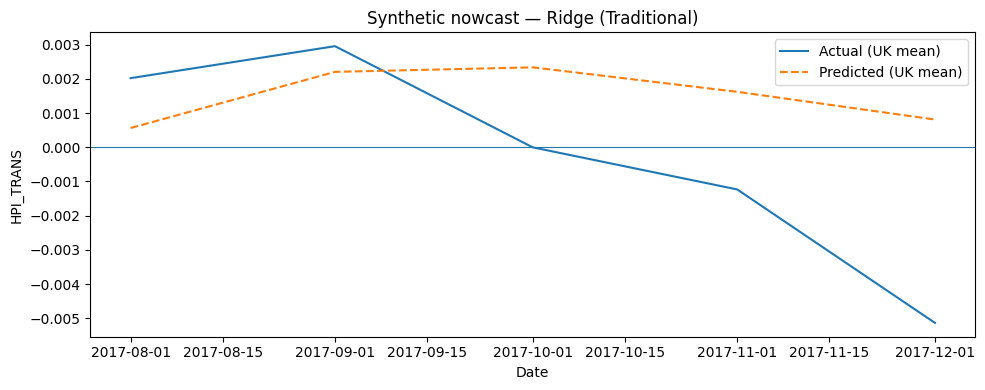



Ridge — High-Frequency
Predictors: 36 | alpha = 1.0
  evaluated up to 2017-10-01 (steps = 3)
Ridge results — RMSE = 0.00395, MAE = 0.00333


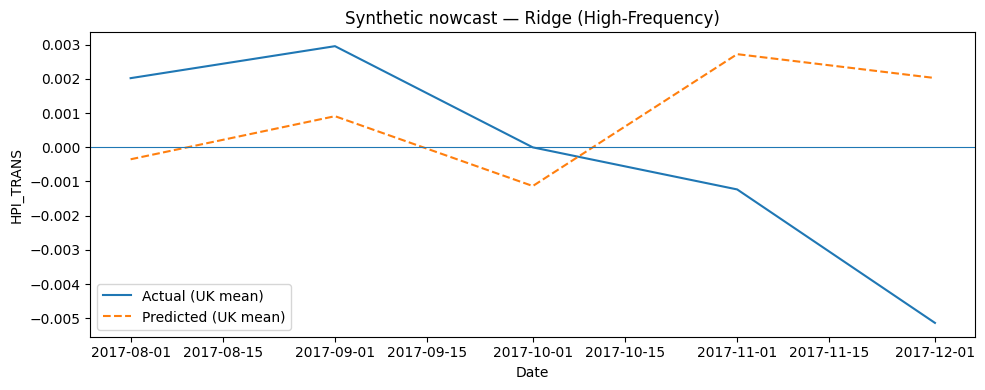



Ridge — Combined
Predictors: 84 | alpha = 1.0
  evaluated up to 2017-10-01 (steps = 3)
Ridge results — RMSE = 0.00411, MAE = 0.00320


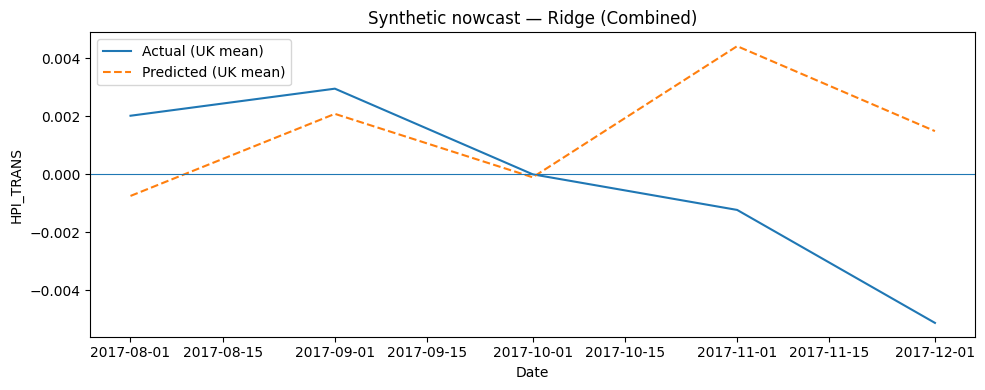


Ridge summary:
   Model            Spec       Window      RMSE       MAE  n_features
0  Ridge     Traditional  Rolling-24m  0.003215  0.002670          48
1  Ridge  High-Frequency  Rolling-24m  0.003950  0.003333          36
2  Ridge        Combined  Rolling-24m  0.004107  0.003205          84


In [ ]:
# Ridge regression on synthetic data

ridge_alpha = 1.0

ridge_results = []

for spec_name, base_vars in specs.items():
    FEATURES = make_lagged_features(df, base_vars, max_lag=6)
    if not FEATURES:
        raise ValueError(f"No lag features found for {spec_name}. Check column names.")

    print("\n")
    print(f"Ridge — {spec_name}")
    print(f"Predictors: {len(FEATURES)} | alpha = {ridge_alpha}")

    model = Pipeline([
        ("scaler", StandardScaler()),
        ("ridge", Ridge(alpha=ridge_alpha, random_state=42))
    ])

    uk_true, uk_pred, uk_dates = [], [], []
    step = 0

    for (train_start, train_end), test_date in rolling_window_splits(
        all_dates, start_test=START_TEST, window_months=WINDOW_MONTHS
    ):
        tr = (df["Date"] >= train_start) & (df["Date"] <= train_end)
        te = (df["Date"] == test_date)

        train_df = df.loc[tr]
        test_df  = df.loc[te]

        if train_df["Date"].nunique() < 12 or test_df.empty:
            continue

        X_tr, y_tr = train_df[FEATURES], train_df[TARGET]
        X_te, y_te = test_df[FEATURES], test_df[TARGET]

        model.fit(X_tr, y_tr)
        preds = model.predict(X_te)

        uk_pred.append(float(np.mean(preds)))
        uk_true.append(float(np.mean(y_te.values)))
        uk_dates.append(test_date)

        step += 1
        if step % 3 == 0:
            print(f"  evaluated up to {test_date.date()} (steps = {step})")

    rmse, mae = eval_metrics(uk_true, uk_pred)
    print(f"Ridge results — RMSE = {rmse:.5f}, MAE = {mae:.5f}")

    ridge_results.append({
        "Model": "Ridge",
        "Spec": spec_name,
        "Window": f"Rolling-{WINDOW_MONTHS}m",
        "RMSE": rmse,
        "MAE": mae,
        "n_features": len(FEATURES)
    })

    # Plot
    plot_df = pd.DataFrame({"Date": uk_dates, "Actual": uk_true, "Predicted": uk_pred}).set_index("Date")
    plt.figure(figsize=(10, 4))
    plt.plot(plot_df.index, plot_df["Actual"], label="Actual (UK mean)")
    plt.plot(plot_df.index, plot_df["Predicted"], linestyle="--", label="Predicted (UK mean)")
    plt.axhline(0, linewidth=0.8)
    plt.title(f"Synthetic nowcast — Ridge ({spec_name})")
    plt.xlabel("Date")
    plt.ylabel("HPI_TRANS")
    plt.legend()
    plt.tight_layout()
    plt.show()

ridge_summary = pd.DataFrame(ridge_results).sort_values("RMSE").reset_index(drop=True)
print("\nRidge summary:")
print(ridge_summary)

Lasso Regression



Lasso — Traditional
Predictors: 48 | alpha = 0.0005
  evaluated up to 2017-10-01 (steps = 3)
Lasso results — RMSE = 0.00345, MAE = 0.00281


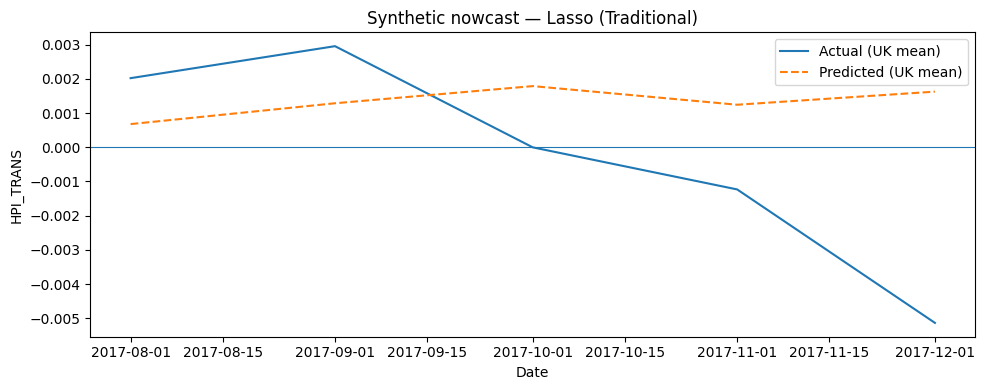



Lasso — High-Frequency
Predictors: 36 | alpha = 0.0005
  evaluated up to 2017-10-01 (steps = 3)
Lasso results — RMSE = 0.00309, MAE = 0.00223


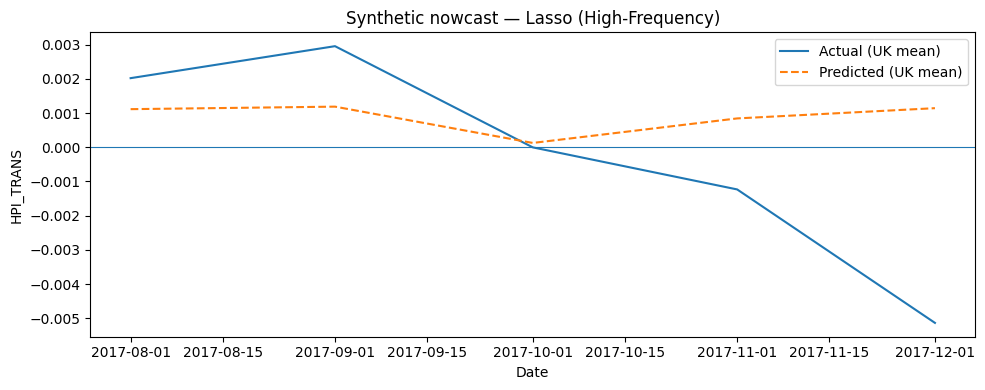



Lasso — Combined
Predictors: 84 | alpha = 0.0005
  evaluated up to 2017-10-01 (steps = 3)
Lasso results — RMSE = 0.00341, MAE = 0.00272


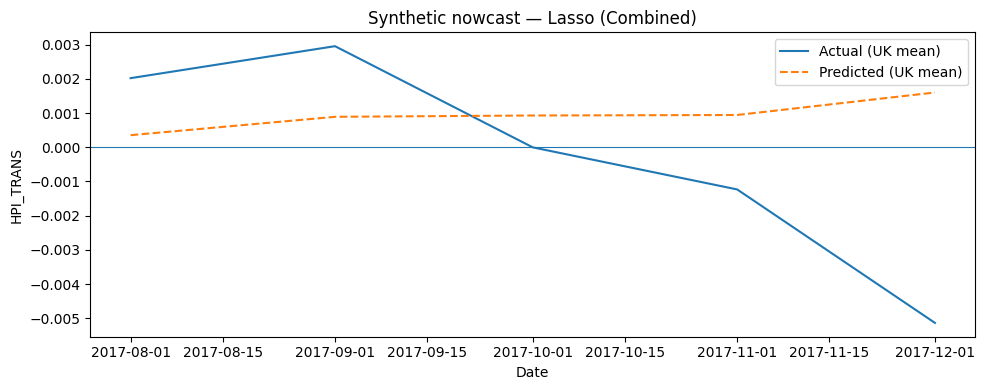


Lasso summary:
   Model            Spec       Window      RMSE       MAE  n_features
0  Lasso  High-Frequency  Rolling-24m  0.003088  0.002232          36
1  Lasso        Combined  Rolling-24m  0.003407  0.002716          84
2  Lasso     Traditional  Rolling-24m  0.003454  0.002808          48


In [ ]:
# Lasso regression on synthetic data

lasso_alpha = 0.0005

lasso_results = []

for spec_name, base_vars in specs.items():
    FEATURES = make_lagged_features(df, base_vars, max_lag=6)
    if not FEATURES:
        raise ValueError(f"No lag features found for {spec_name}. Check column names.")

    print("\n")
    print(f"Lasso — {spec_name}")
    print(f"Predictors: {len(FEATURES)} | alpha = {lasso_alpha}")

    model = Pipeline([
        ("scaler", StandardScaler()),
        ("lasso", Lasso(alpha=lasso_alpha, random_state=42, max_iter=10000))
    ])

    uk_true, uk_pred, uk_dates = [], [], []
    step = 0

    for (train_start, train_end), test_date in rolling_window_splits(
        all_dates, start_test=START_TEST, window_months=WINDOW_MONTHS
    ):
        tr = (df["Date"] >= train_start) & (df["Date"] <= train_end)
        te = (df["Date"] == test_date)

        train_df = df.loc[tr]
        test_df  = df.loc[te]

        if train_df["Date"].nunique() < 12 or test_df.empty:
            continue

        X_tr, y_tr = train_df[FEATURES], train_df[TARGET]
        X_te, y_te = test_df[FEATURES], test_df[TARGET]

        model.fit(X_tr, y_tr)
        preds = model.predict(X_te)

        uk_pred.append(float(np.mean(preds)))
        uk_true.append(float(np.mean(y_te.values)))
        uk_dates.append(test_date)

        step += 1
        if step % 3 == 0:
            print(f"  evaluated up to {test_date.date()} (steps = {step})")

    rmse, mae = eval_metrics(uk_true, uk_pred)
    print(f"Lasso results — RMSE = {rmse:.5f}, MAE = {mae:.5f}")

    lasso_results.append({
        "Model": "Lasso",
        "Spec": spec_name,
        "Window": f"Rolling-{WINDOW_MONTHS}m",
        "RMSE": rmse,
        "MAE": mae,
        "n_features": len(FEATURES)
    })

    # Plot
    plot_df = pd.DataFrame({"Date": uk_dates, "Actual": uk_true, "Predicted": uk_pred}).set_index("Date")
    plt.figure(figsize=(10, 4))
    plt.plot(plot_df.index, plot_df["Actual"], label="Actual (UK mean)")
    plt.plot(plot_df.index, plot_df["Predicted"], linestyle="--", label="Predicted (UK mean)")
    plt.axhline(0, linewidth=0.8)
    plt.title(f"Synthetic nowcast — Lasso ({spec_name})")
    plt.xlabel("Date")
    plt.ylabel("HPI_TRANS")
    plt.legend()
    plt.tight_layout()
    plt.show()

lasso_summary = pd.DataFrame(lasso_results).sort_values("RMSE").reset_index(drop=True)
print("\nLasso summary:")
print(lasso_summary)

XGBoost


Synthetic XGBoost rolling evaluation
Data: 2016-08-01 → 2017-12-01
Window: 24 months | Test starts: 2016-06-01


XGBoost — Traditional
Predictors: 48
  evaluated up to 2017-10-01 (steps = 3)
XGBoost results — RMSE = 0.00365, MAE = 0.00263


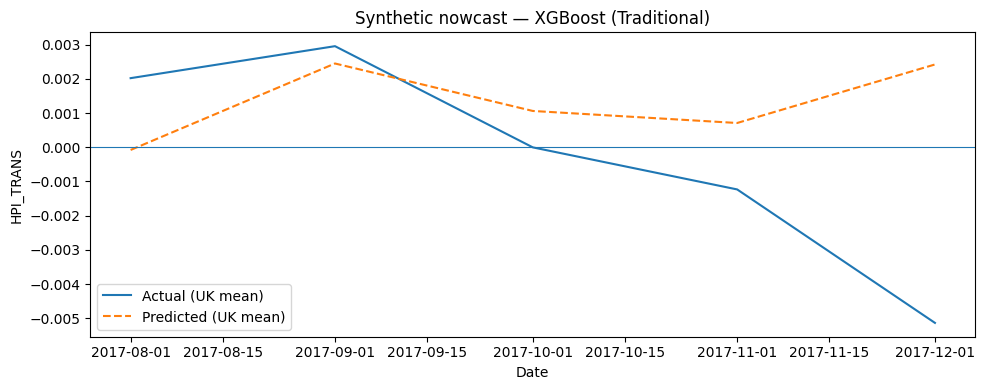



XGBoost — High-Frequency
Predictors: 36
  evaluated up to 2017-10-01 (steps = 3)
XGBoost results — RMSE = 0.00238, MAE = 0.00199


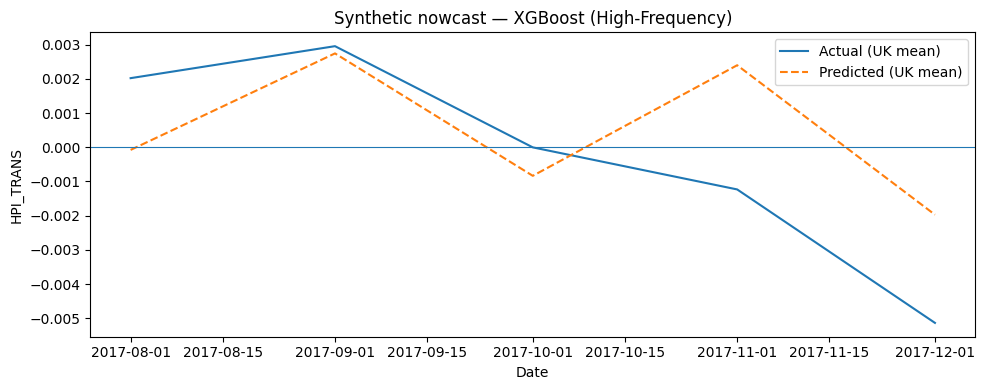



XGBoost — Combined
Predictors: 84
  evaluated up to 2017-10-01 (steps = 3)
XGBoost results — RMSE = 0.00380, MAE = 0.00284


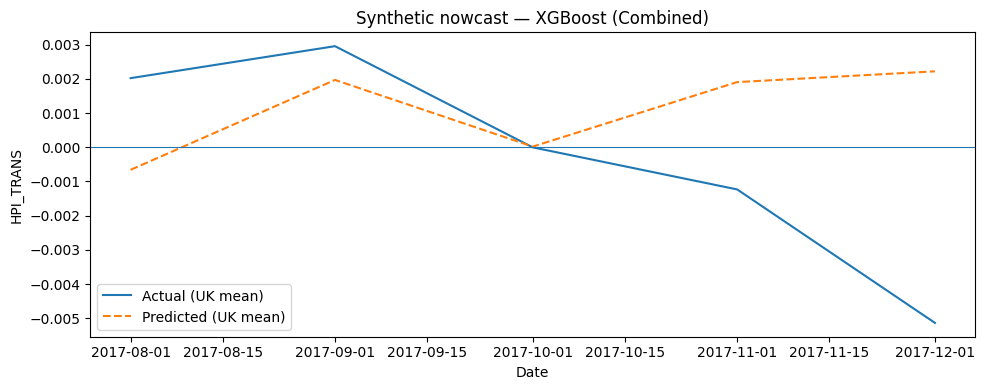


XGBoost summary:
     Model            Spec       Window      RMSE       MAE  n_features
0  XGBoost  High-Frequency  Rolling-24m  0.002381  0.001987          36
1  XGBoost     Traditional  Rolling-24m  0.003651  0.002634          48
2  XGBoost        Combined  Rolling-24m  0.003798  0.002837          84


In [ ]:
# XGBoost on synthetic data

from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

data = df.copy()
data["Date"] = pd.to_datetime(data["Date"])
data = data.sort_values(["Date", "RegionName"]).reset_index(drop=True)

TARGET = "HPI_TRANS"

def eval_metrics(y_true, y_pred):
    y_true = np.asarray(y_true)
    y_pred = np.asarray(y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae  = mean_absolute_error(y_true, y_pred)
    return rmse, mae

# Rolling window setup
WINDOW_MONTHS = 24
START_TEST    = pd.Timestamp("2016-06-01")
all_dates     = sorted(data["Date"].unique())

print("\nSynthetic XGBoost rolling evaluation")
print(f"Data: {data['Date'].min().date()} → {data['Date'].max().date()}")
print(f"Window: {WINDOW_MONTHS} months | Test starts: {START_TEST.date()}")

xgb_results = []

for spec_name, base_vars in specs.items():
    FEATURES = make_lagged_features(data, base_vars, max_lag=6)
    if not FEATURES:
        raise ValueError(f"No lag features found for {spec_name}. Check column names.")

    print("\n")
    print(f"XGBoost — {spec_name}")
    print(f"Predictors: {len(FEATURES)}")

    xgb_model = XGBRegressor(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=4,
        subsample=0.8,
        colsample_bytree=0.8,
        objective="reg:squarederror",
        random_state=42,
        n_jobs=-1,
    )

    uk_true, uk_pred, uk_dates = [], [], []
    step = 0

    for (train_start, train_end), test_date in rolling_window_splits(
        all_dates, start_test=START_TEST, window_months=WINDOW_MONTHS
    ):
        tr = (data["Date"] >= train_start) & (data["Date"] <= train_end)
        te = (data["Date"] == test_date)

        train_df = data.loc[tr]
        test_df  = data.loc[te]

        if train_df["Date"].nunique() < 12 or test_df.empty:
            continue

        X_tr, y_tr = train_df[FEATURES], train_df[TARGET]
        X_te, y_te = test_df[FEATURES], test_df[TARGET]

        xgb_model.fit(X_tr, y_tr)
        preds = xgb_model.predict(X_te)

        # UK mean prediction across regions for that month
        uk_pred.append(float(np.mean(preds)))
        uk_true.append(float(np.mean(y_te.values)))
        uk_dates.append(test_date)

        step += 1
        if step % 3 == 0:
            print(f"  evaluated up to {test_date.date()} (steps = {step})")

    rmse, mae = eval_metrics(uk_true, uk_pred)
    print(f"XGBoost results — RMSE = {rmse:.5f}, MAE = {mae:.5f}")

    xgb_results.append({
        "Model": "XGBoost",
        "Spec": spec_name,
        "Window": f"Rolling-{WINDOW_MONTHS}m",
        "RMSE": rmse,
        "MAE": mae,
        "n_features": len(FEATURES),
    })

    # Plot
    plot_df = (
        pd.DataFrame({"Date": uk_dates, "Actual": uk_true, "Predicted": uk_pred})
        .sort_values("Date")
        .set_index("Date")
    )

    plt.figure(figsize=(10, 4))
    plt.plot(plot_df.index, plot_df["Actual"], label="Actual (UK mean)")
    plt.plot(plot_df.index, plot_df["Predicted"], linestyle="--", label="Predicted (UK mean)")
    plt.axhline(0, linewidth=0.8)
    plt.title(f"Synthetic nowcast — XGBoost ({spec_name})")
    plt.xlabel("Date")
    plt.ylabel("HPI_TRANS")
    plt.legend()
    plt.tight_layout()
    plt.show()

xgb_summary = pd.DataFrame(xgb_results).sort_values("RMSE").reset_index(drop=True)
print("\nXGBoost summary:")
print(xgb_summary)

Random Forest


Synthetic Random Forest rolling evaluation
Data: 2016-08-01 → 2017-12-01
Window: 24 months | Test starts: 2016-06-01


Random Forest — Traditional
Predictors: 48
  evaluated up to 2017-10-01 (steps = 3)
Random Forest results — RMSE = 0.00331, MAE = 0.00271


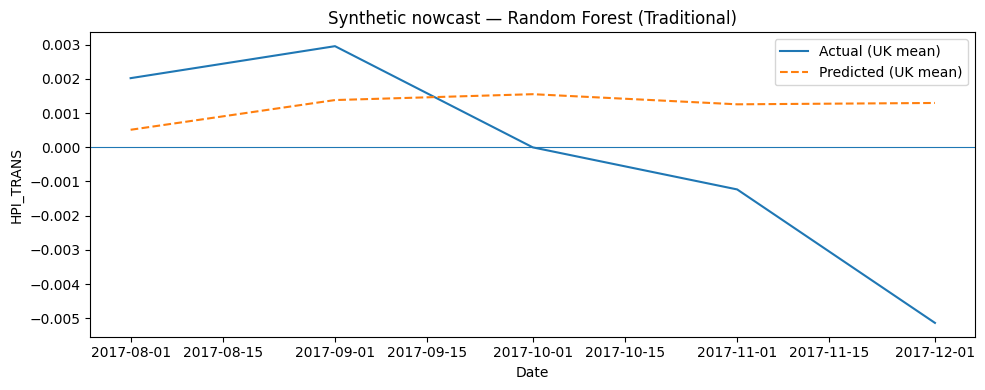



Random Forest — High-Frequency
Predictors: 36
  evaluated up to 2017-10-01 (steps = 3)
Random Forest results — RMSE = 0.00292, MAE = 0.00232


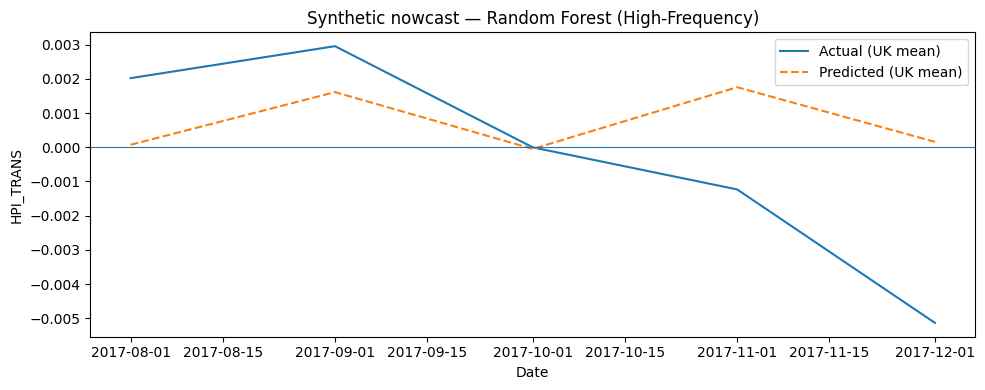



Random Forest — Combined
Predictors: 84
  evaluated up to 2017-10-01 (steps = 3)
Random Forest results — RMSE = 0.00309, MAE = 0.00245


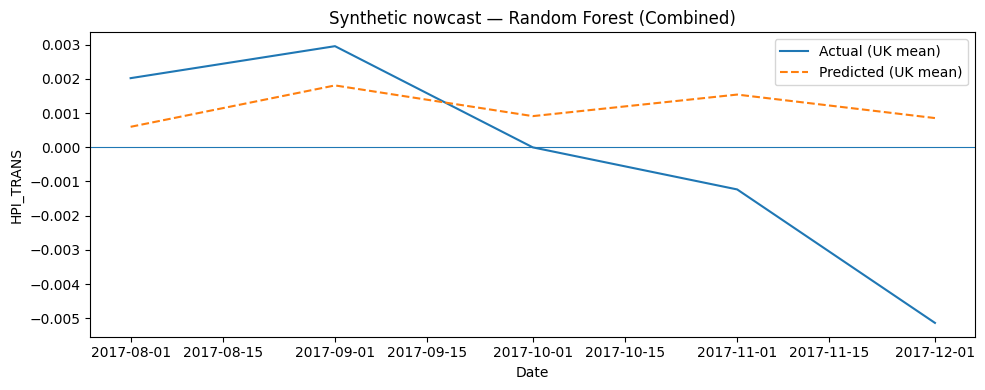


Random Forest summary:
          Model            Spec       Window      RMSE       MAE  n_features
0  RandomForest  High-Frequency  Rolling-24m  0.002917  0.002324          36
1  RandomForest        Combined  Rolling-24m  0.003090  0.002449          84
2  RandomForest     Traditional  Rolling-24m  0.003308  0.002712          48


In [ ]:
# Random Forest on synthetic data

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

data = df.copy()
data["Date"] = pd.to_datetime(data["Date"])
data = data.sort_values(["Date", "RegionName"]).reset_index(drop=True)

TARGET = "HPI_TRANS"

def eval_metrics(y_true, y_pred):
    y_true = np.asarray(y_true)
    y_pred = np.asarray(y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae  = mean_absolute_error(y_true, y_pred)
    return rmse, mae

# Rolling window setup
WINDOW_MONTHS = 24
START_TEST    = pd.Timestamp("2016-06-01")
all_dates     = sorted(data["Date"].unique())

print("\nSynthetic Random Forest rolling evaluation")
print(f"Data: {data['Date'].min().date()} → {data['Date'].max().date()}")
print(f"Window: {WINDOW_MONTHS} months | Test starts: {START_TEST.date()}")

rf_results = []

for spec_name, base_vars in specs.items():
    FEATURES = make_lagged_features(data, base_vars, max_lag=6)
    if not FEATURES:
        raise ValueError(f"No lag features found for {spec_name}. Check column names.")

    print("\n")
    print(f"Random Forest — {spec_name}")
    print(f"Predictors: {len(FEATURES)}")

    rf_model = RandomForestRegressor(
        n_estimators=400,
        max_depth=None,
        min_samples_leaf=3,
        max_features="sqrt",
        random_state=42,
        n_jobs=-1,
    )

    uk_true, uk_pred, uk_dates = [], [], []
    step = 0

    for (train_start, train_end), test_date in rolling_window_splits(
        all_dates, start_test=START_TEST, window_months=WINDOW_MONTHS
    ):
        tr = (data["Date"] >= train_start) & (data["Date"] <= train_end)
        te = (data["Date"] == test_date)

        train_df = data.loc[tr]
        test_df  = data.loc[te]

        if train_df["Date"].nunique() < 12 or test_df.empty:
            continue

        X_tr, y_tr = train_df[FEATURES], train_df[TARGET]
        X_te, y_te = test_df[FEATURES], test_df[TARGET]

        rf_model.fit(X_tr, y_tr)
        preds = rf_model.predict(X_te)

        # "UK" = average across regions for that month
        uk_pred.append(float(np.mean(preds)))
        uk_true.append(float(np.mean(y_te.values)))
        uk_dates.append(test_date)

        step += 1
        if step % 3 == 0:
            print(f"  evaluated up to {test_date.date()} (steps = {step})")

    rmse, mae = eval_metrics(uk_true, uk_pred)
    print(f"Random Forest results — RMSE = {rmse:.5f}, MAE = {mae:.5f}")

    rf_results.append({
        "Model": "RandomForest",
        "Spec": spec_name,
        "Window": f"Rolling-{WINDOW_MONTHS}m",
        "RMSE": rmse,
        "MAE": mae,
        "n_features": len(FEATURES),
    })

    # Plot
    plot_df = (
        pd.DataFrame({"Date": uk_dates, "Actual": uk_true, "Predicted": uk_pred})
        .sort_values("Date")
        .set_index("Date")
    )

    plt.figure(figsize=(10, 4))
    plt.plot(plot_df.index, plot_df["Actual"], label="Actual (UK mean)")
    plt.plot(plot_df.index, plot_df["Predicted"], linestyle="--", label="Predicted (UK mean)")
    plt.axhline(0, linewidth=0.8)
    plt.title(f"Synthetic nowcast — Random Forest ({spec_name})")
    plt.xlabel("Date")
    plt.ylabel("HPI_TRANS")
    plt.legend()
    plt.tight_layout()
    plt.show()

rf_summary = pd.DataFrame(rf_results).sort_values("RMSE").reset_index(drop=True)
print("\nRandom Forest summary:")
print(rf_summary)